# <font color='purple'>Preprocessing QC statistics </font> 
## Noam, July 2023


In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
MOMAPS_HOME = '/home/labs/hornsteinlab/Collaboration/MOmaps_Noam/MOmaps'
MOMAPS_DATA_HOME = '/home/labs/hornsteinlab/Collaboration/MOmaps'
LOGS_PATH = os.path.join(MOMAPS_DATA_HOME, 'src', 'preprocessing', 'logs','np')
PLOT_PATH = os.path.join(MOMAPS_HOME, 'src', 'preprocessing', 'notebooks','figures','NP')
os.chdir(MOMAPS_HOME)
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid", font_scale=1.5)
sns.color_palette("husl", 8)
plt.rcParams["image.cmap"] = "Set1"
from tqdm.notebook import tqdm
from src.common.lib.preprocessing_utils import rescale_intensity
from src.common.lib.images_qc import *
#sys.path.insert(1, "/home/labs/hornsteinlab/Collaboration/MOmaps_Sagy/MOmaps/src/common/lib")
import contextlib
import io
import matplotlib
import warnings
warnings.filterwarnings('ignore', category=pd.core.common.SettingWithCopyWarning)
from src.common.lib.qc_config_tmp import *


In [3]:
df = log_files_qc(LOGS_PATH)


Total of 4 files were read.
Before dup handeling  (31900, 20)
After duplication removal #1: (31900, 21)
After duplication removal #2: (31900, 21)


## validate folder structure and files existence

In [3]:
# choose batches
batches = [f'batch{i}' for i in range (1,5)]
#batches=['batch5']

### Raw Files

batch1
Folder structure is valid.
All files exists.
Total Sites:  27200


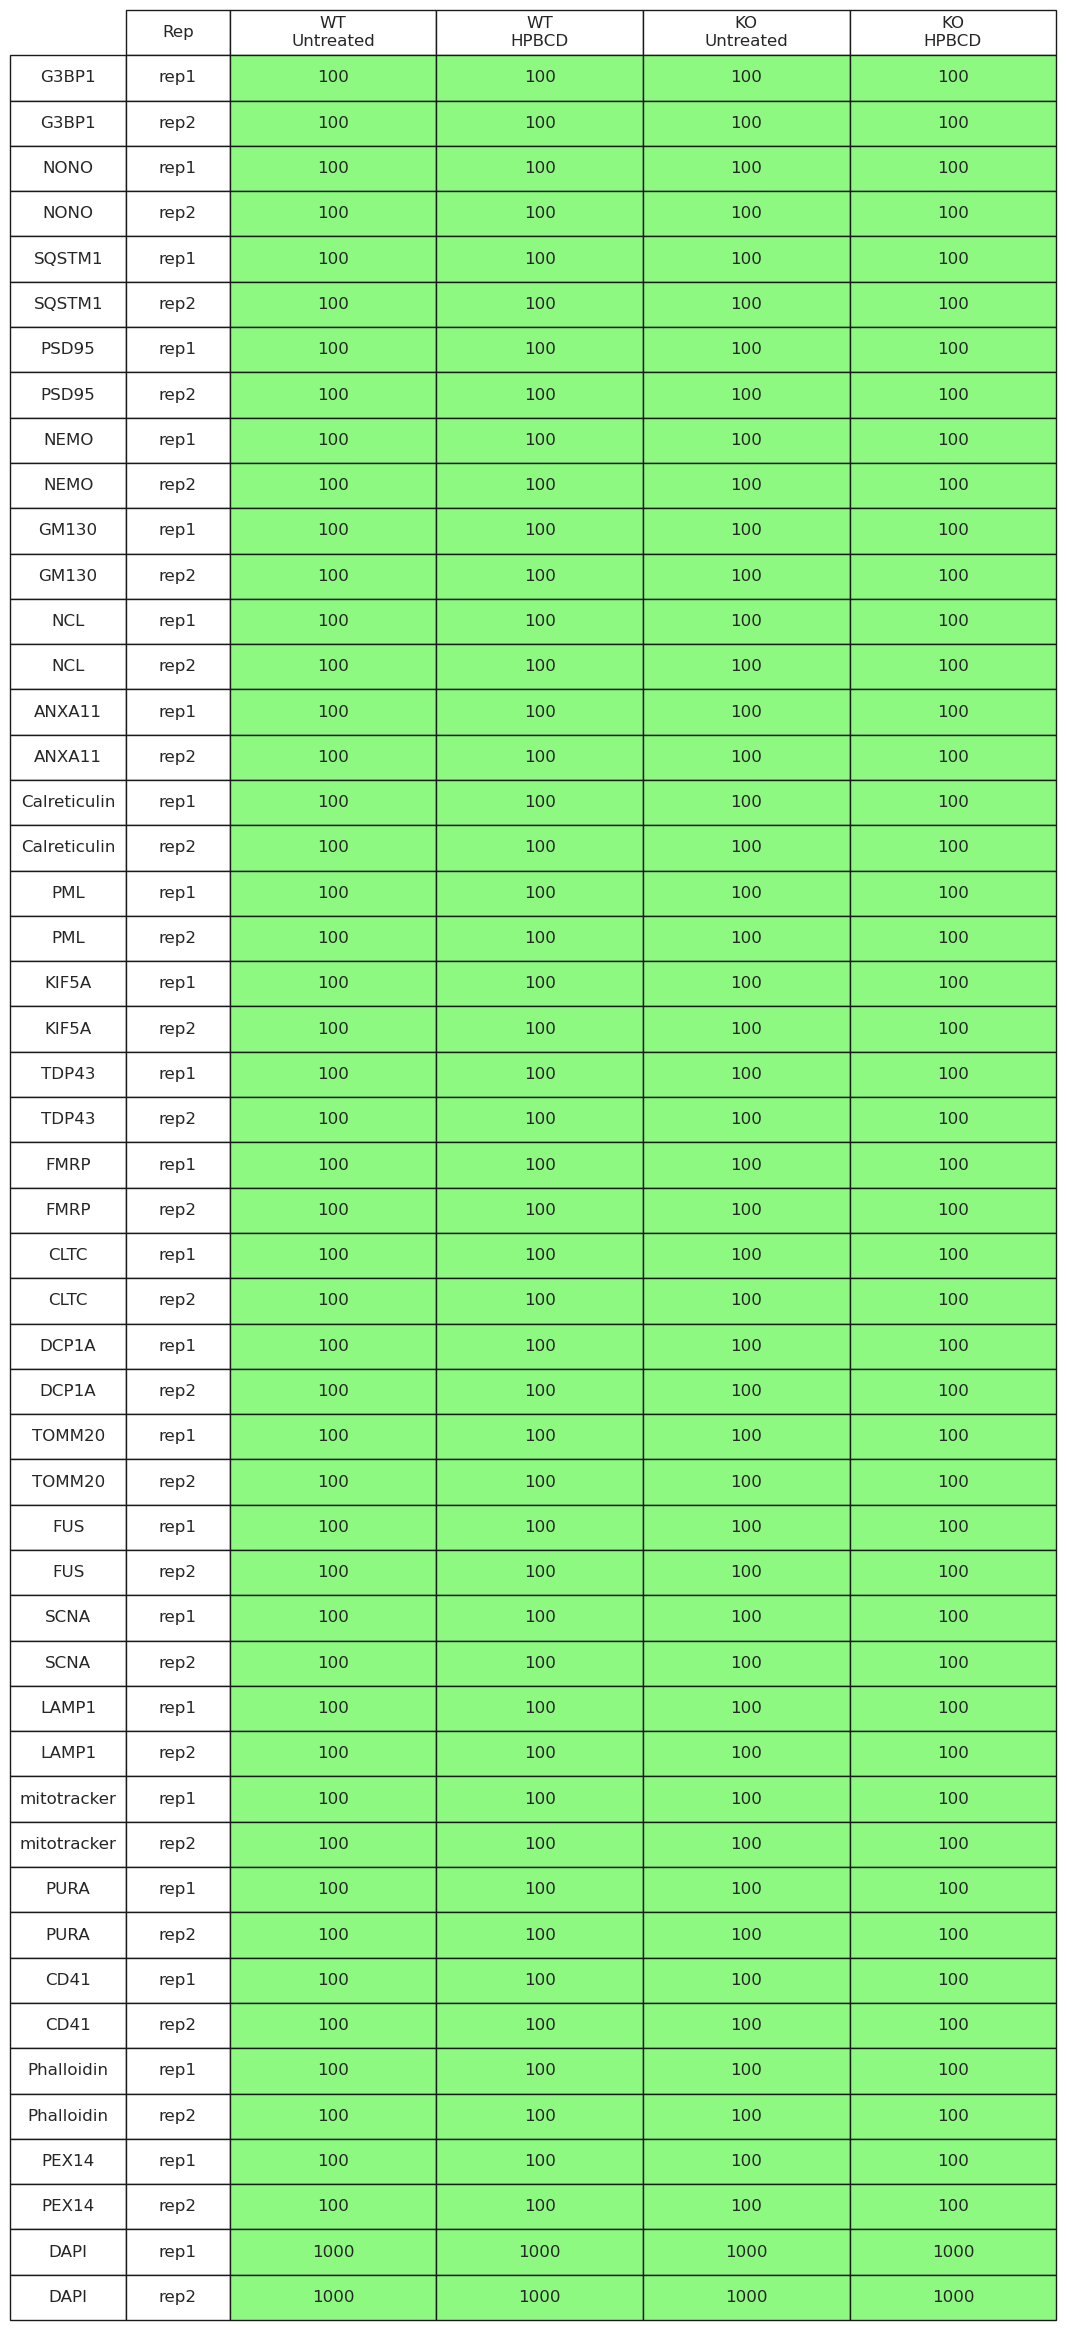

batch2
Folder structure is valid.
All files exists.
Total Sites:  26900


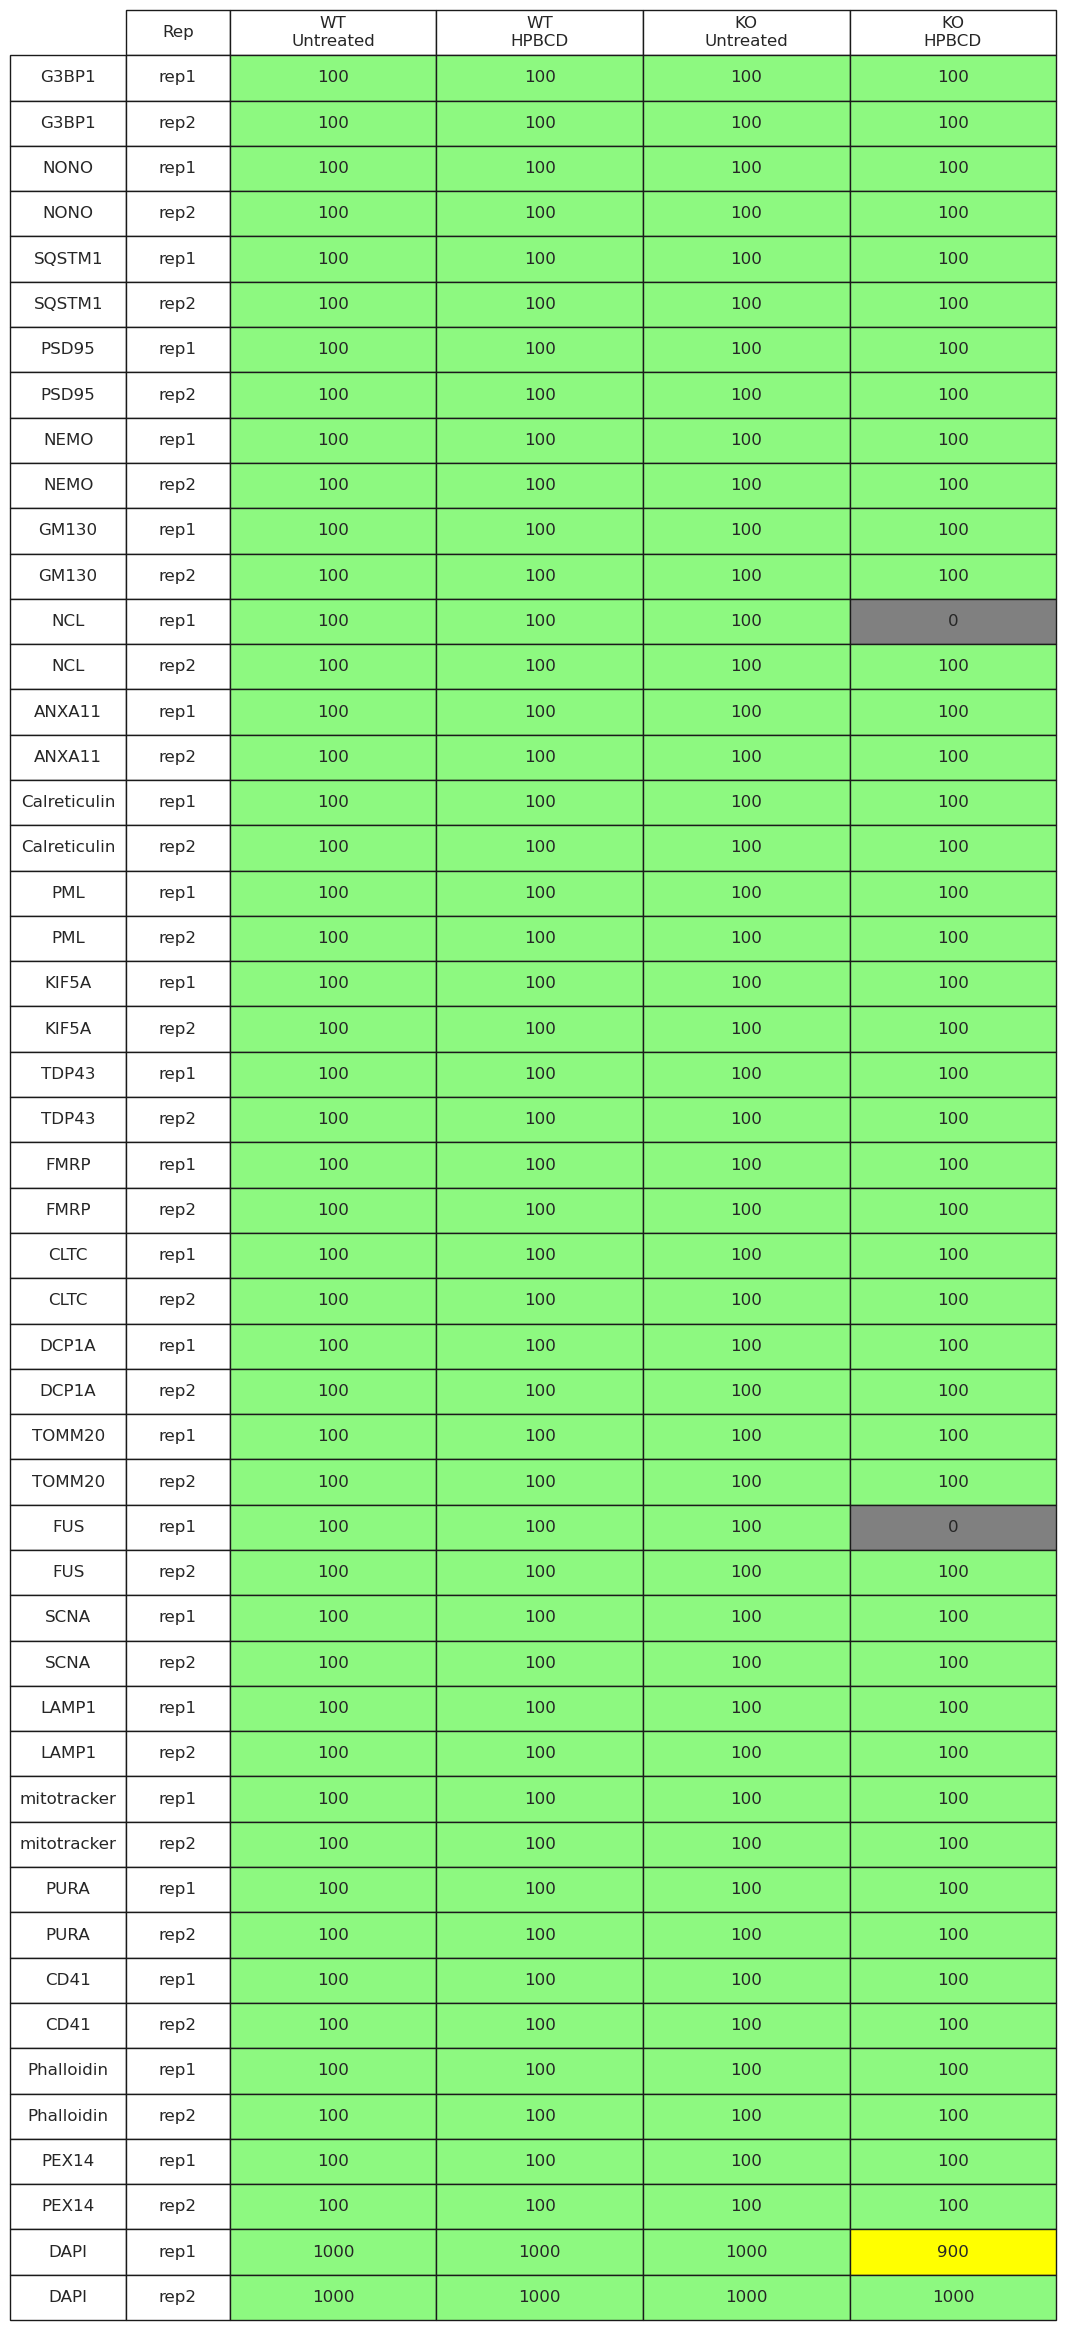

batch3
Folder structure is valid.
All files exists.
Total Sites:  27200


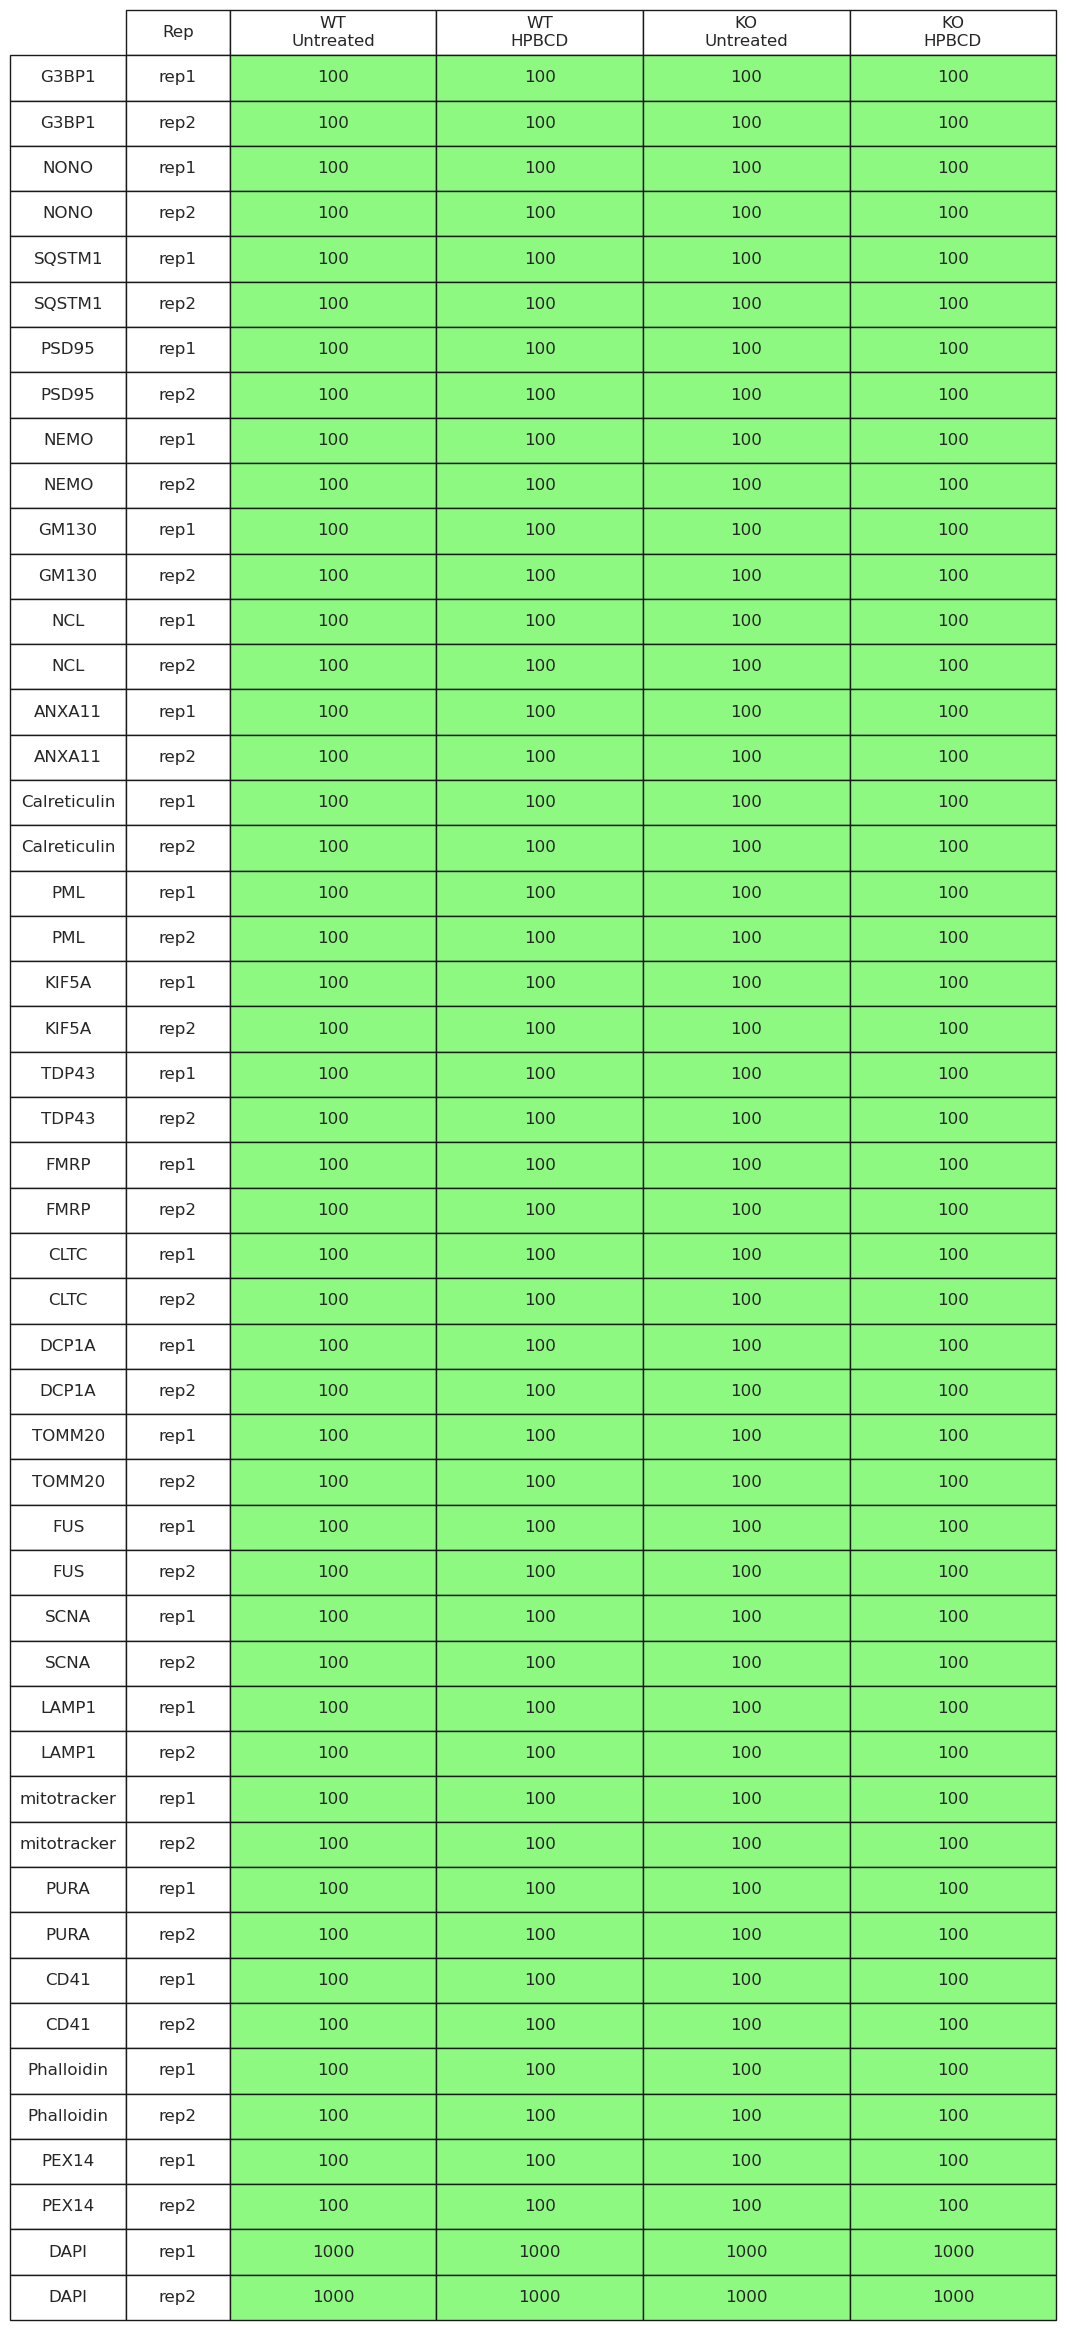

batch4
Folder structure is valid.
All files exists.
Total Sites:  27200


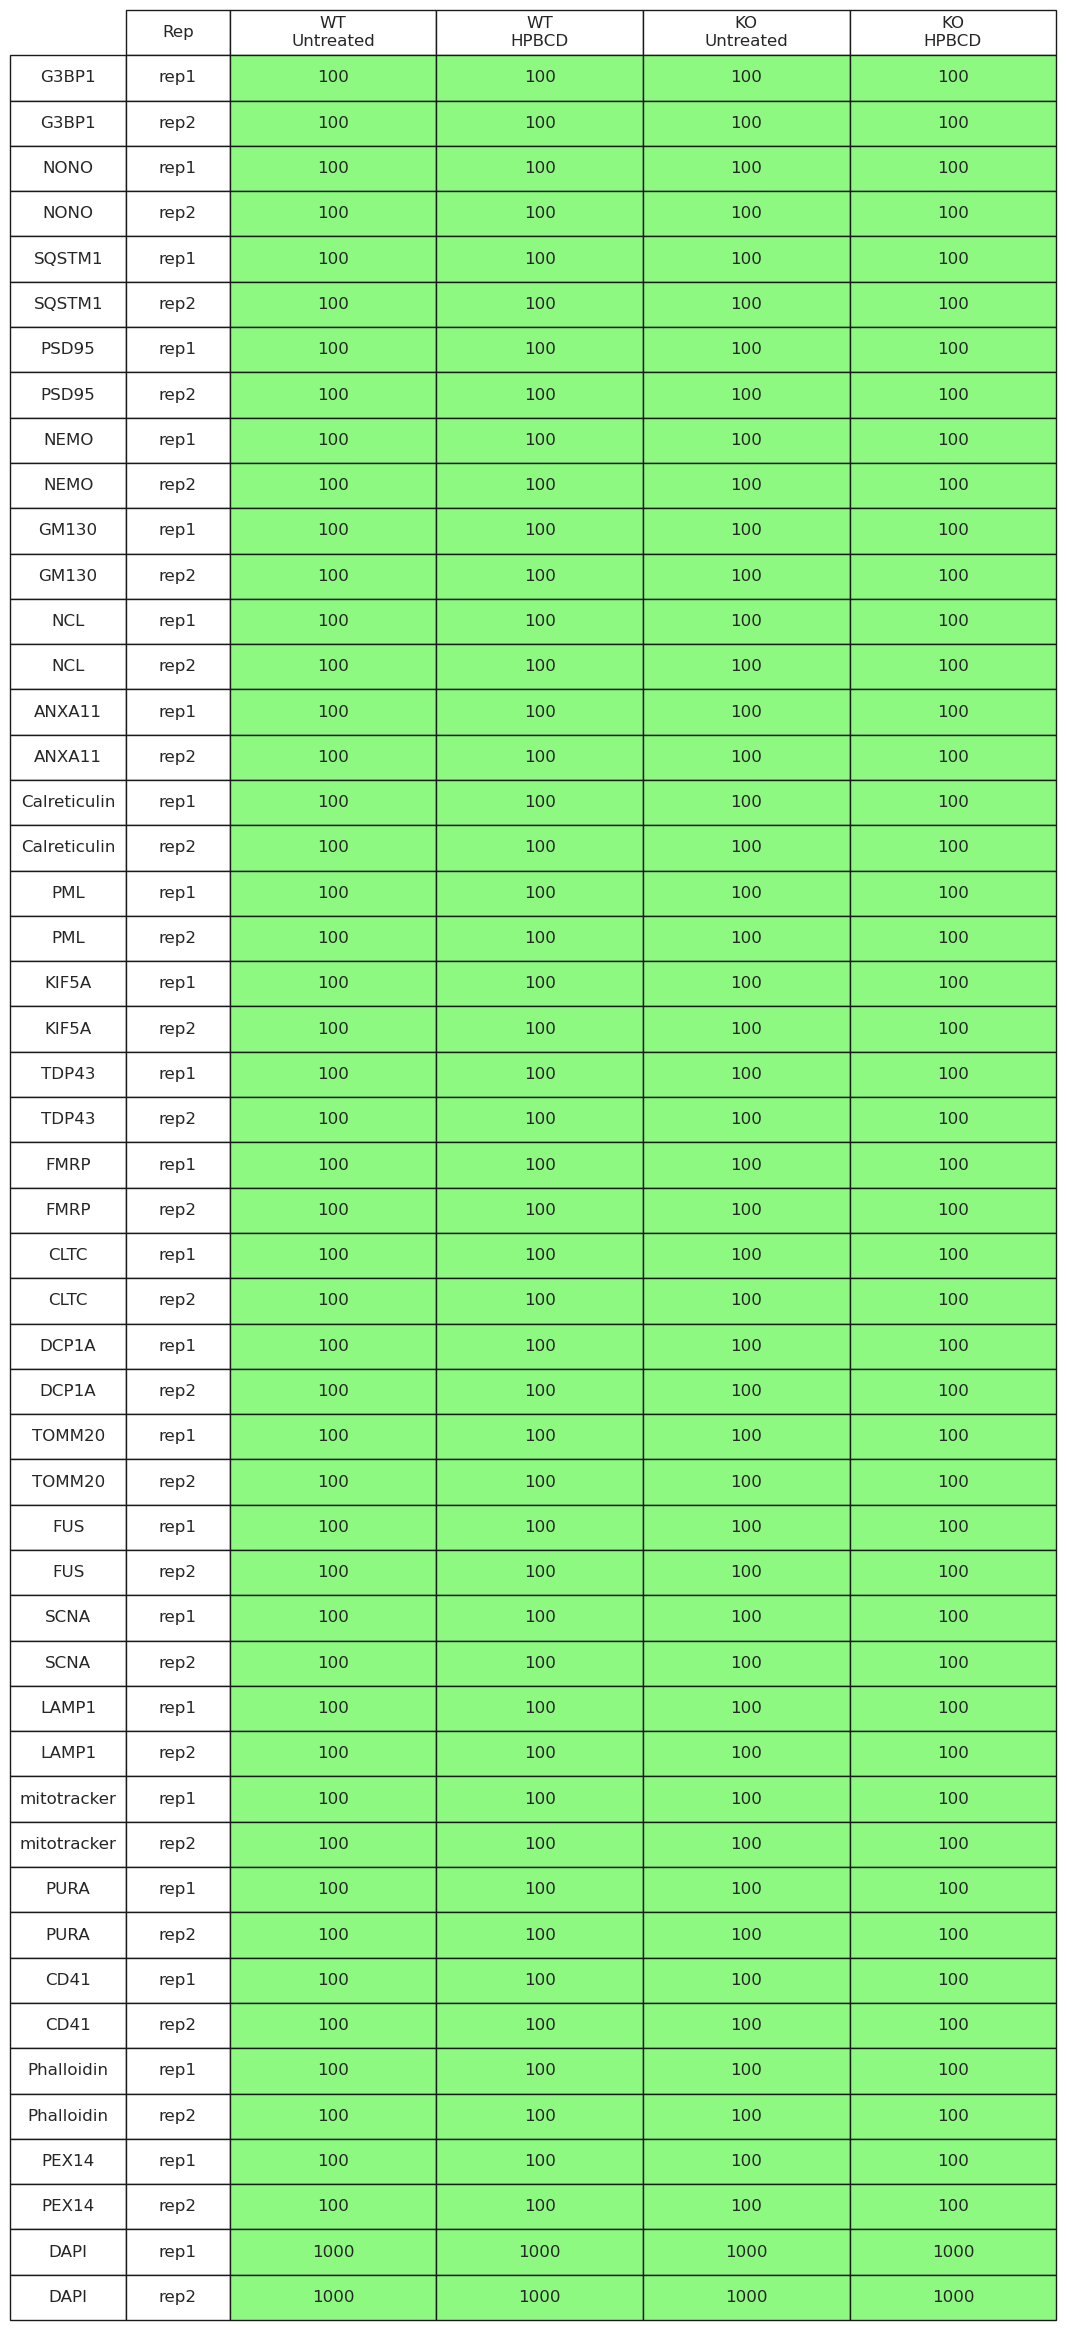

In [5]:

root_directory_raw = os.path.join(MOMAPS_DATA_HOME, 'input', 'images', 'raw', 'SpinningDisk','NiemannPick_sort')

raws = run_validate_folder_structure(root_directory_raw, False, np_panels, np_markers,PLOT_PATH,
                                     np_marker_info, np_cell_lines_to_cond, reps, 
                                     np_cell_lines_for_disp,
                                     np_expected_dapi_raw, batches=batches,
                                     fig_width=4, fig_height=10)

### Processed

batch1
Folder structure is valid.
Some files are bad:
/home/labs/hornsteinlab/Collaboration/MOmaps/input/images/processed/spd2/SpinningDisk/NiemannPick/batch1/WT/Untreated/LAMP1, saved_pngs small size (4.096 kB)
/home/labs/hornsteinlab/Collaboration/MOmaps/input/images/processed/spd2/SpinningDisk/NiemannPick/batch1/WT/Untreated/LAMP1, saved_pngs
/home/labs/hornsteinlab/Collaboration/MOmaps/input/images/processed/spd2/SpinningDisk/NiemannPick/batch1/KO/Untreated/LAMP1, saved_pngs small size (4.096 kB)
/home/labs/hornsteinlab/Collaboration/MOmaps/input/images/processed/spd2/SpinningDisk/NiemannPick/batch1/KO/Untreated/LAMP1, saved_pngs
Total Sites:  27073


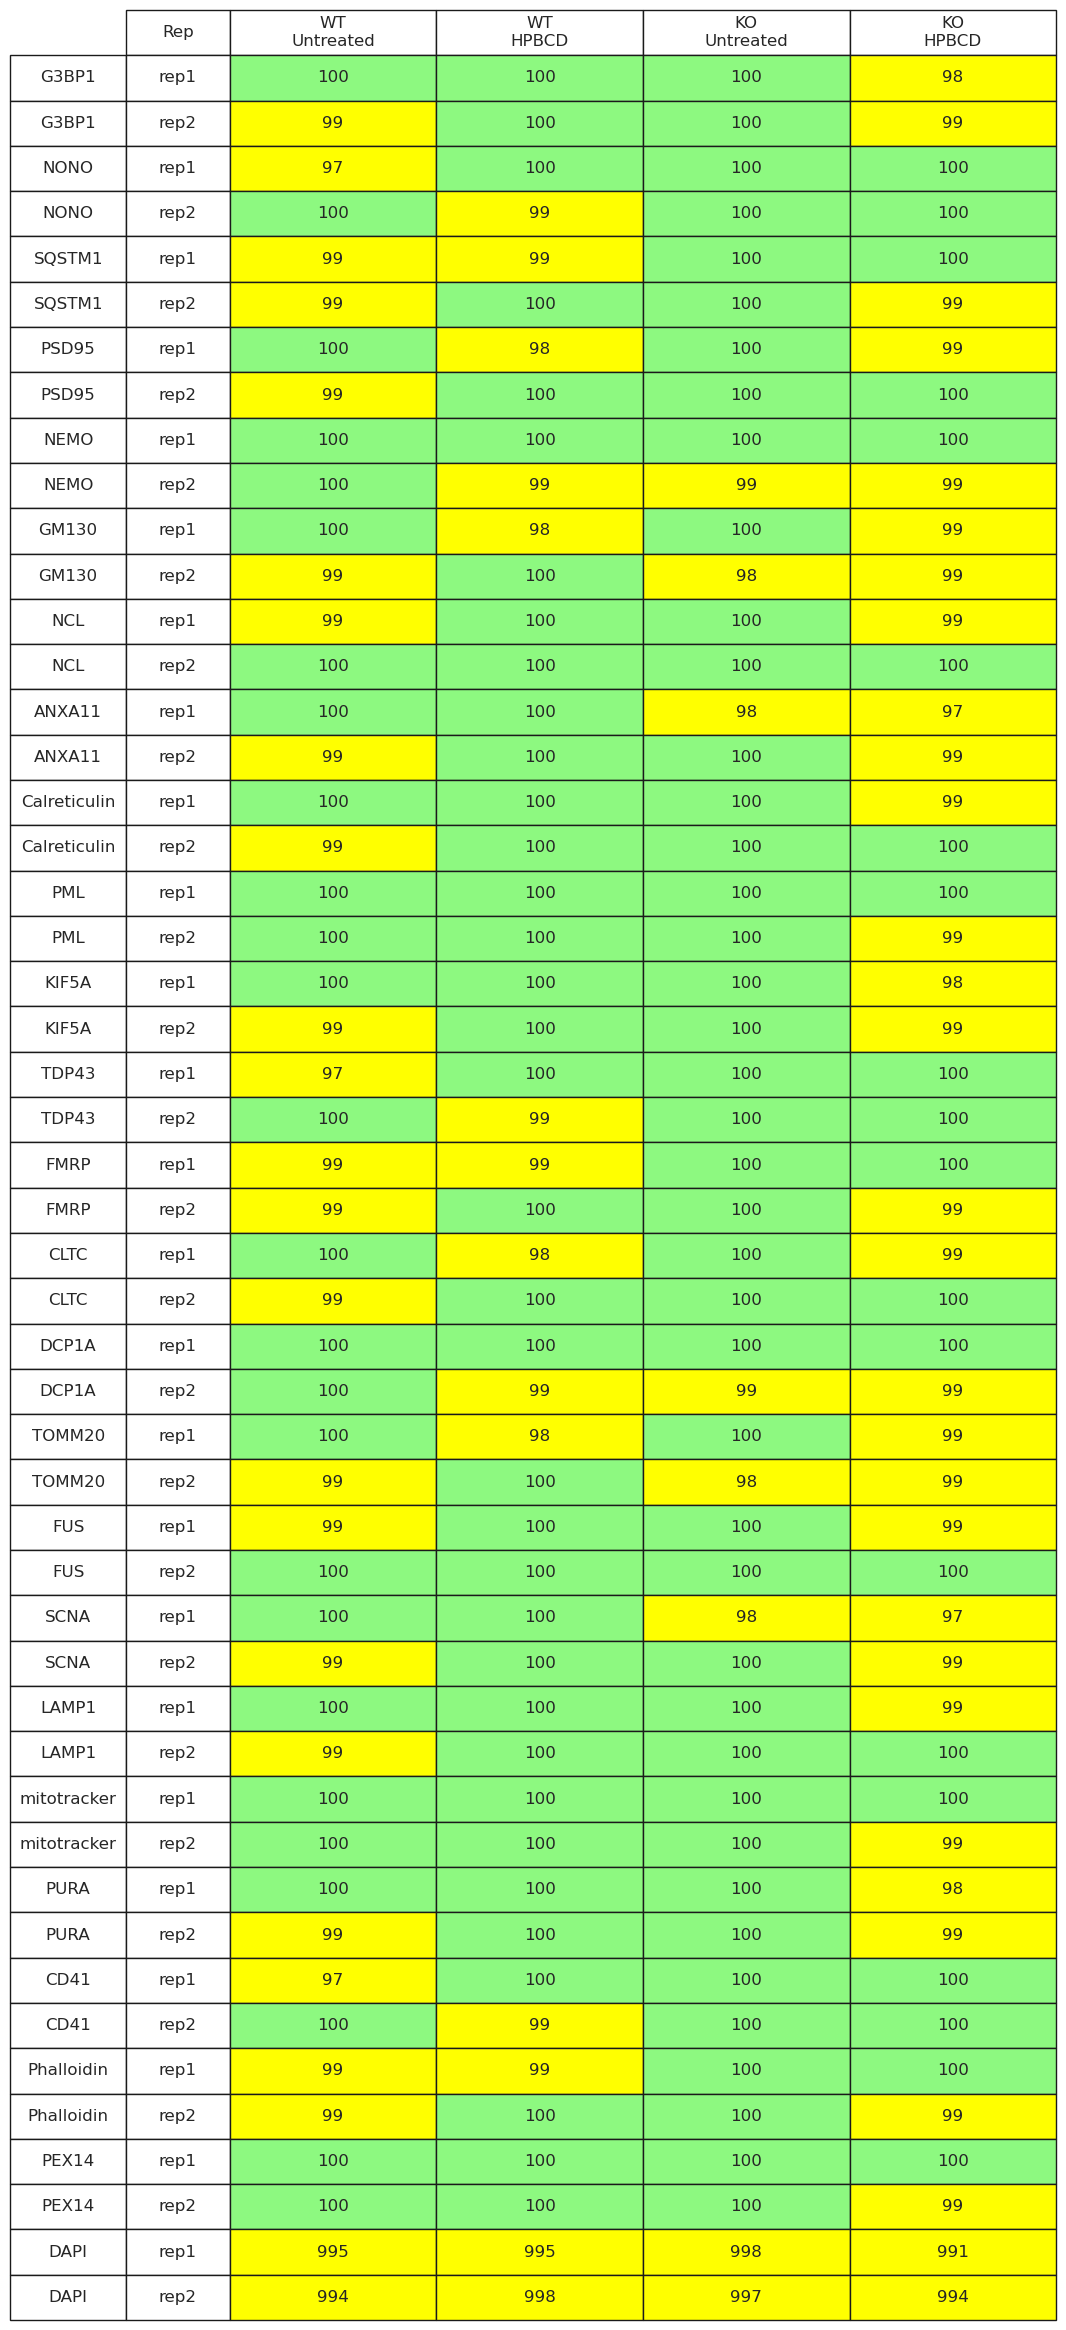

batch2
Folder structure is valid.
All files exists.
Total Sites:  25436


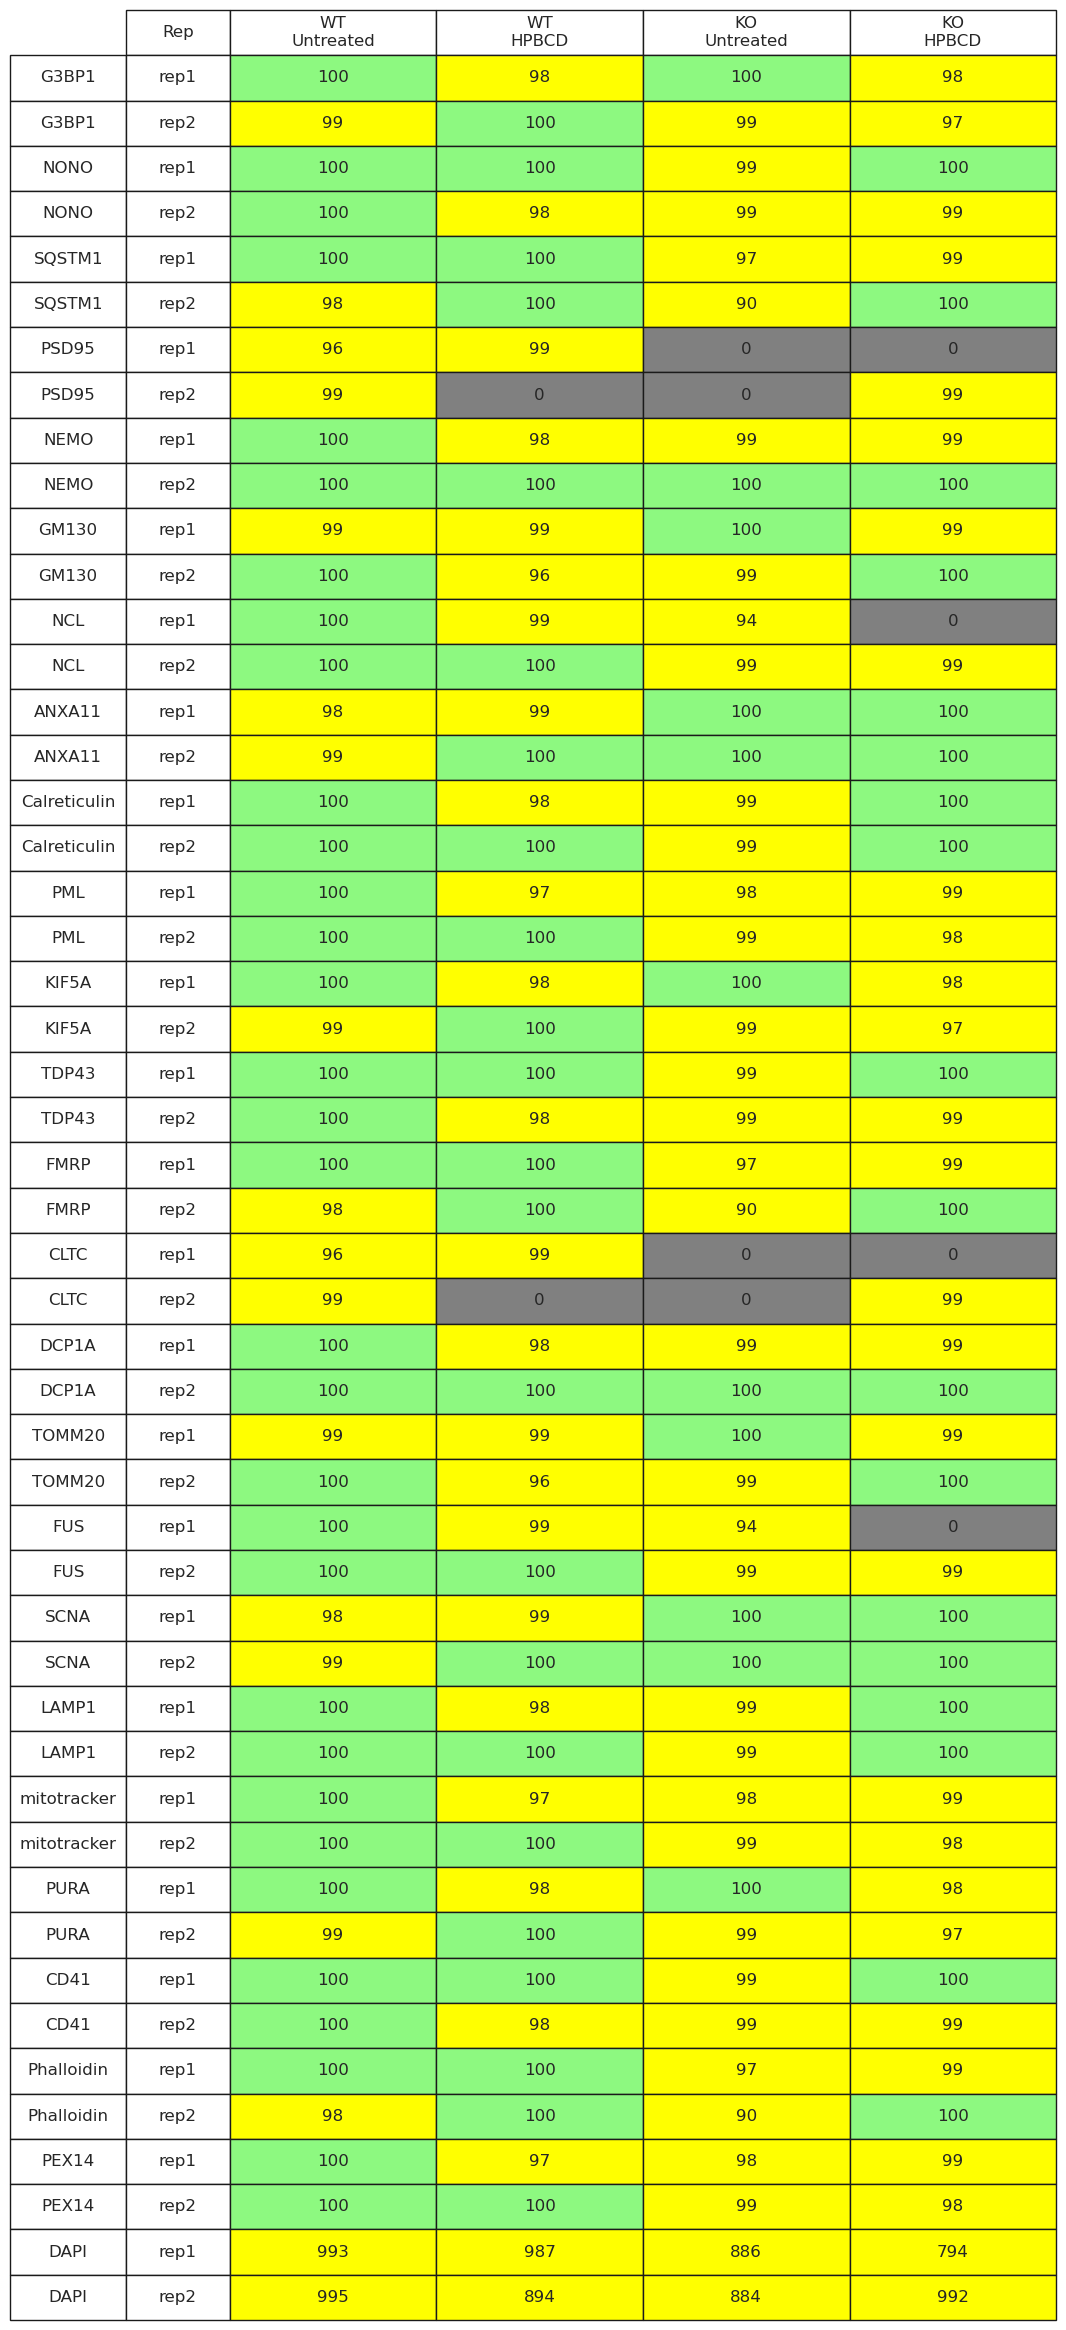

batch3
Folder structure is valid.
All files exists.
Total Sites:  27076


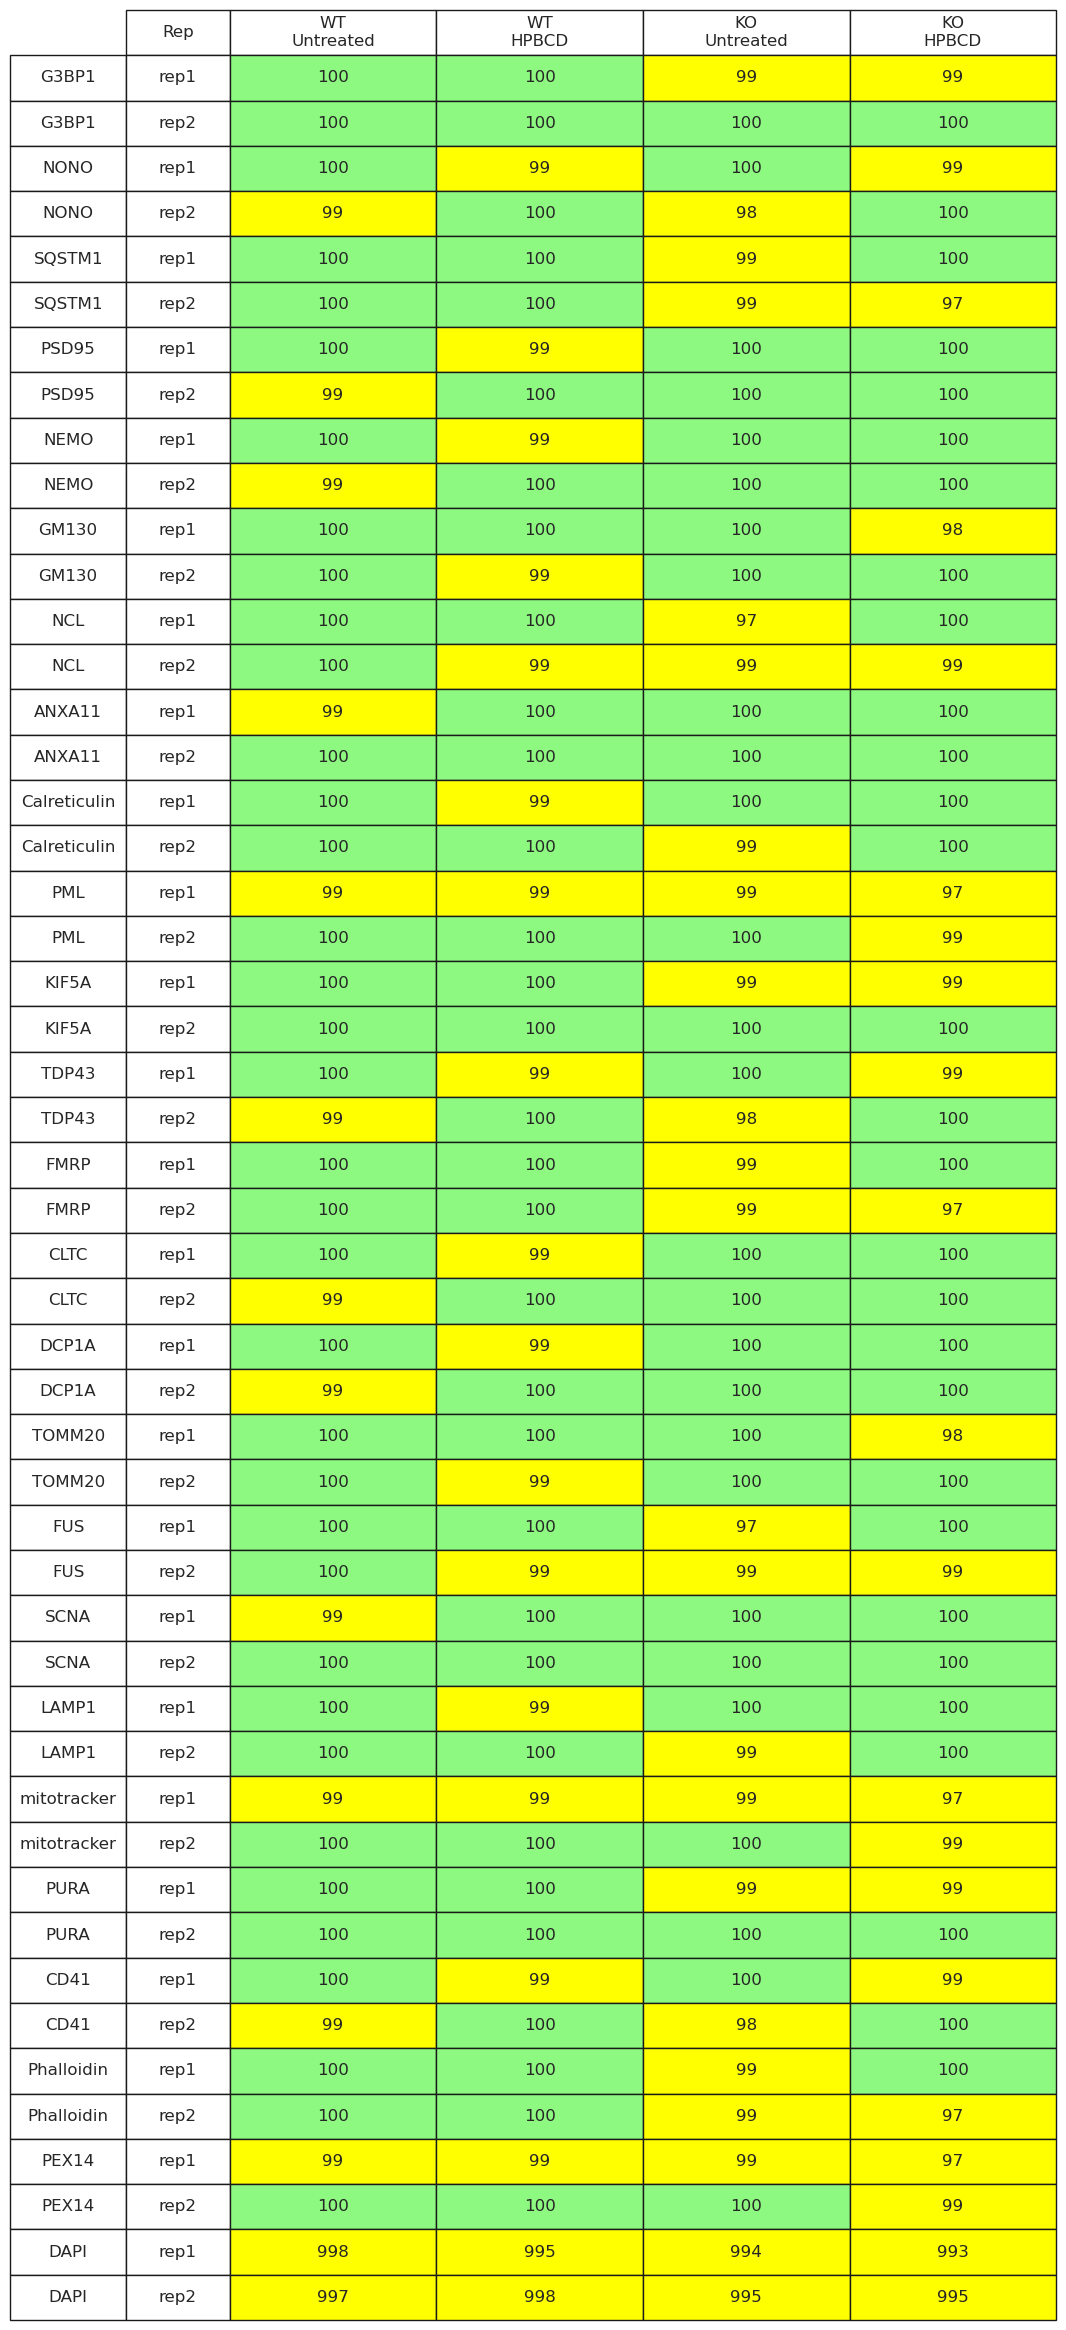

batch4
Folder structure is valid.
All files exists.
Total Sites:  27014


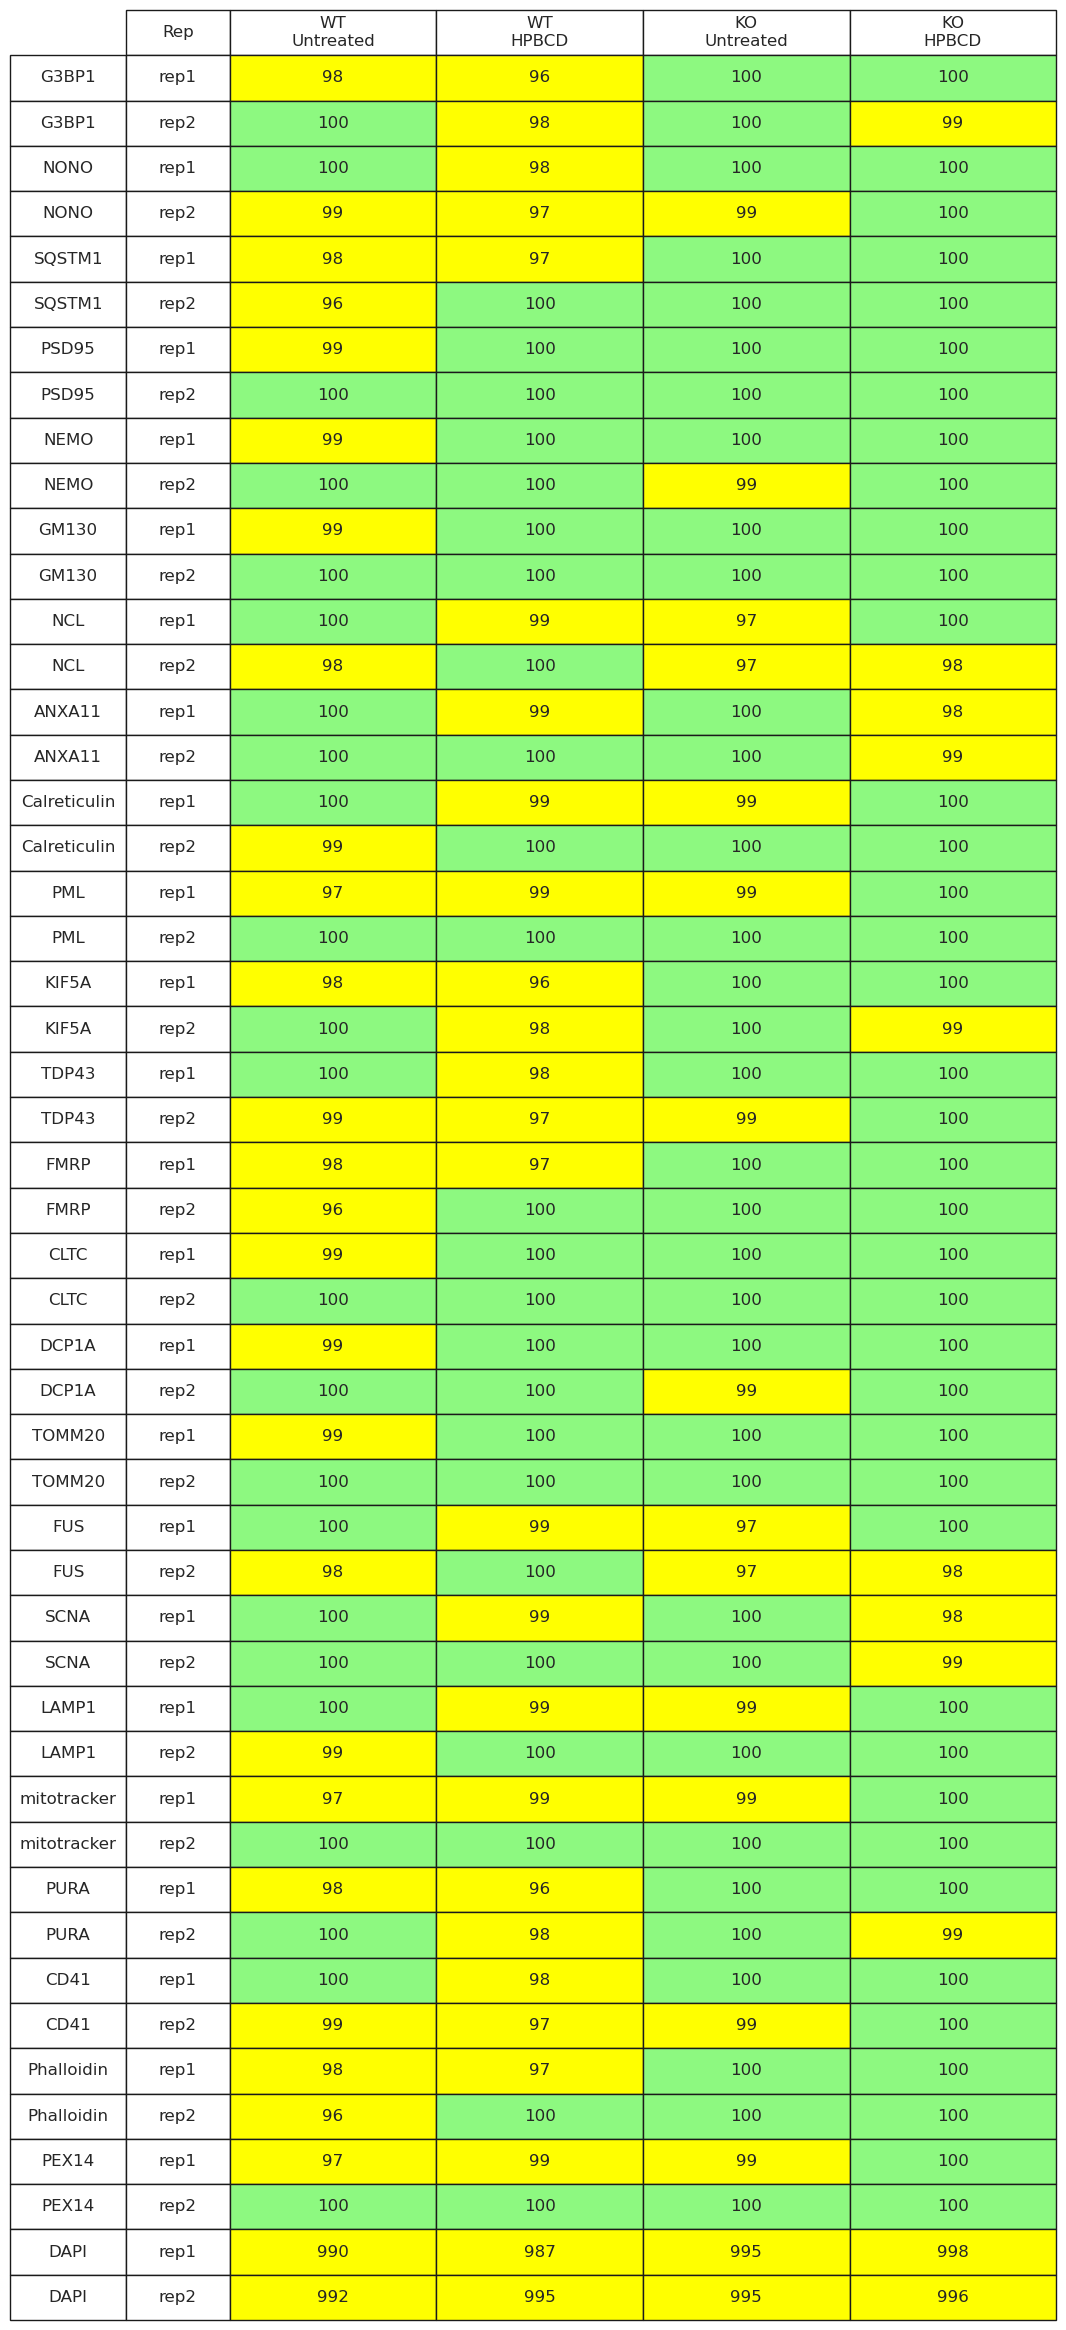

In [6]:
root_directory_proc = os.path.join(MOMAPS_DATA_HOME, 'input', 'images', 'processed', 'spd2',
                              'SpinningDisk','NiemannPick')
procs = run_validate_folder_structure(root_directory_proc, True, np_panels, 
                                      np_markers,PLOT_PATH,
                                     np_marker_info, np_cell_lines_to_cond, reps, 
                                      np_cell_lines_for_disp,
                                     np_expected_dapi_raw, batches=batches, 
                                      fig_width=4, fig_height=10)

### Difference between Raw and Processed

batch1


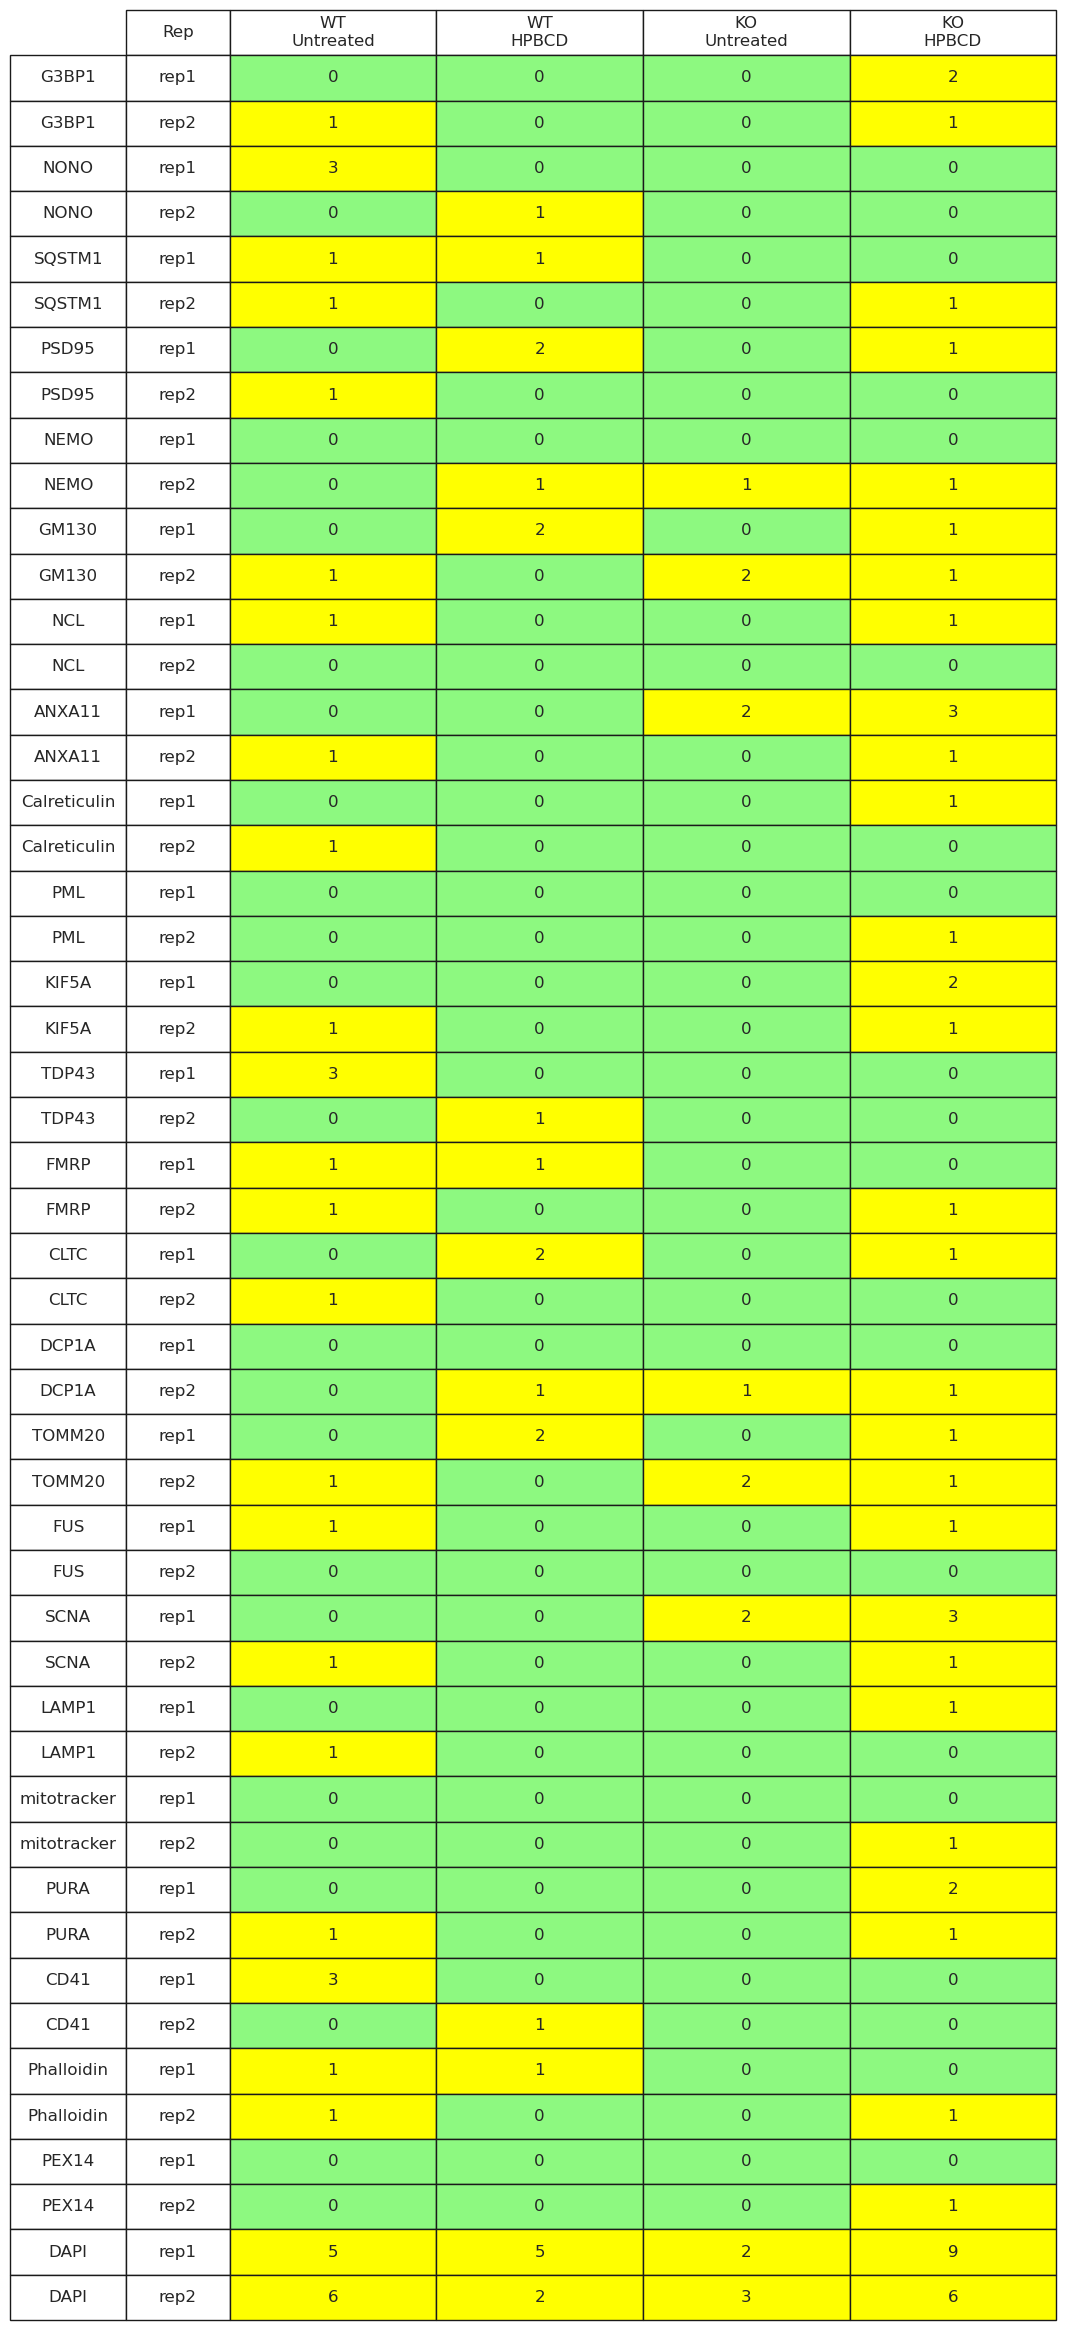

batch2


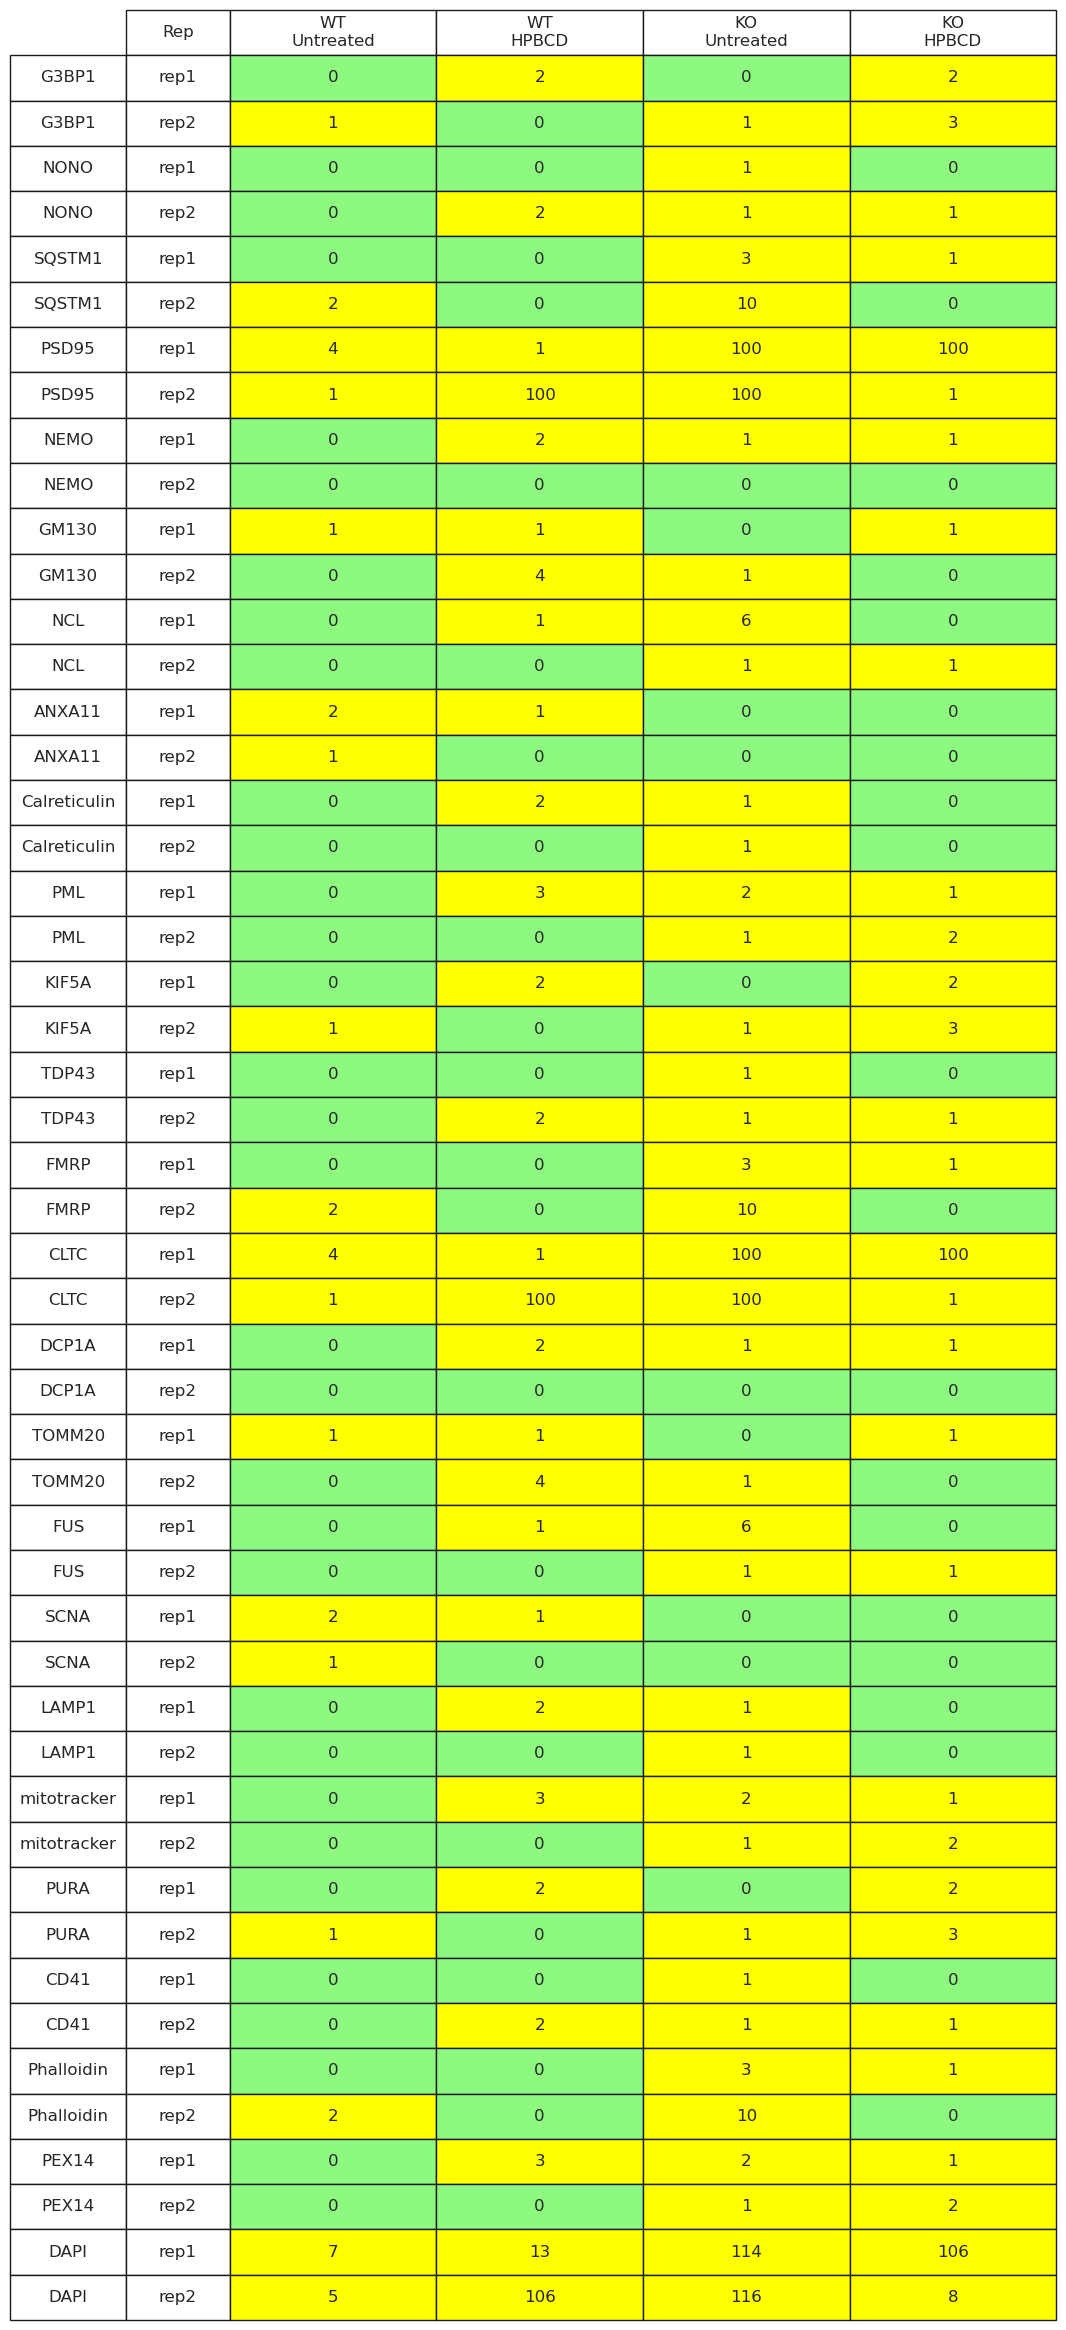

batch3


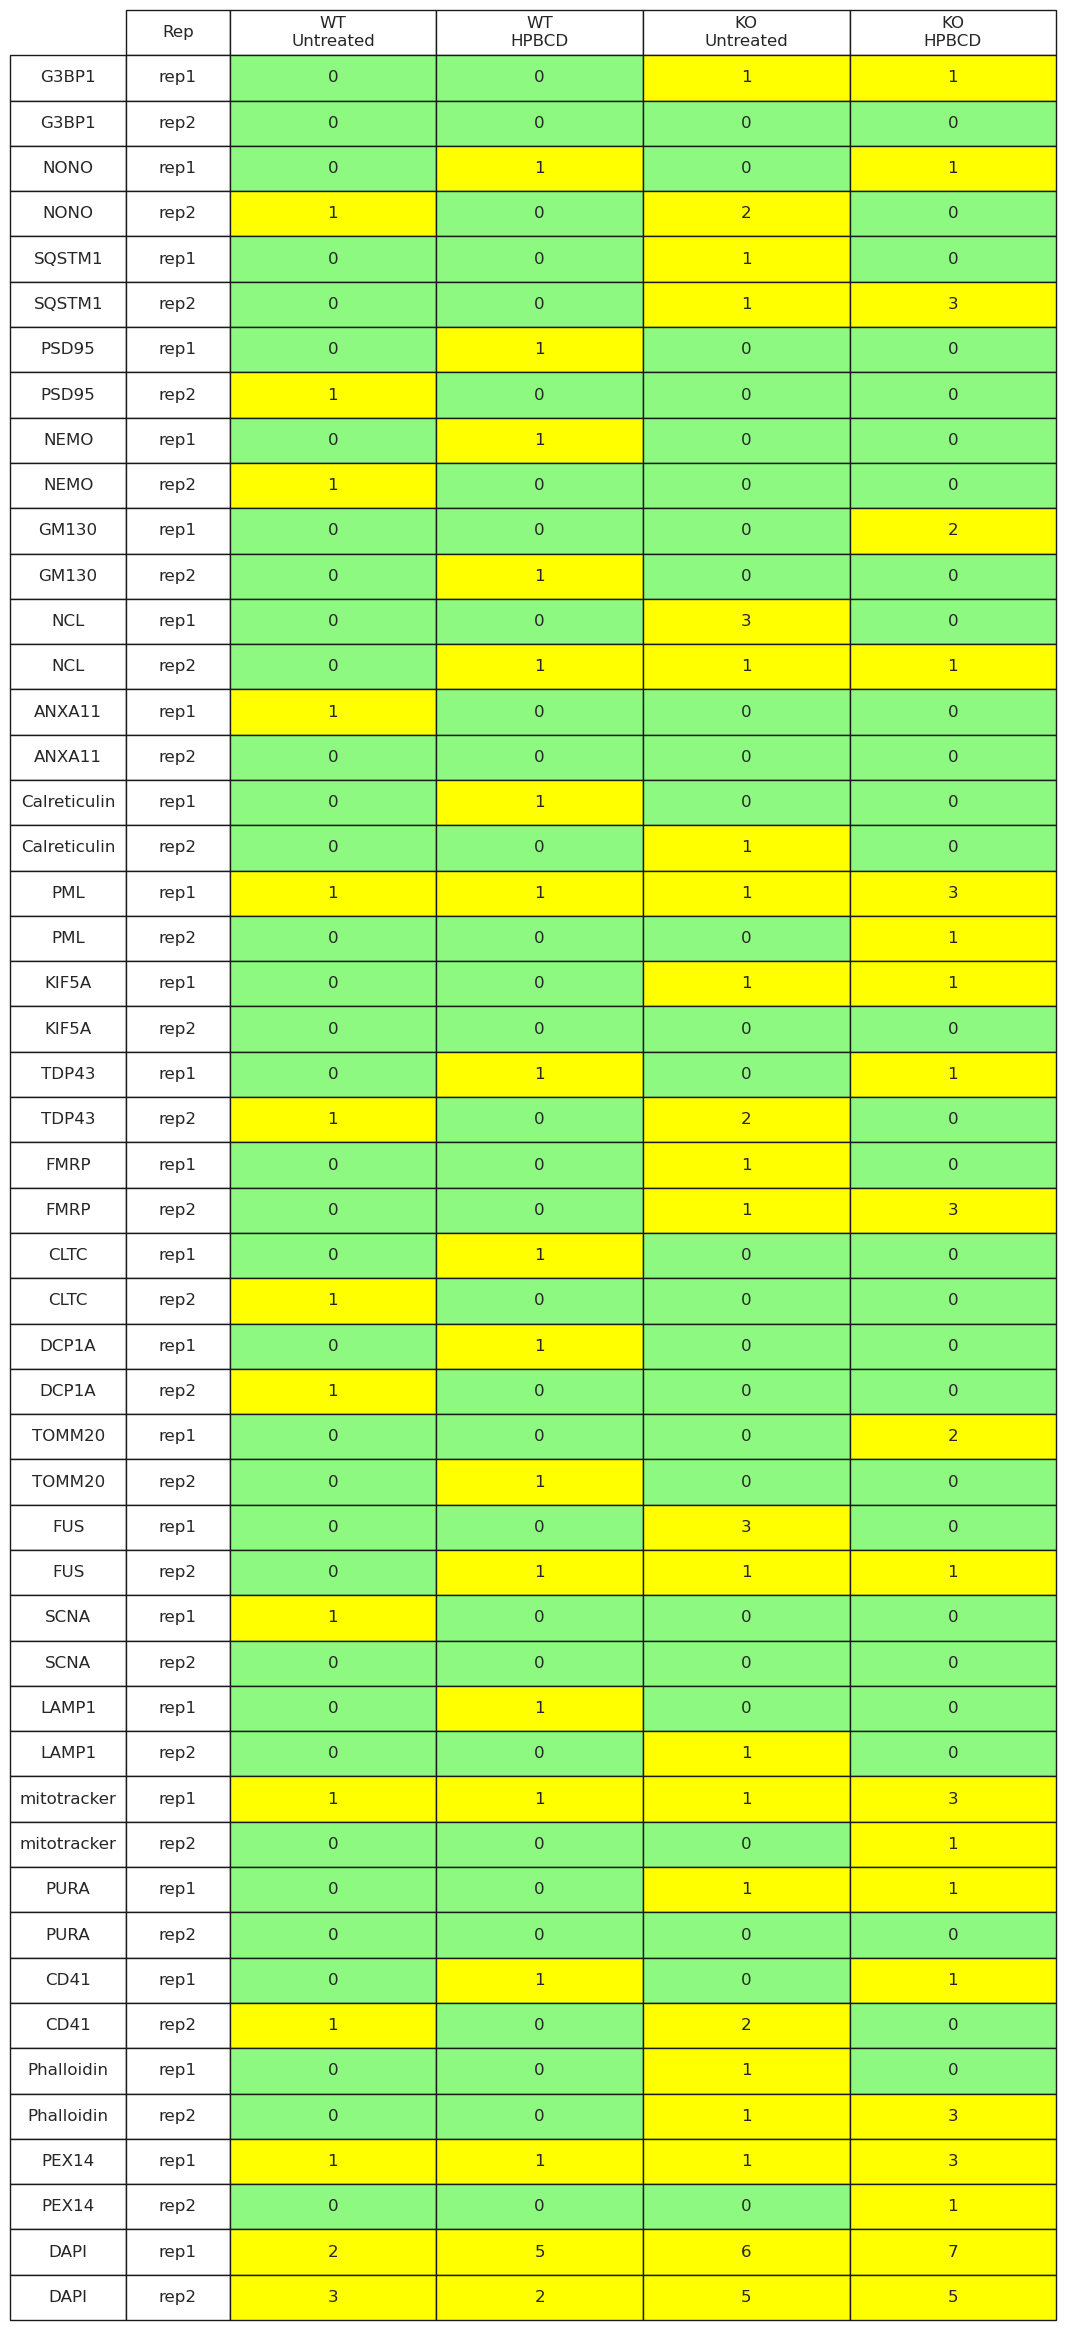

batch4


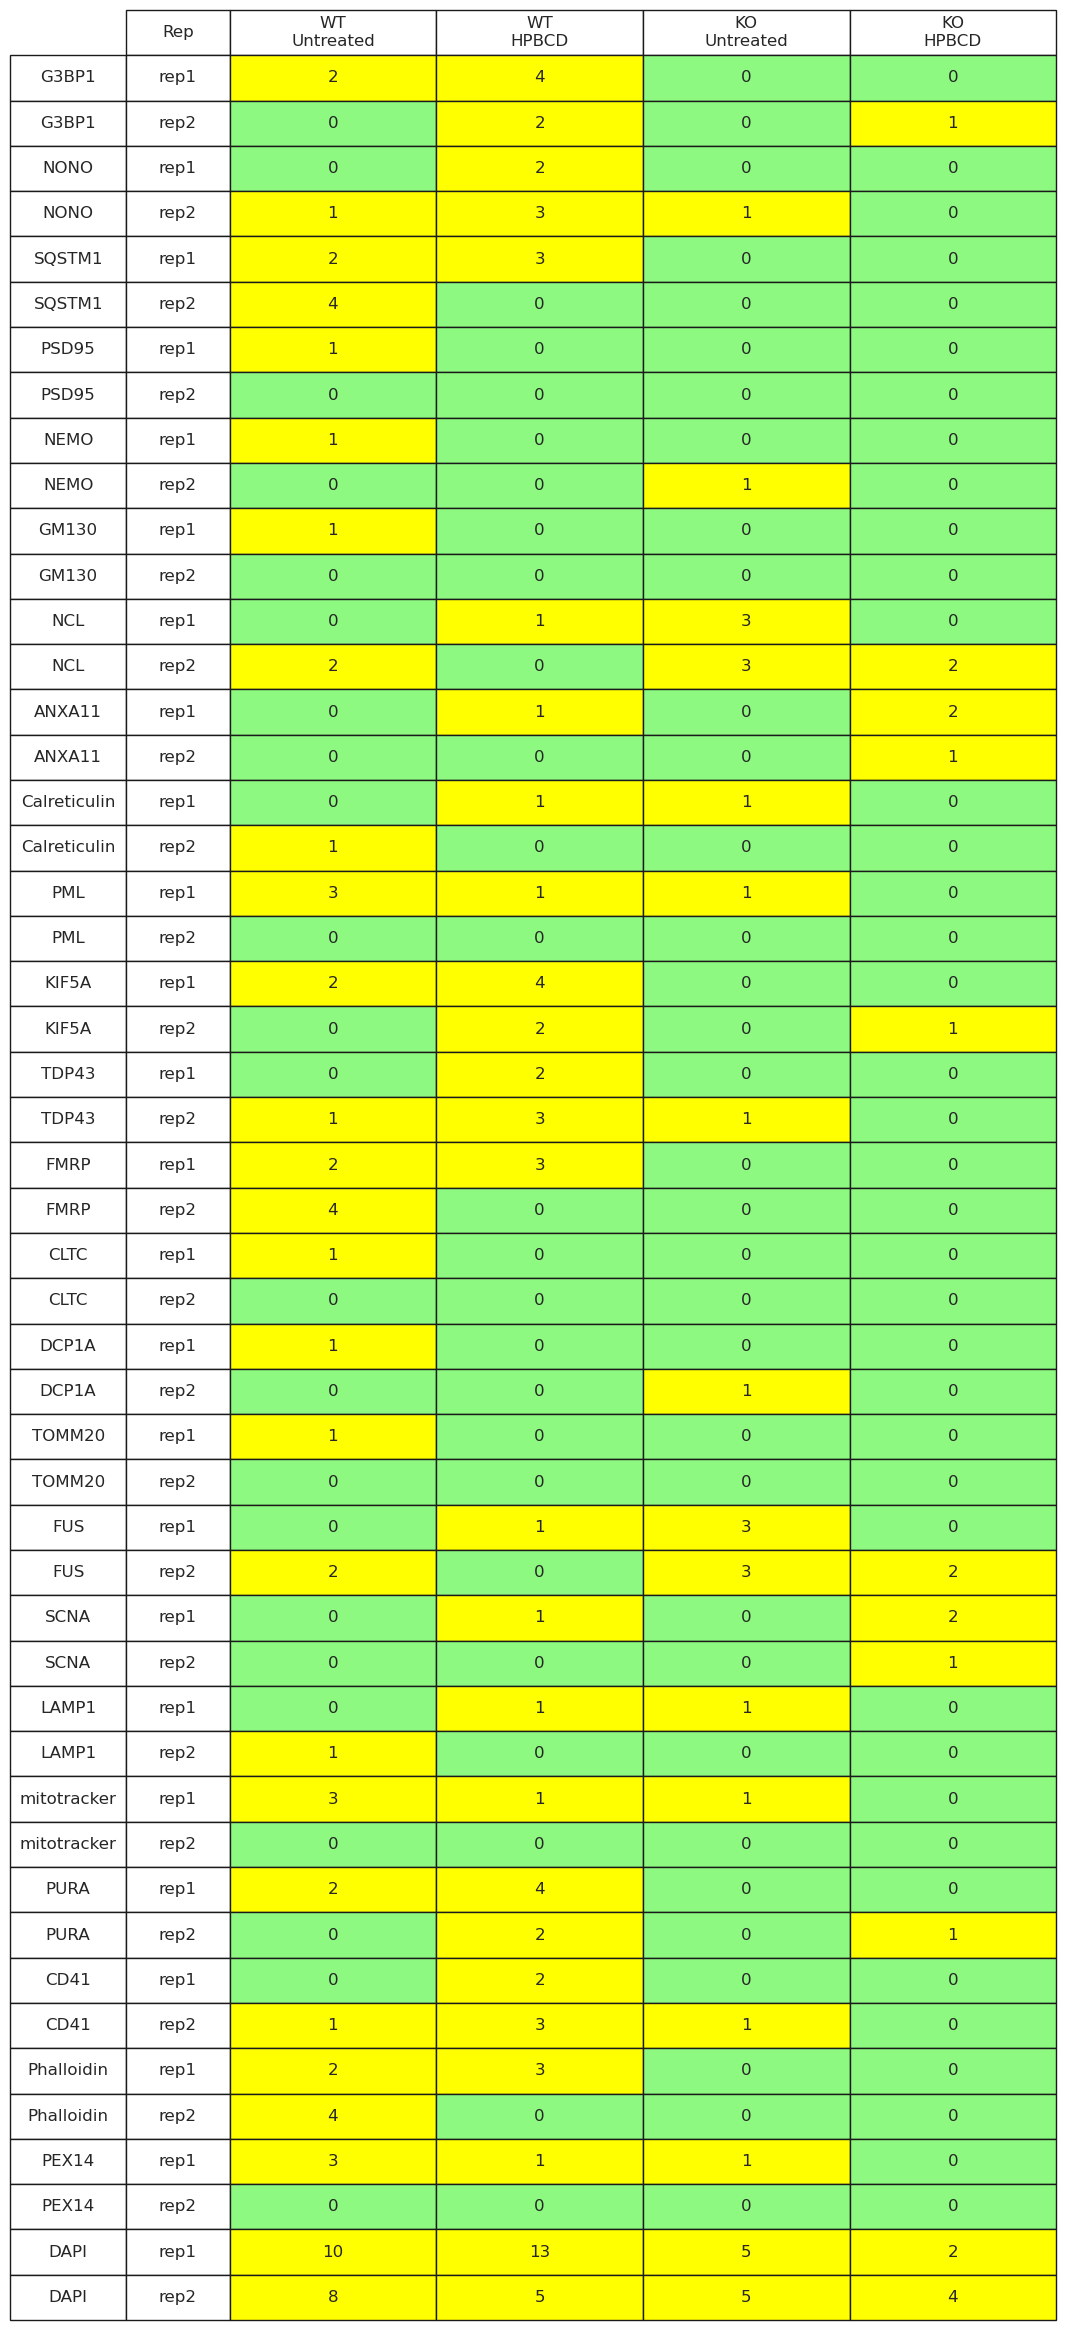

In [7]:
display_diff(batches, raws, procs, PLOT_PATH, 10,4)

In [8]:
for batch in batches:
    with contextlib.redirect_stdout(io.StringIO()):
        var = sample_and_calc_variance(root_directory_proc, batch, 
                                       sample_size_per_markers=200, 
                                       num_markers=len(np_markers),
                                      cond_count=2, rep_count=len(reps))
    print(f'{batch} var: ',var)
    

batch1 var:  0.00931783379259704
batch2 var:  0.00902956089199543
batch3 var:  0.009160096450070246
batch4 var:  0.009119440078801751



# <font color='red'>Number of sites in each batch and cell line </font>


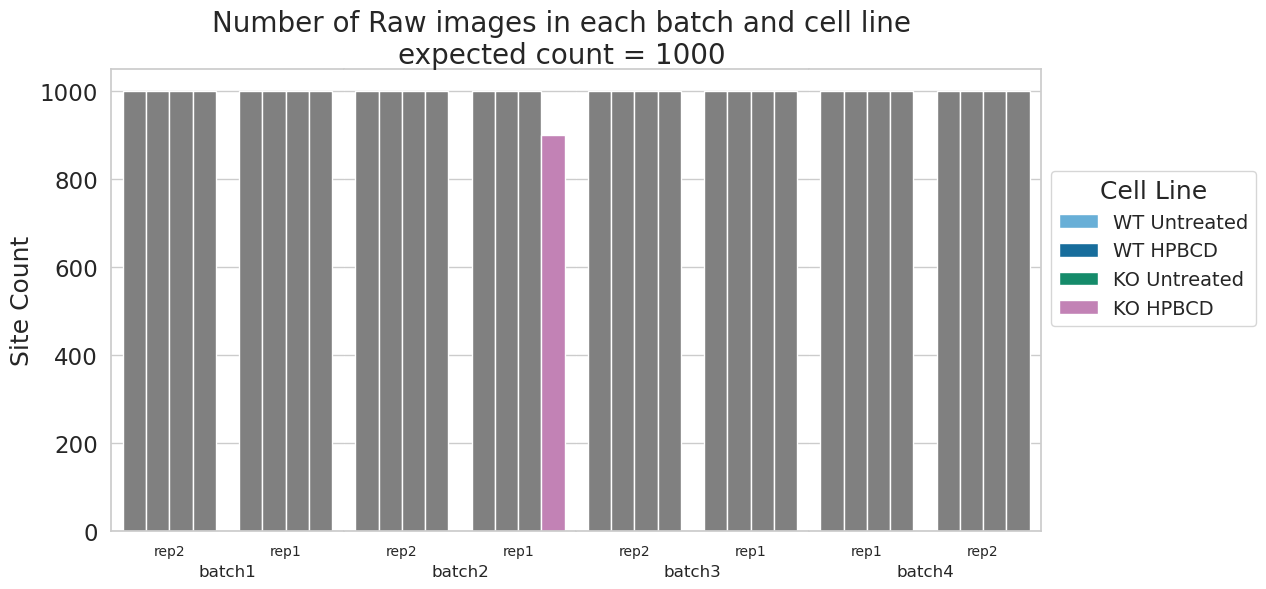

In [9]:
plot_sites_count(df, np_expected_raw, np_lines_order, np_custom_palette, split_to_reps=True)

# <font color='red'>Number of Cells in Site for each batch and cell line </font>

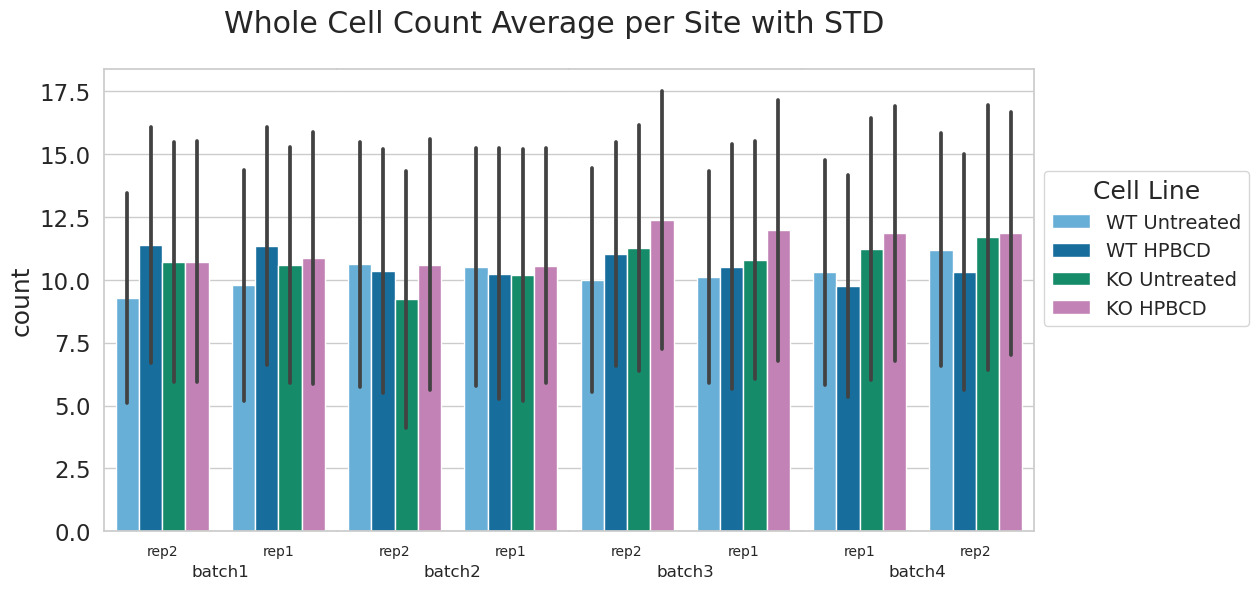

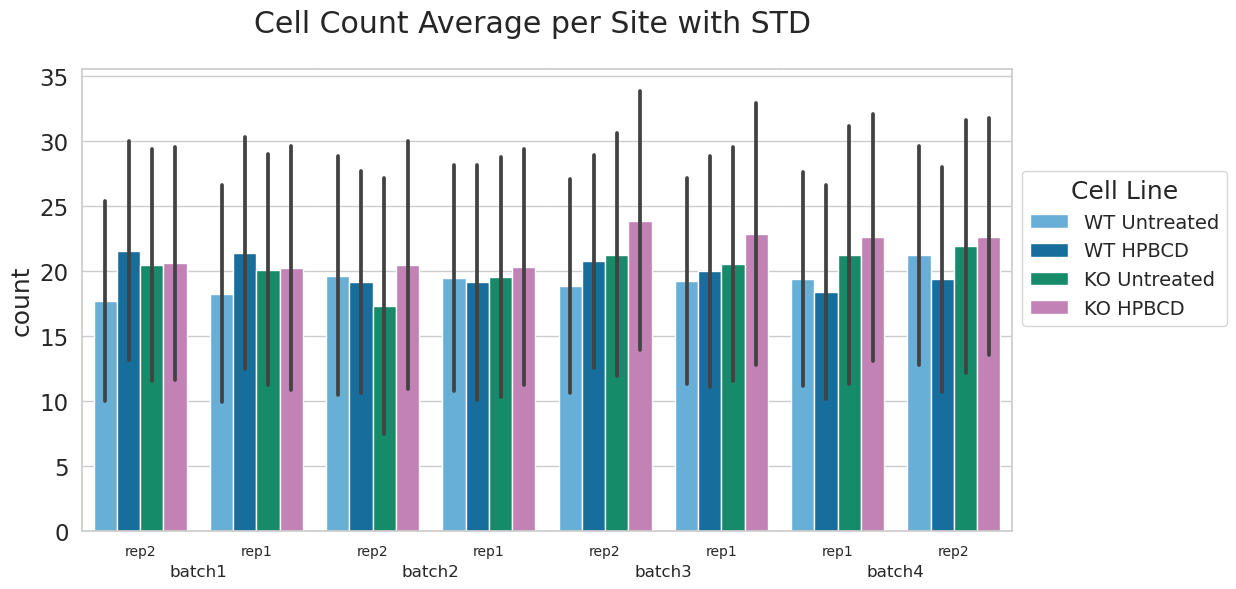

In [10]:
df_no_empty_sites = df[df.n_valid_tiles !=0]
plot_cell_count(df_no_empty_sites, np_lines_order, np_custom_palette, whole_cells=True)

plot_cell_count(df_no_empty_sites, np_lines_order, np_custom_palette, whole_cells=False)

# can add norm=True to norm by max


# <font color='blue'>number of valid tiles per image (site)</font>


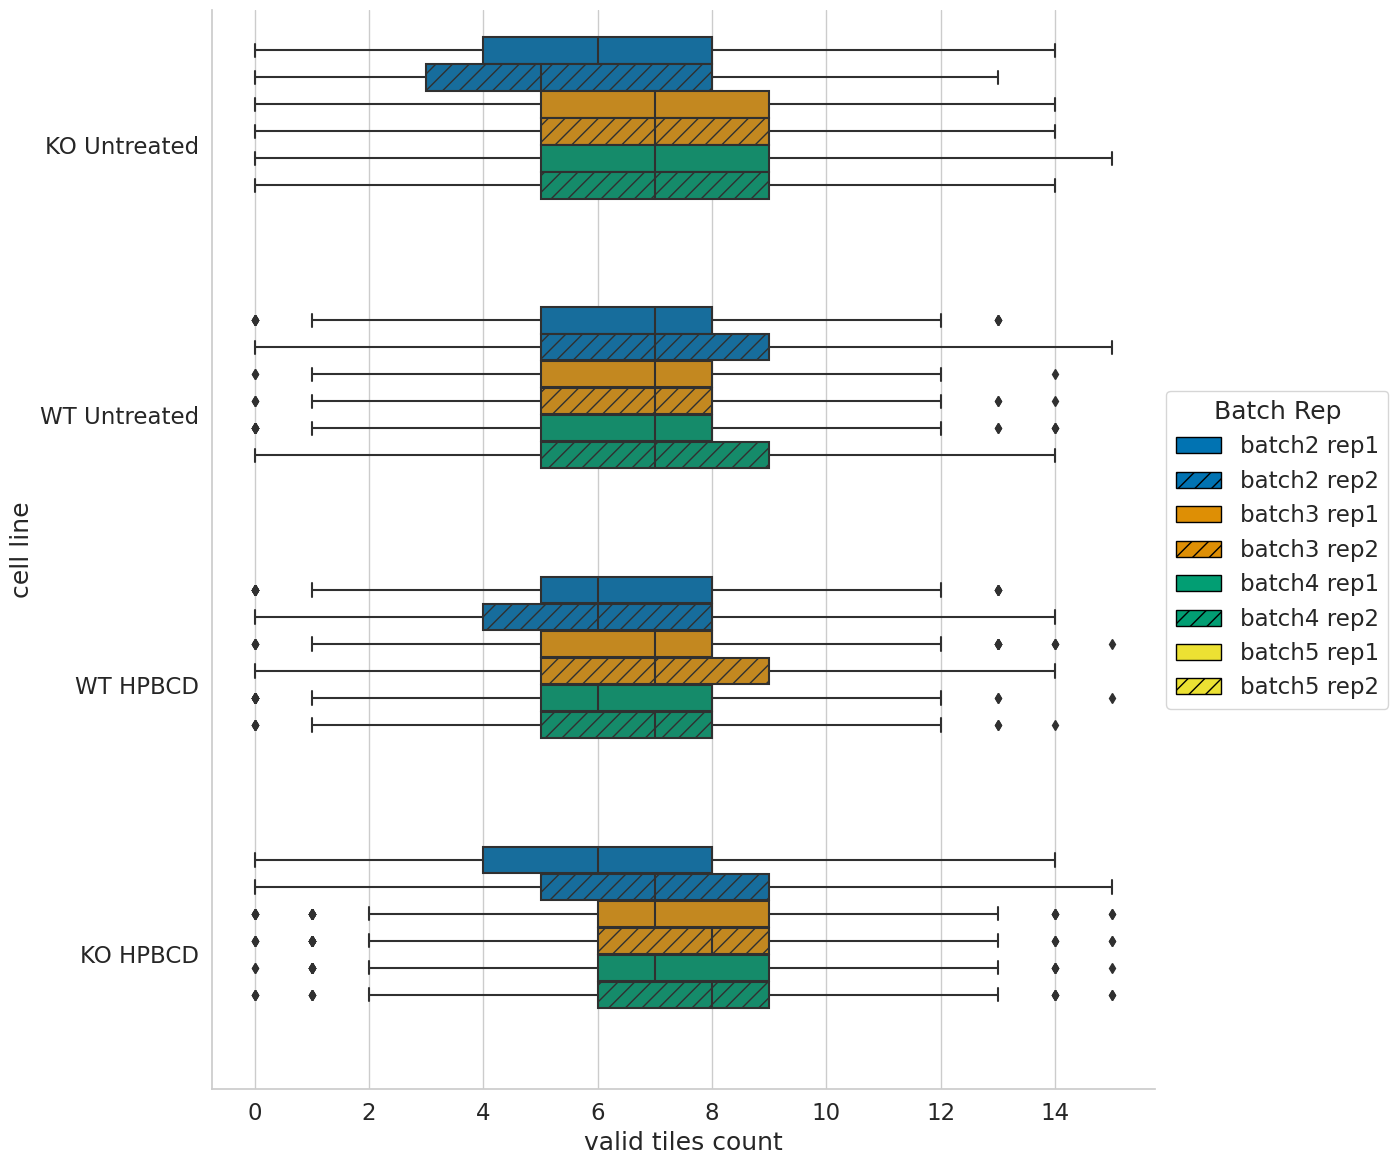

In [11]:
plot_n_valid_tiles_count(df, custom_palette, reps, batch_min=2, batch_max=5)


## <font color='purple'>Heatmap QC per batch, panel and cell line(tiles that passed QC condition)  </font>


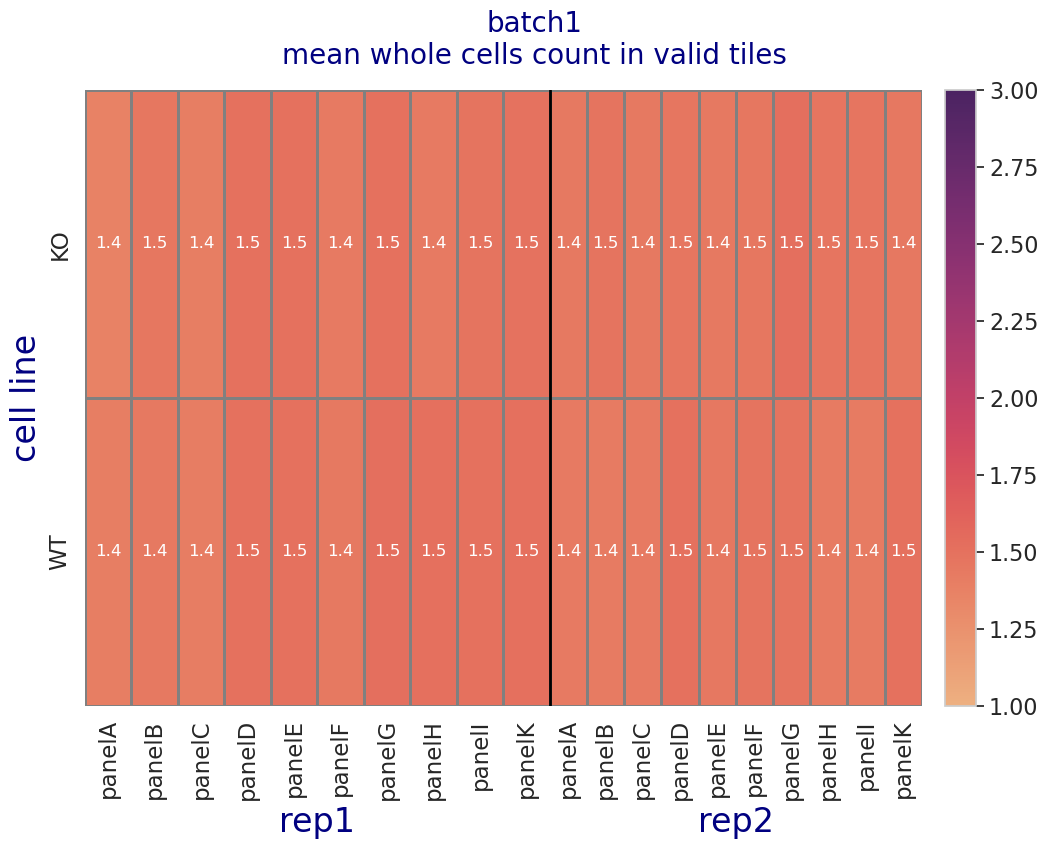

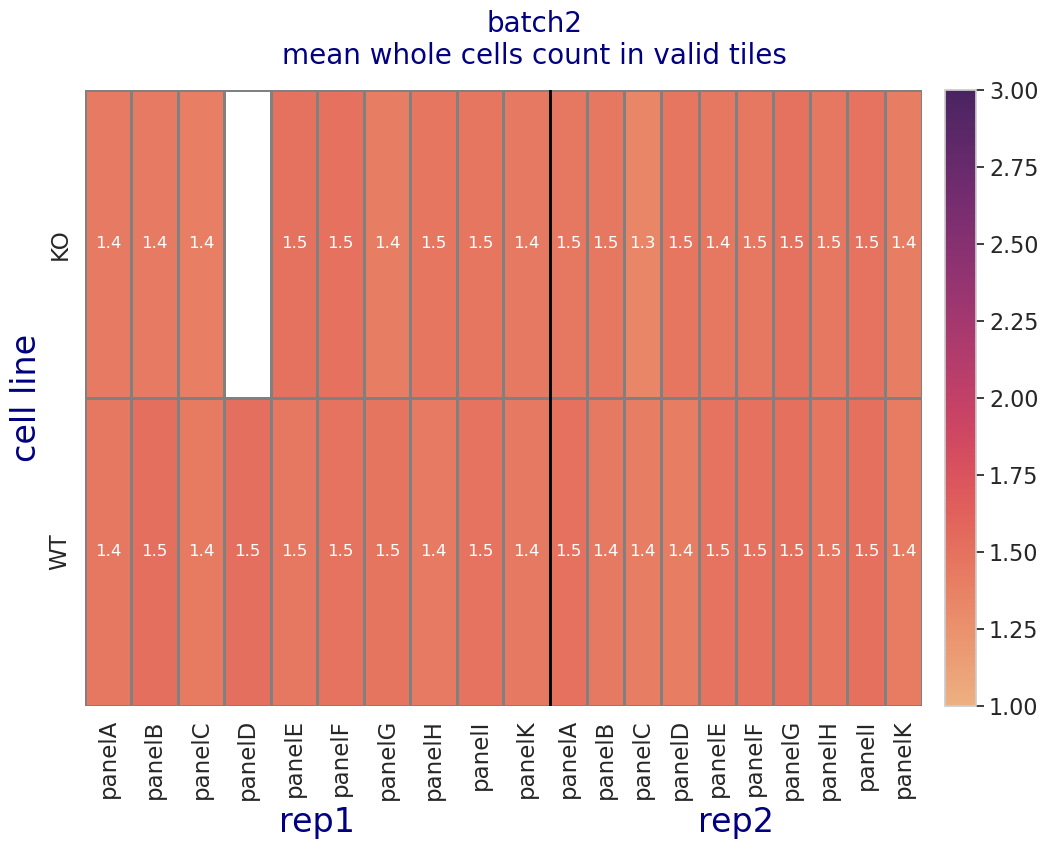

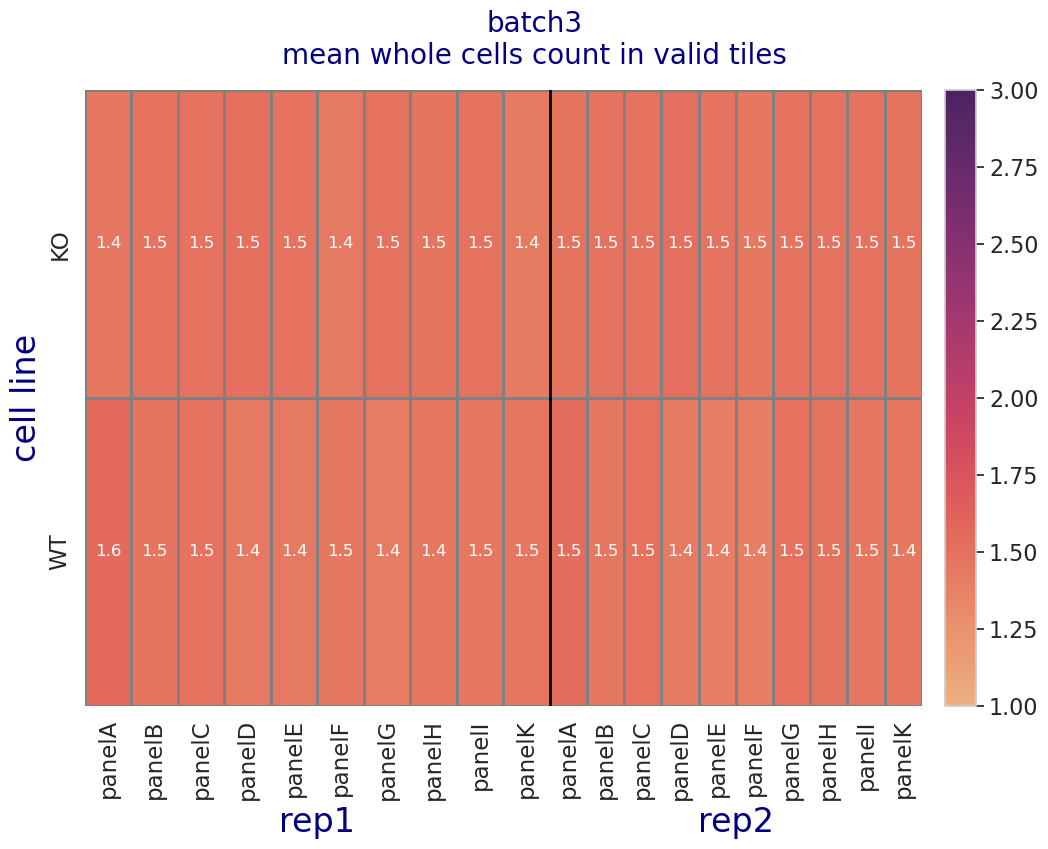

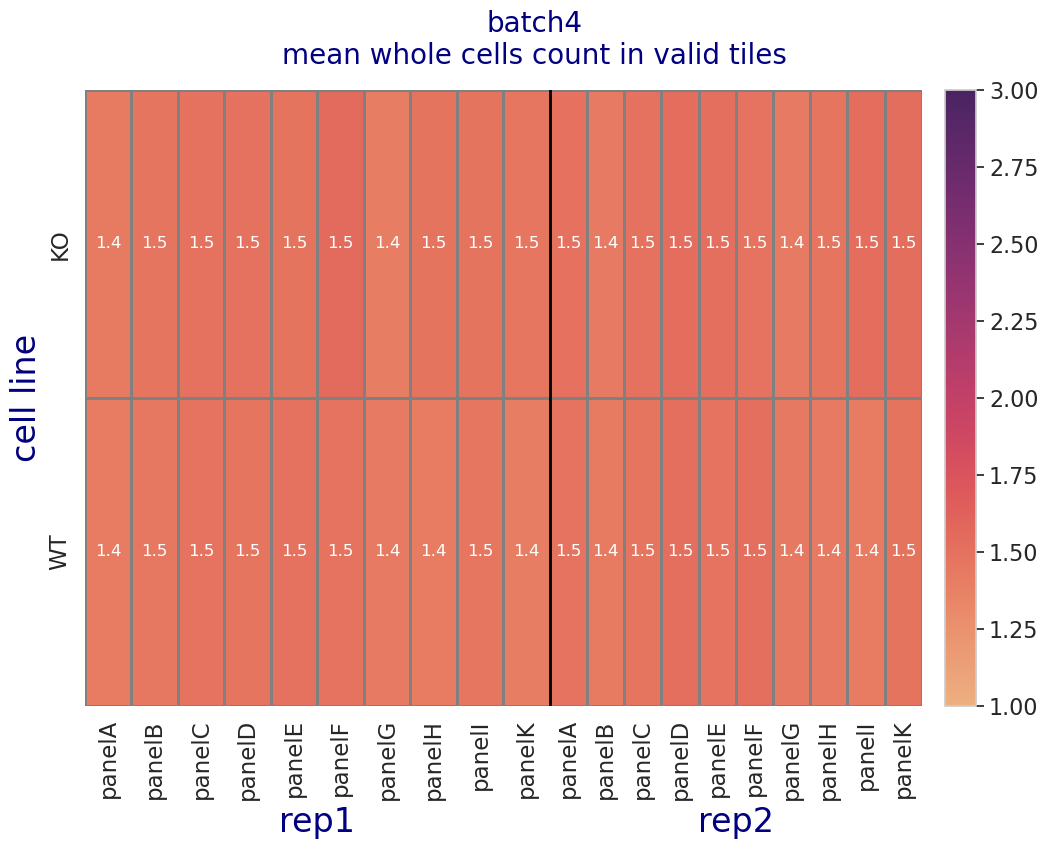

In [12]:
plot_hm(df, split_by='rep', rows='cell_line', columns='panel')

# Assessing Staining Reproducibility and Outliers

batch1


/home/labs/hornsteinlab/Collaboration/MOmaps_Noam/MOmaps/src/common/lib/images_qc.py:770: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


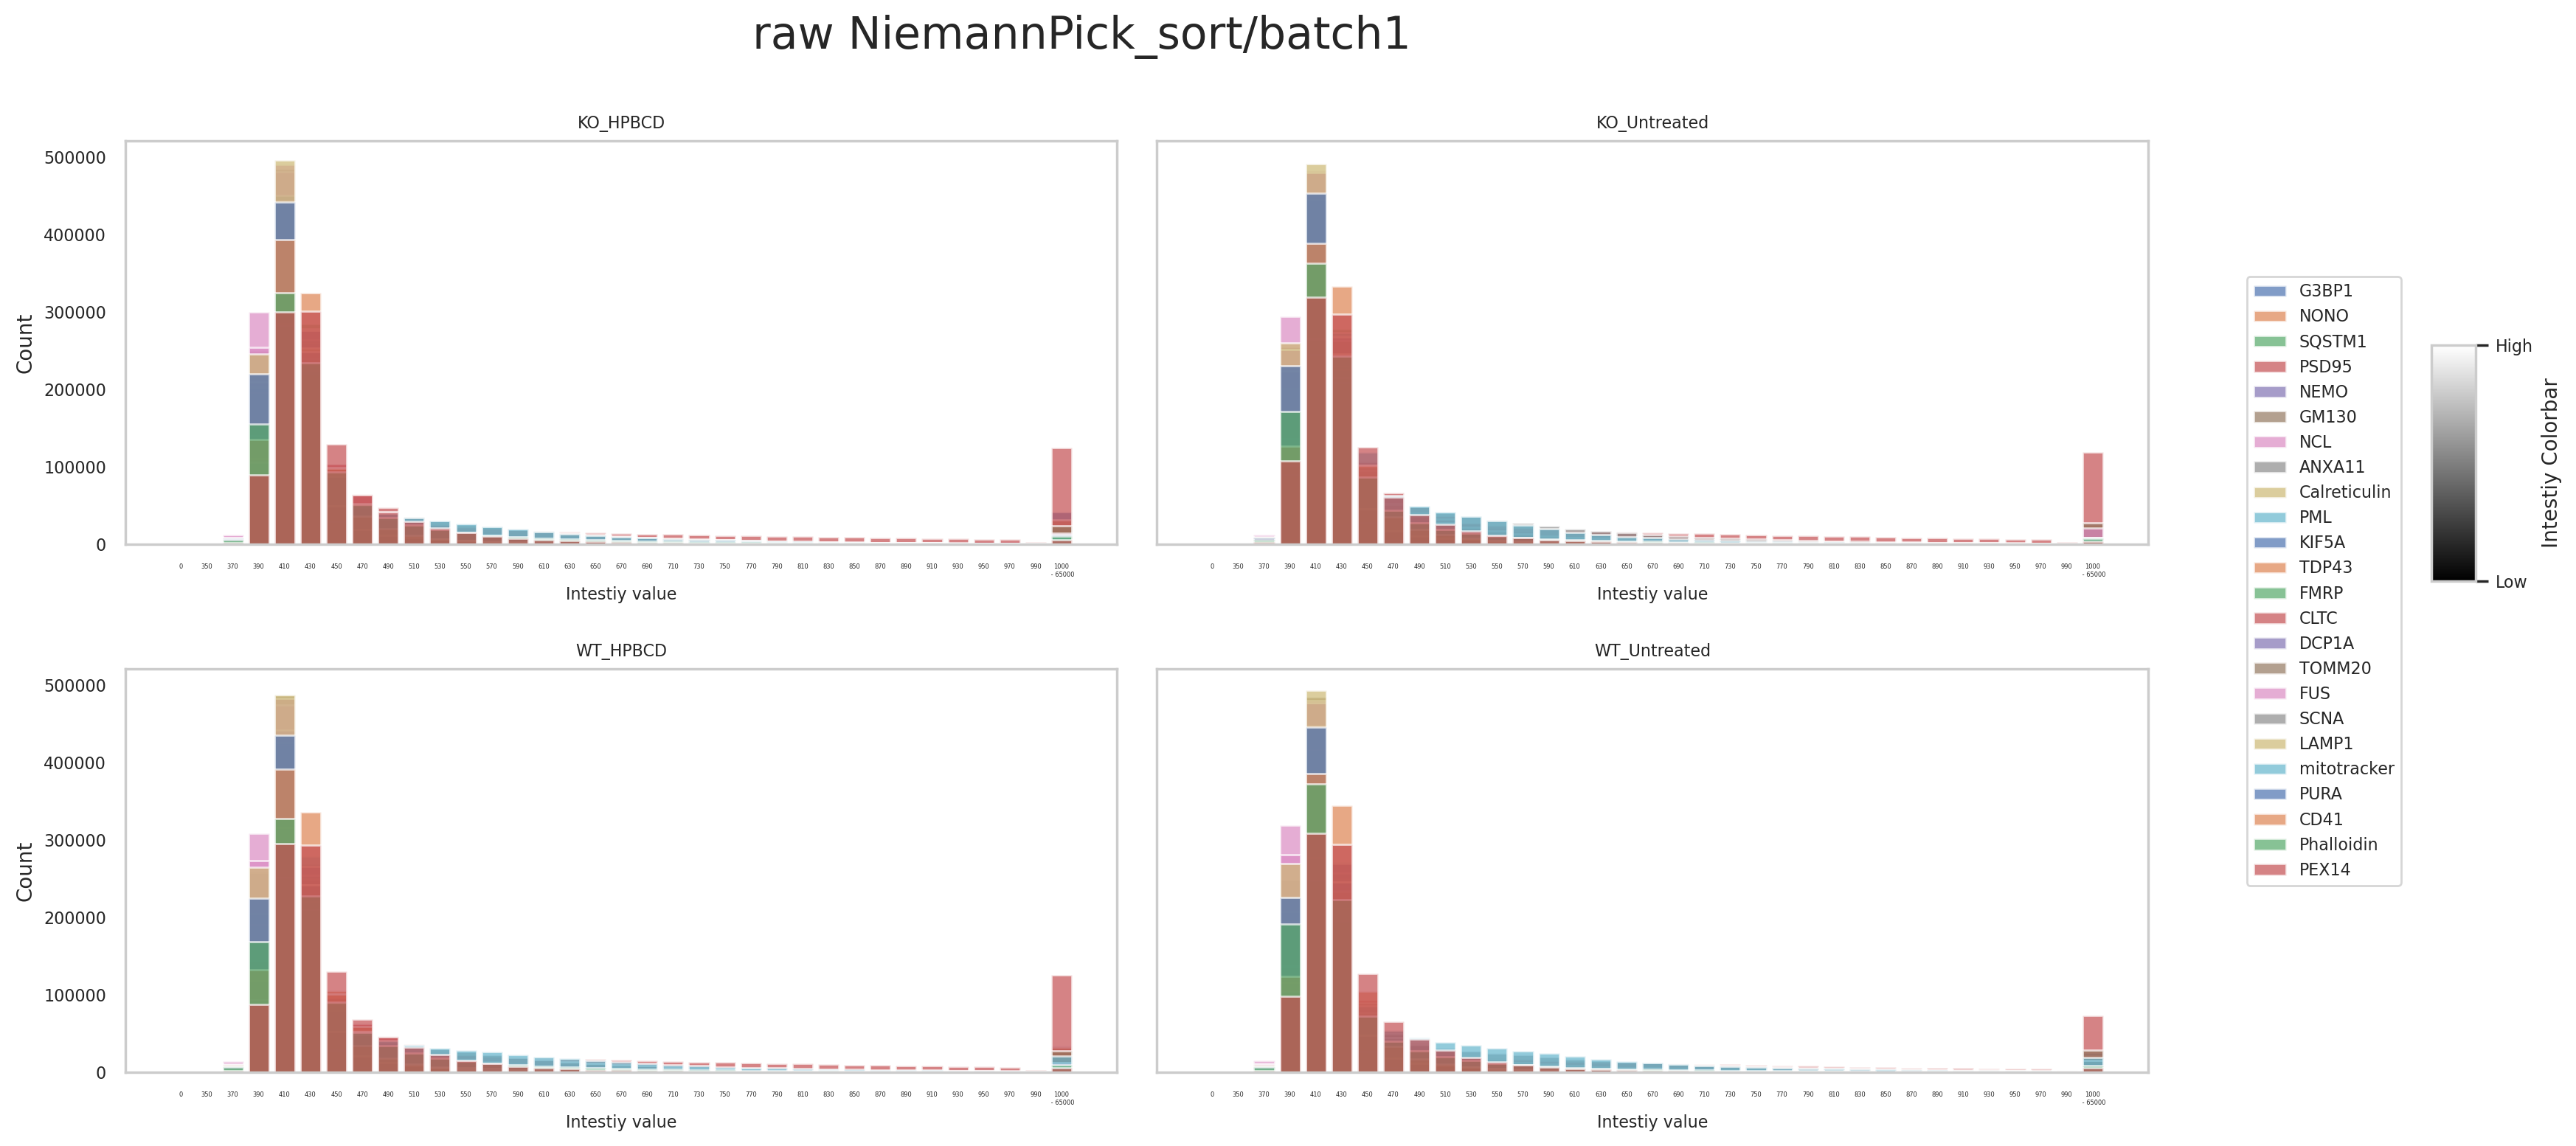

/home/labs/hornsteinlab/Collaboration/MOmaps/anaconda3/momaps_37/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


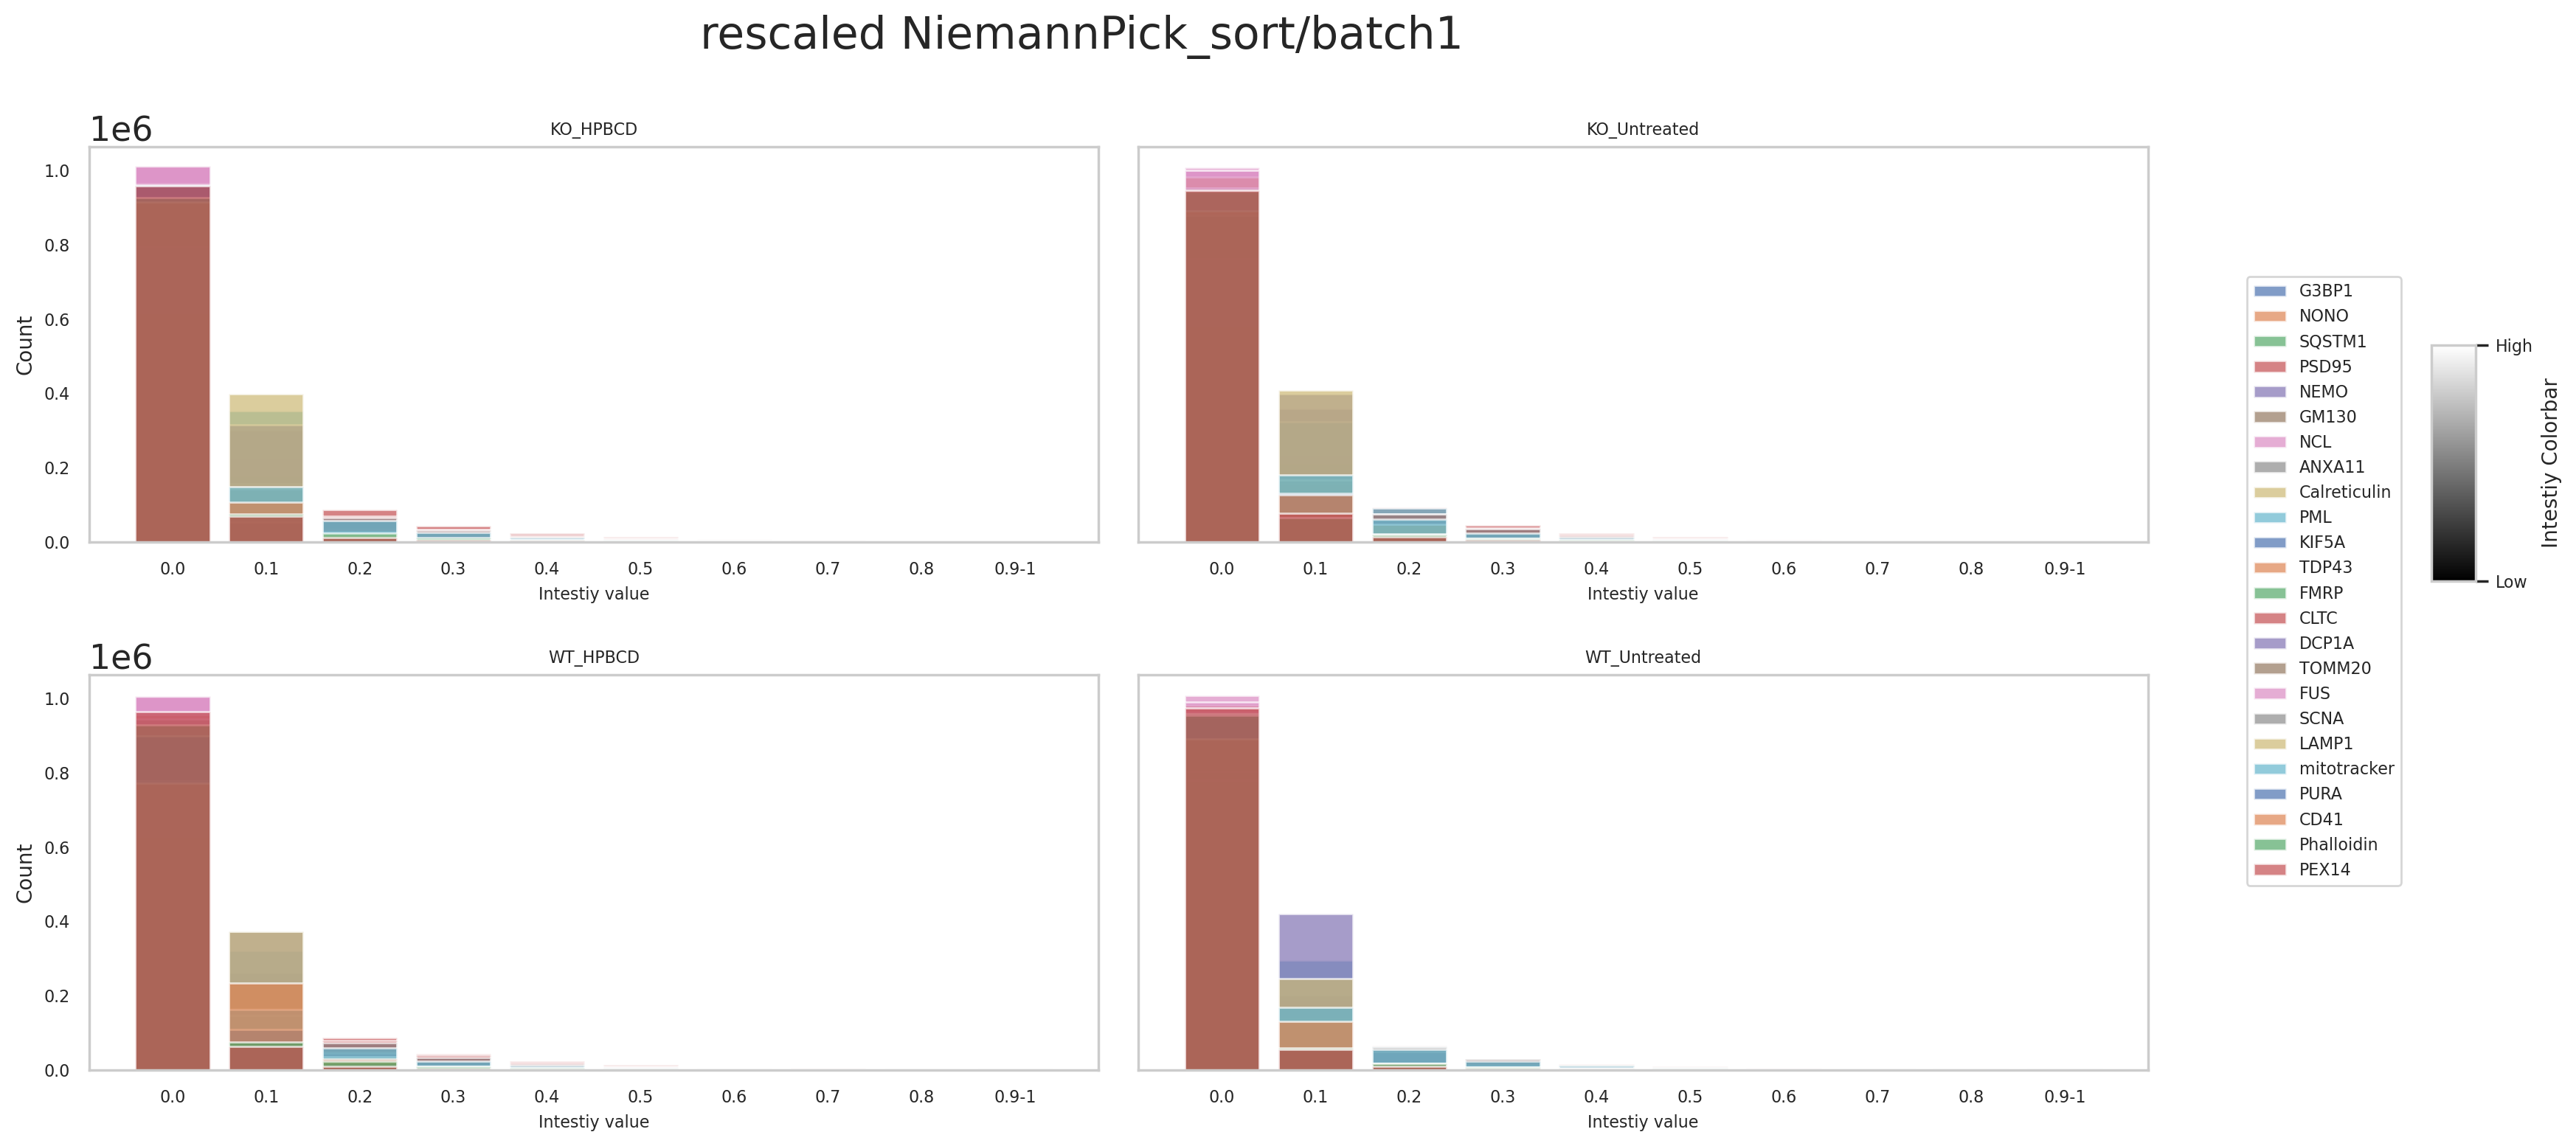

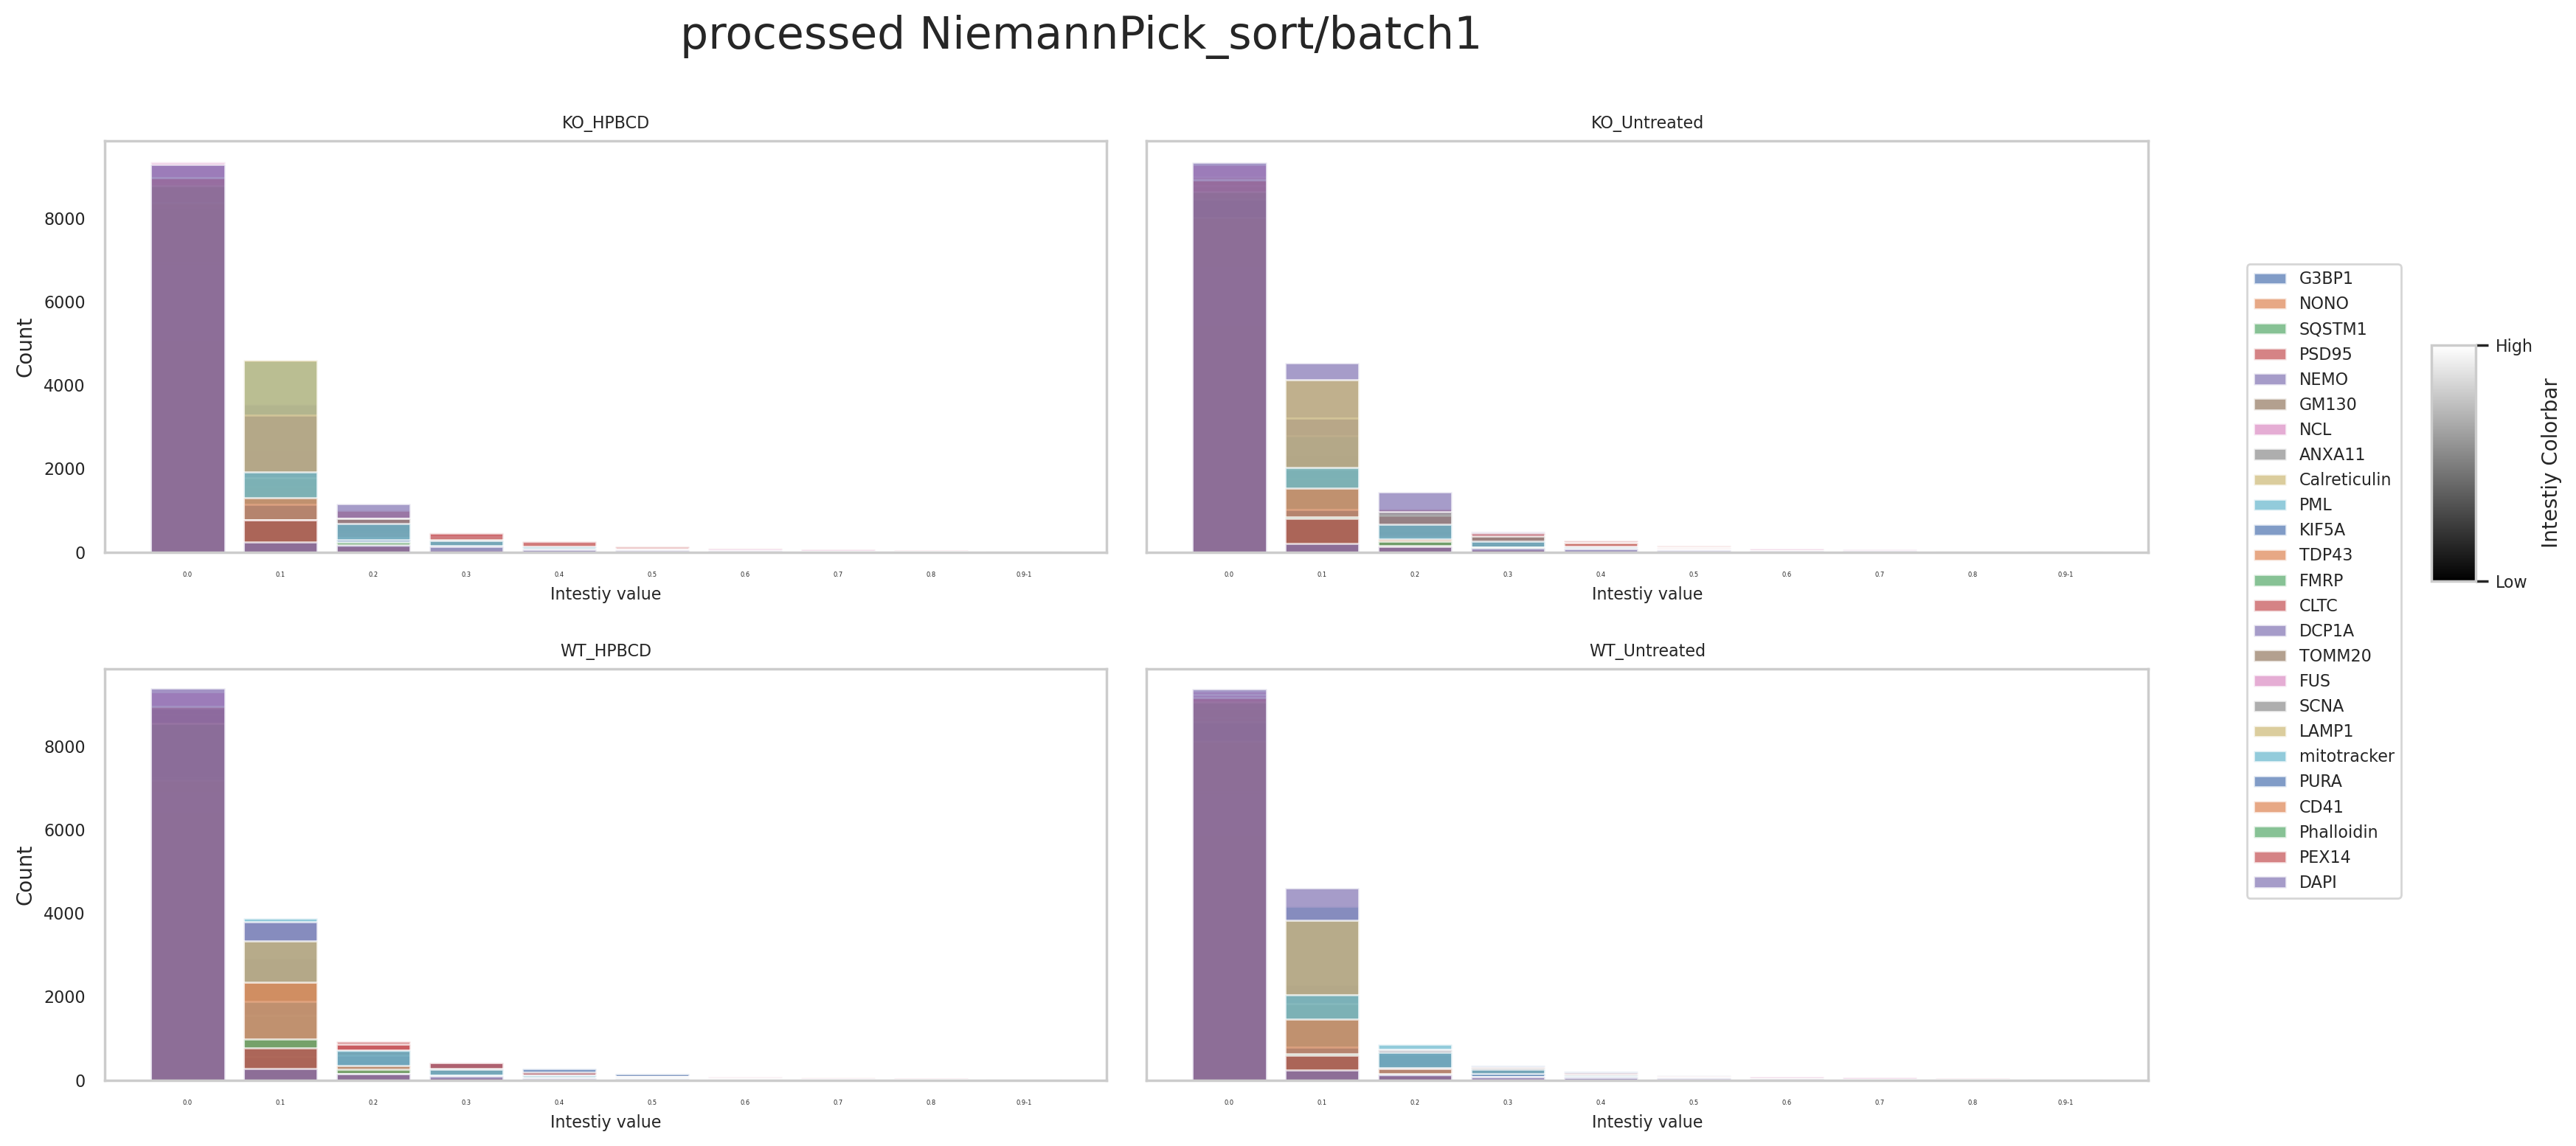

batch2


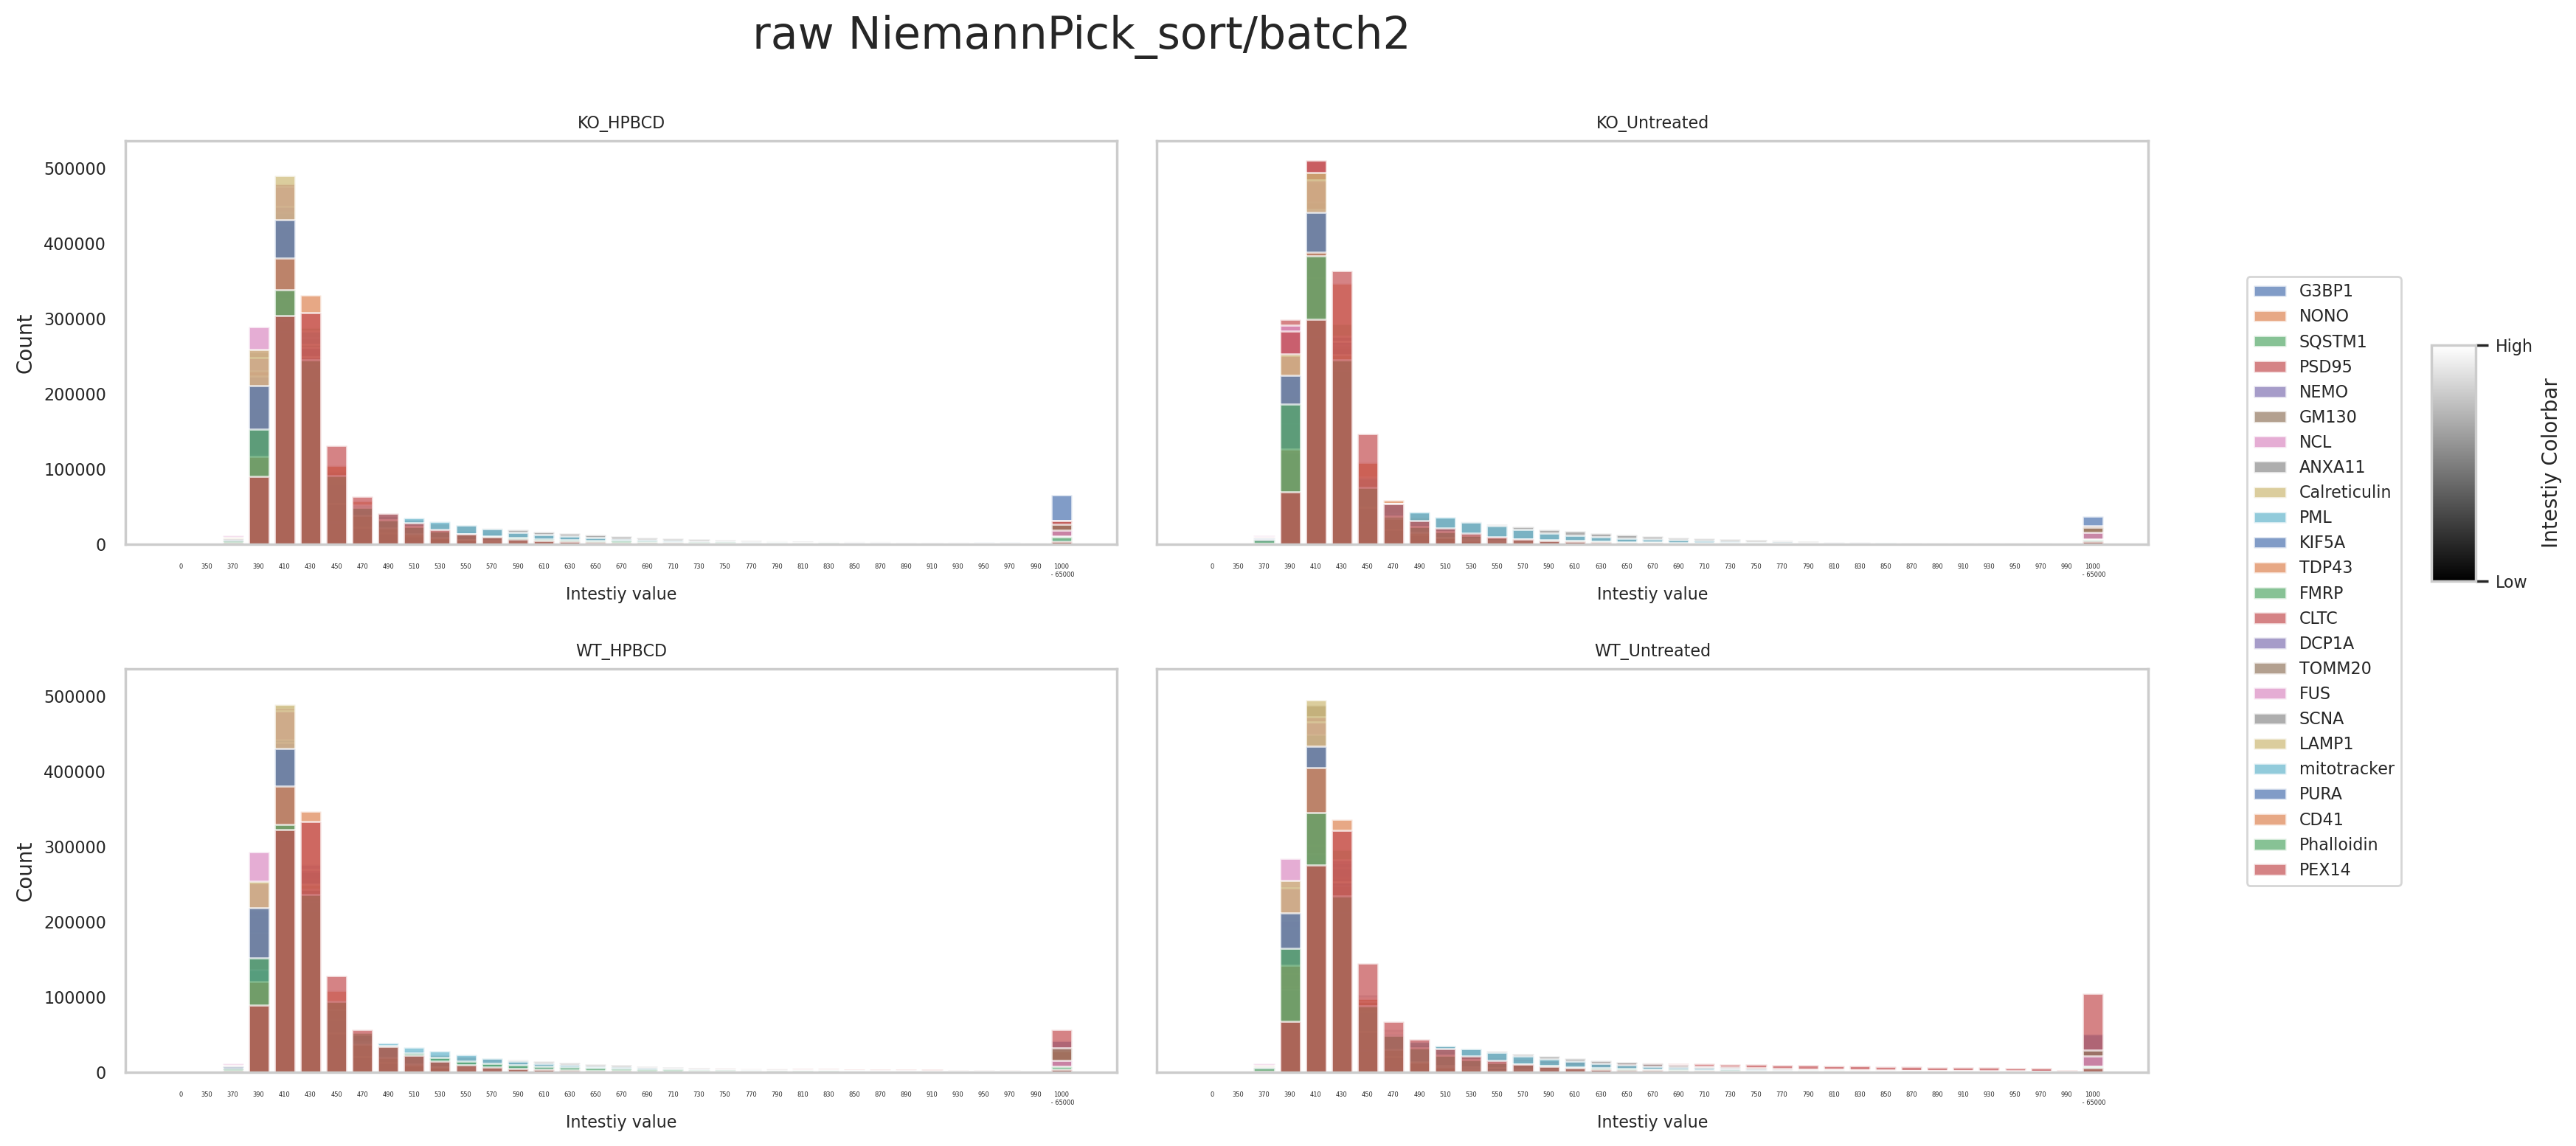

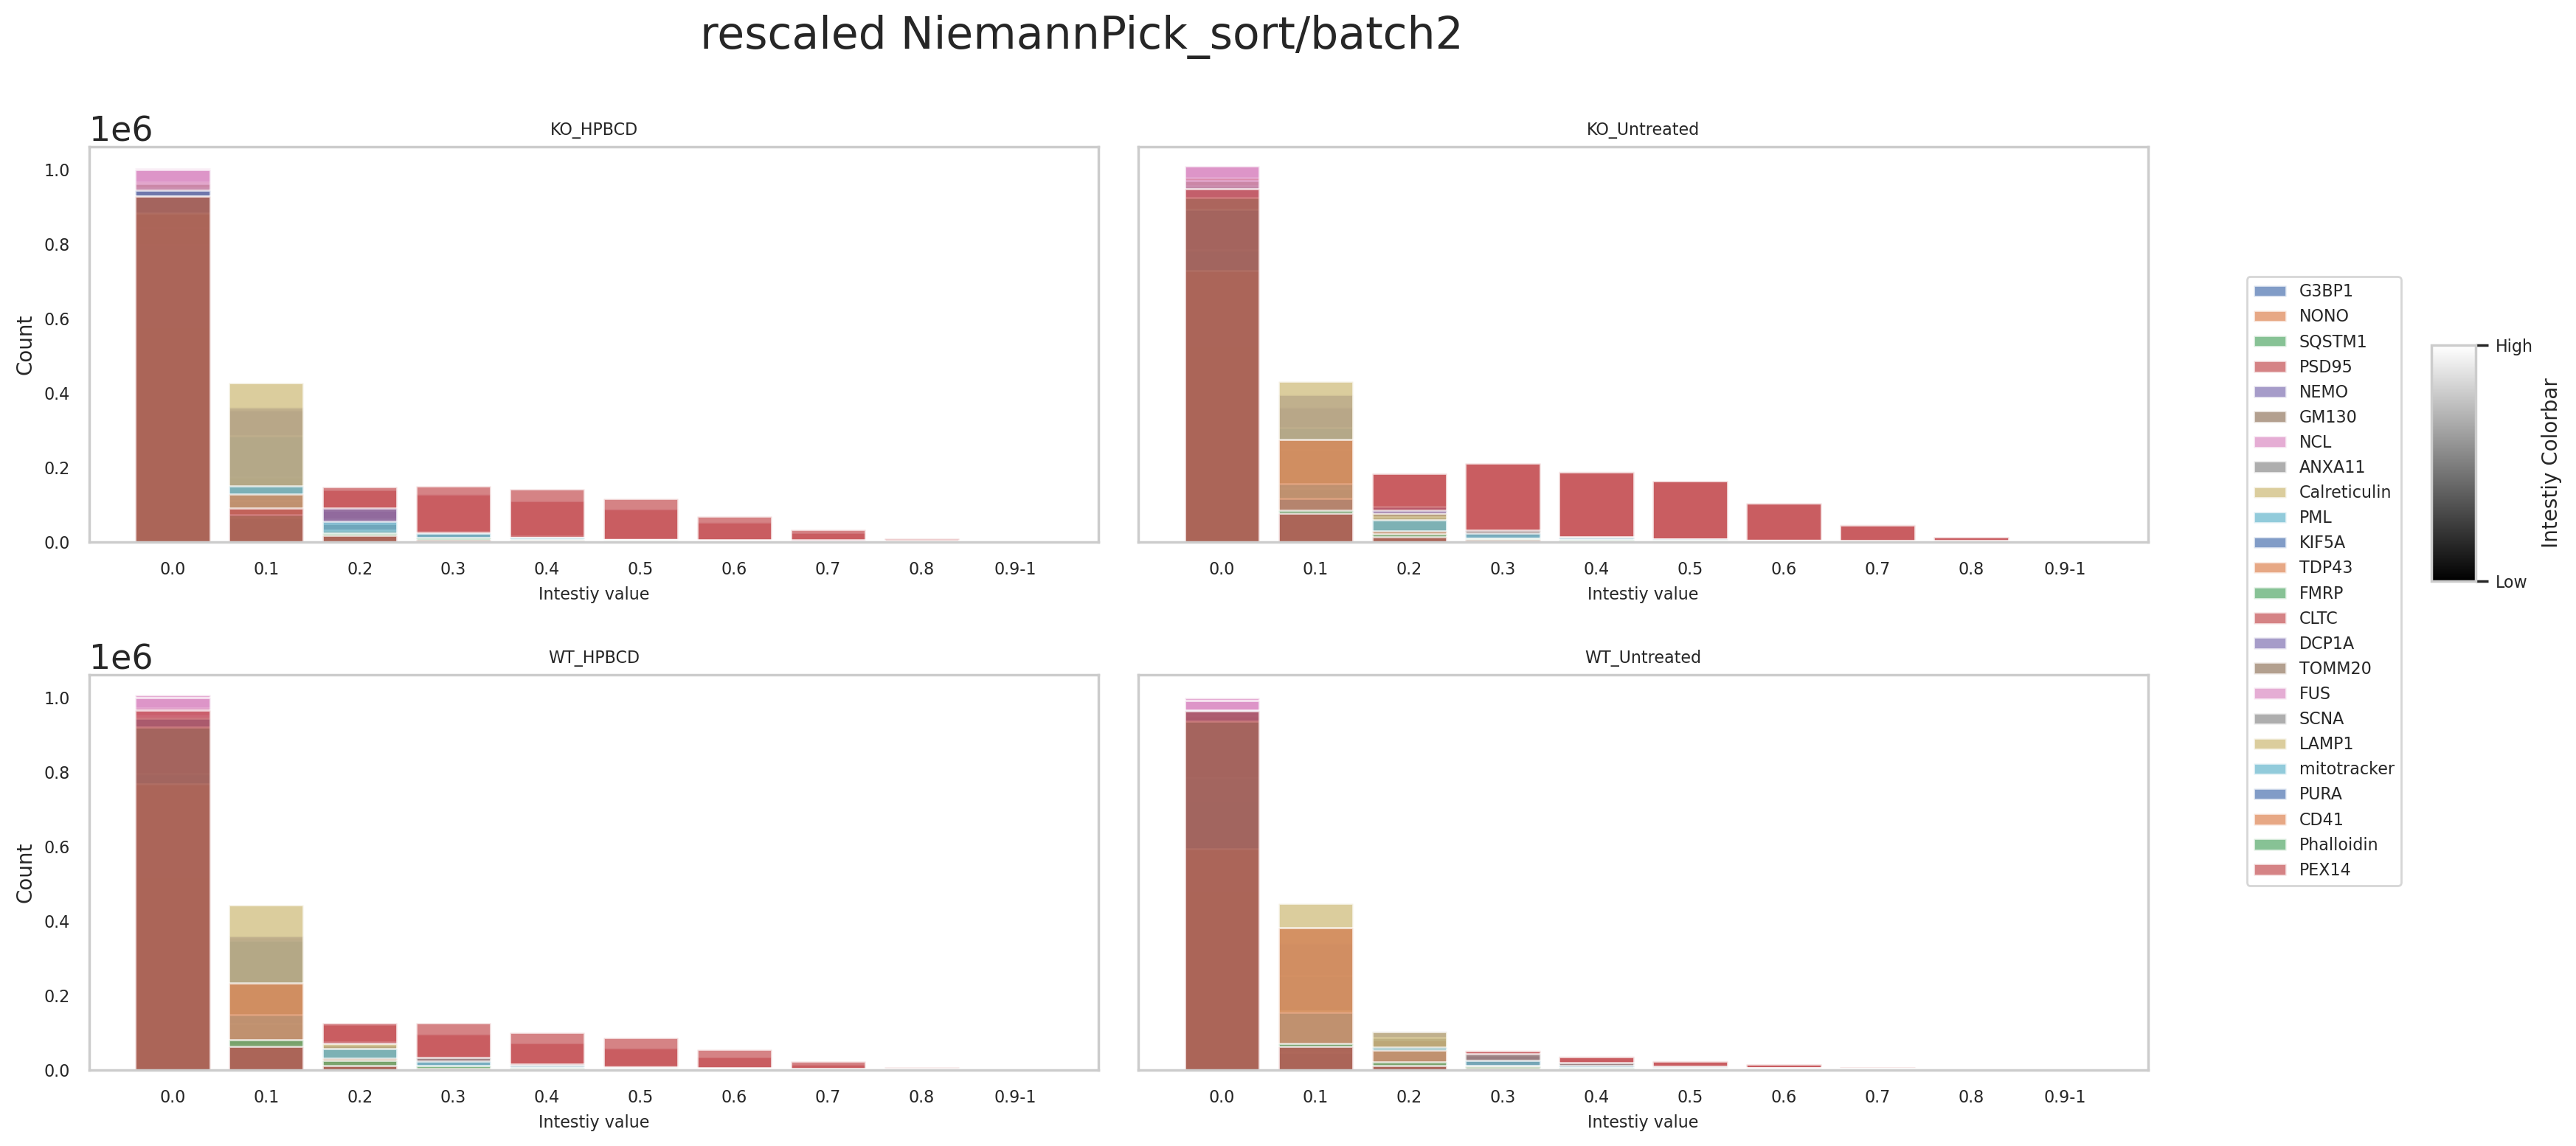

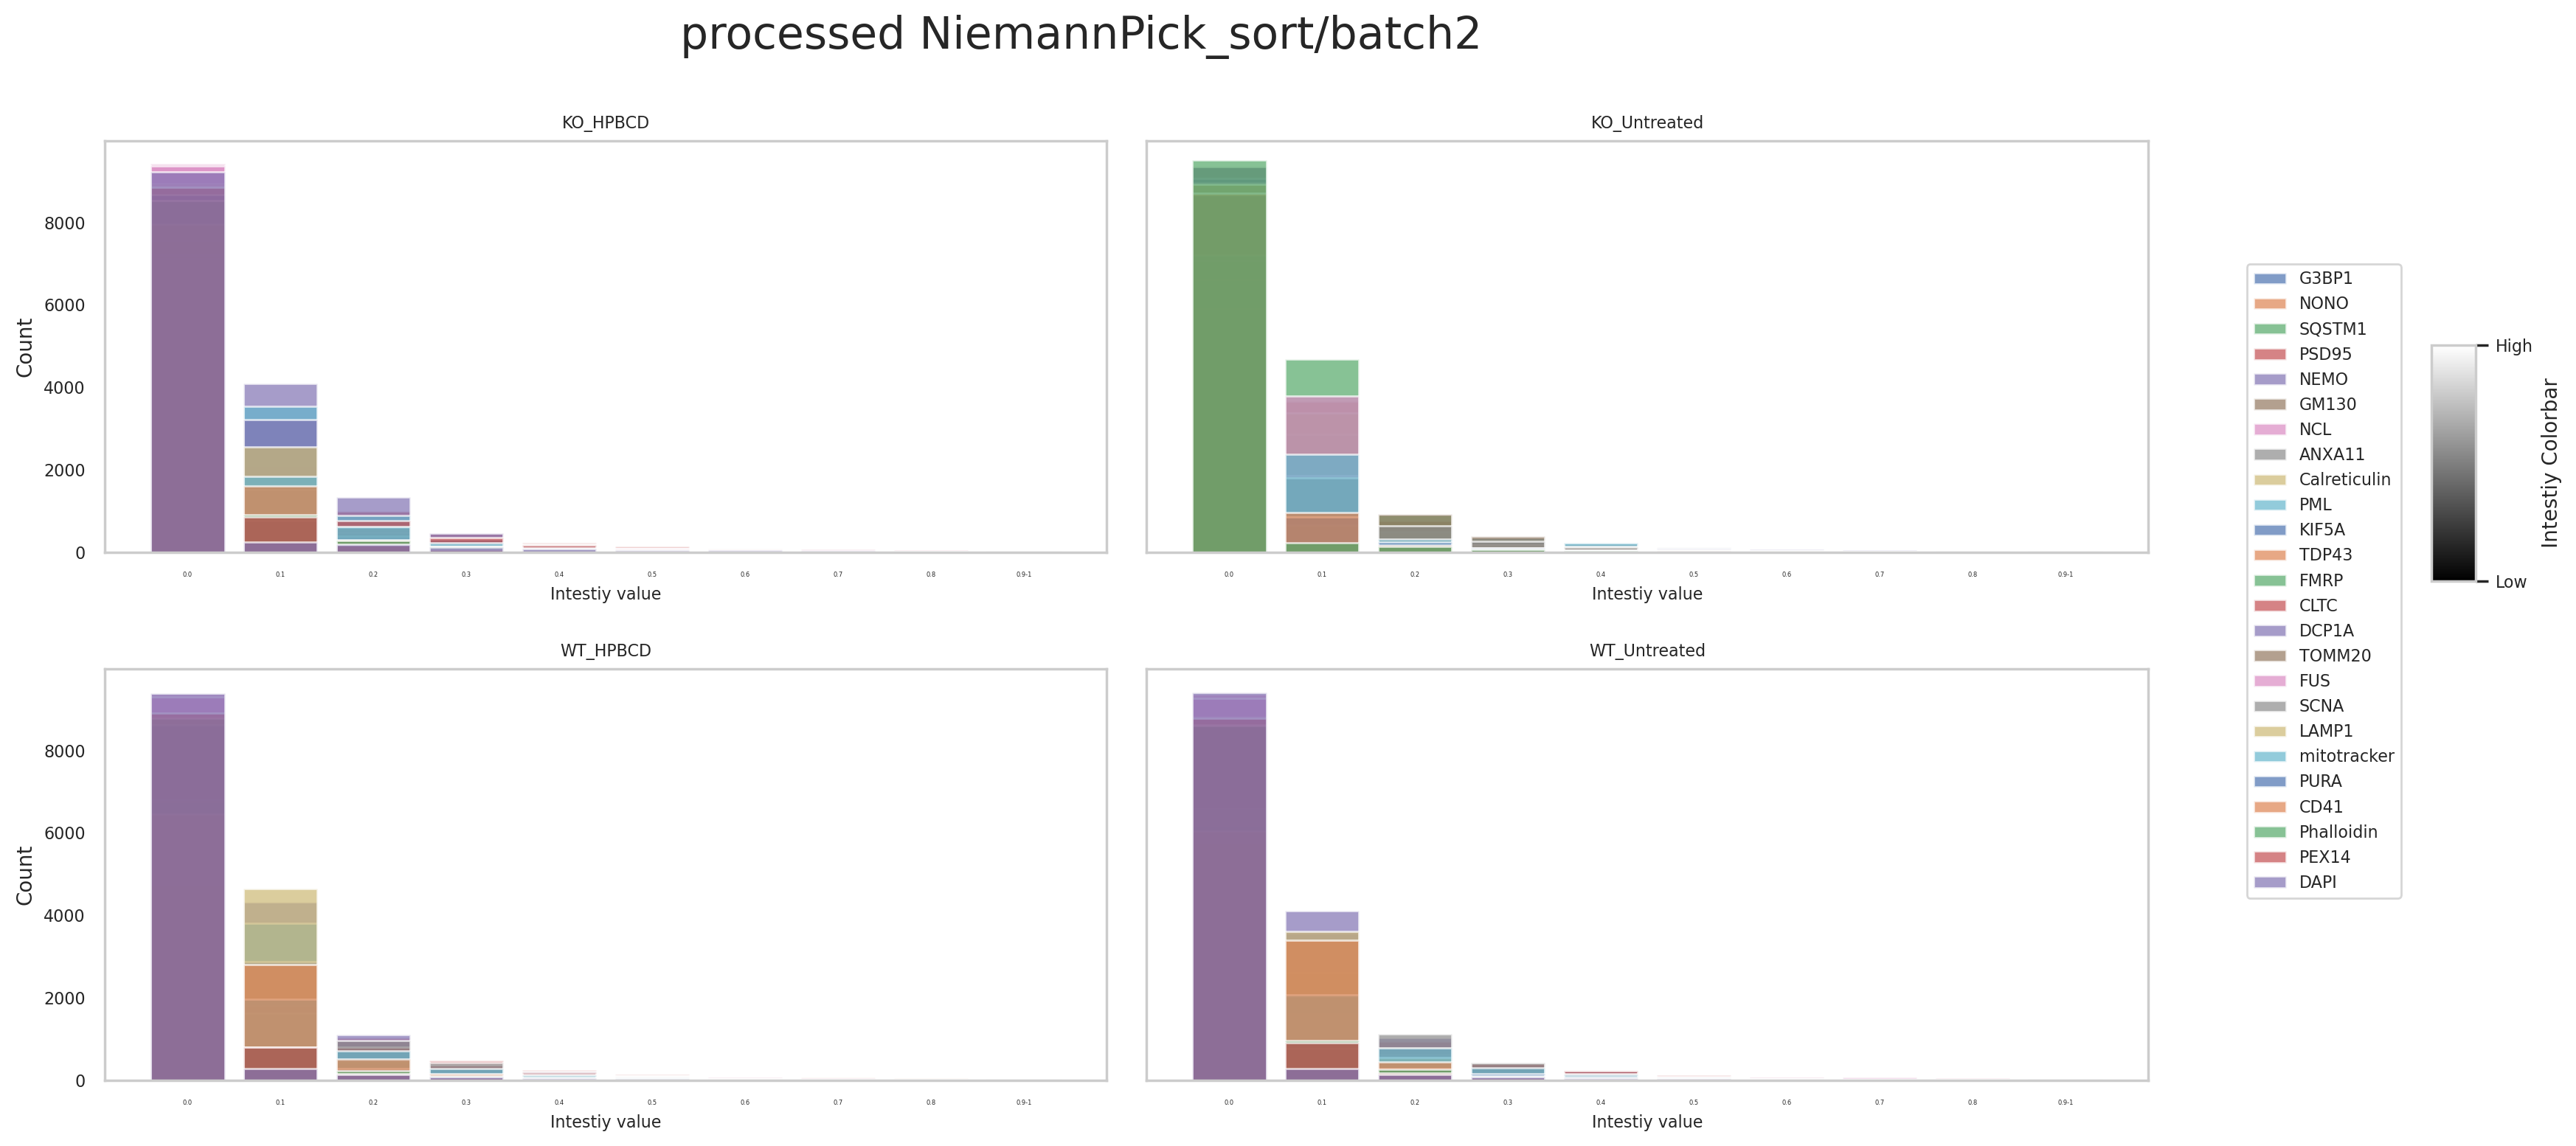

batch3


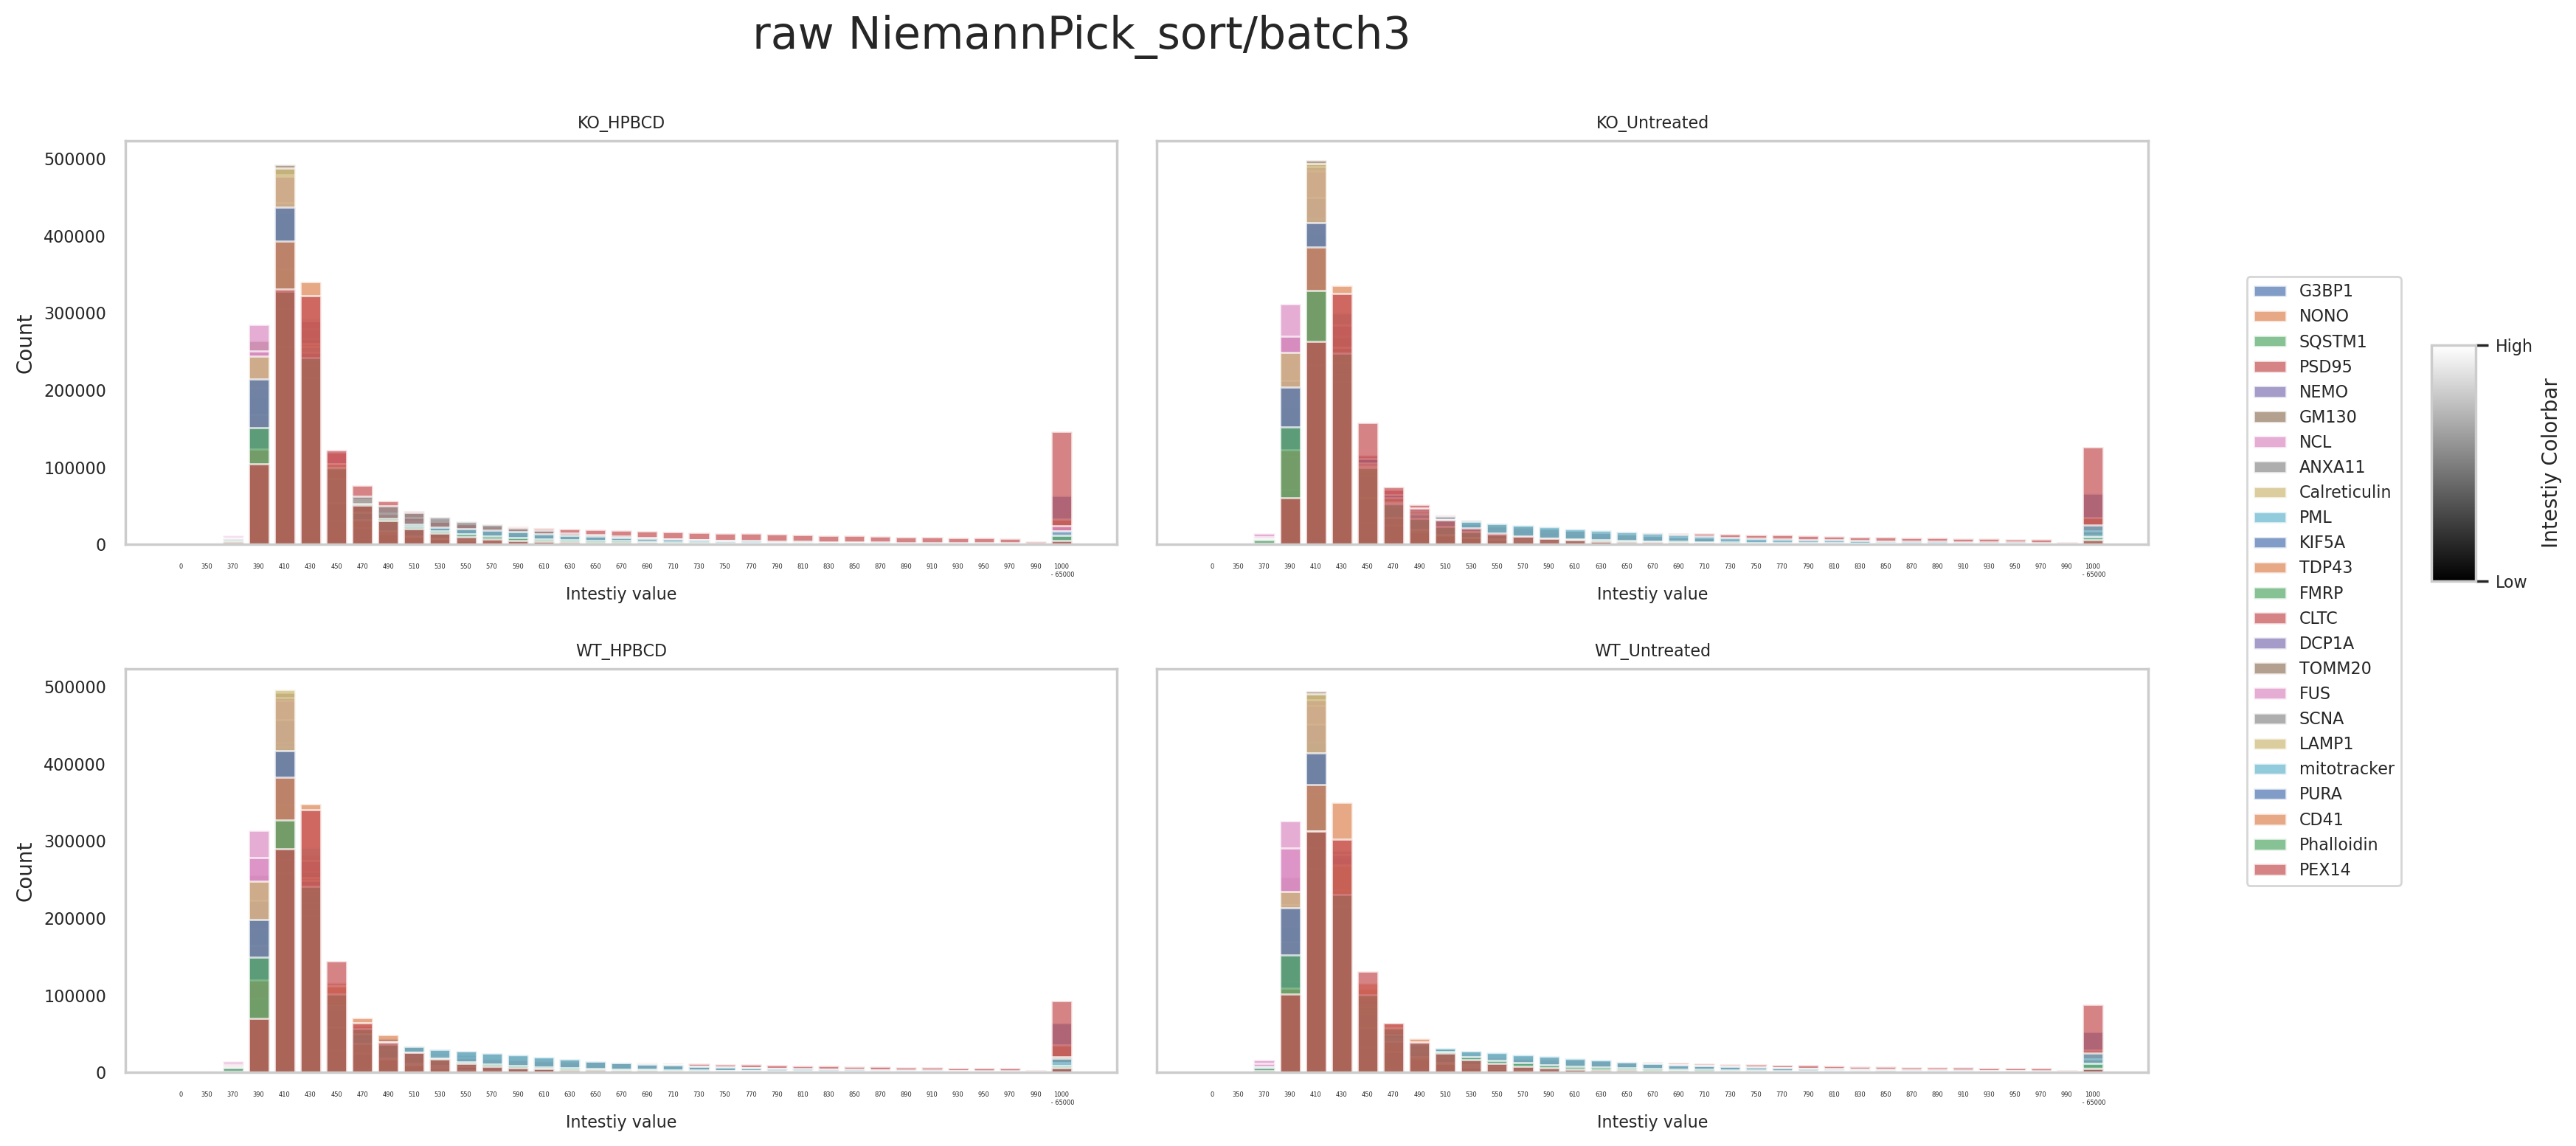

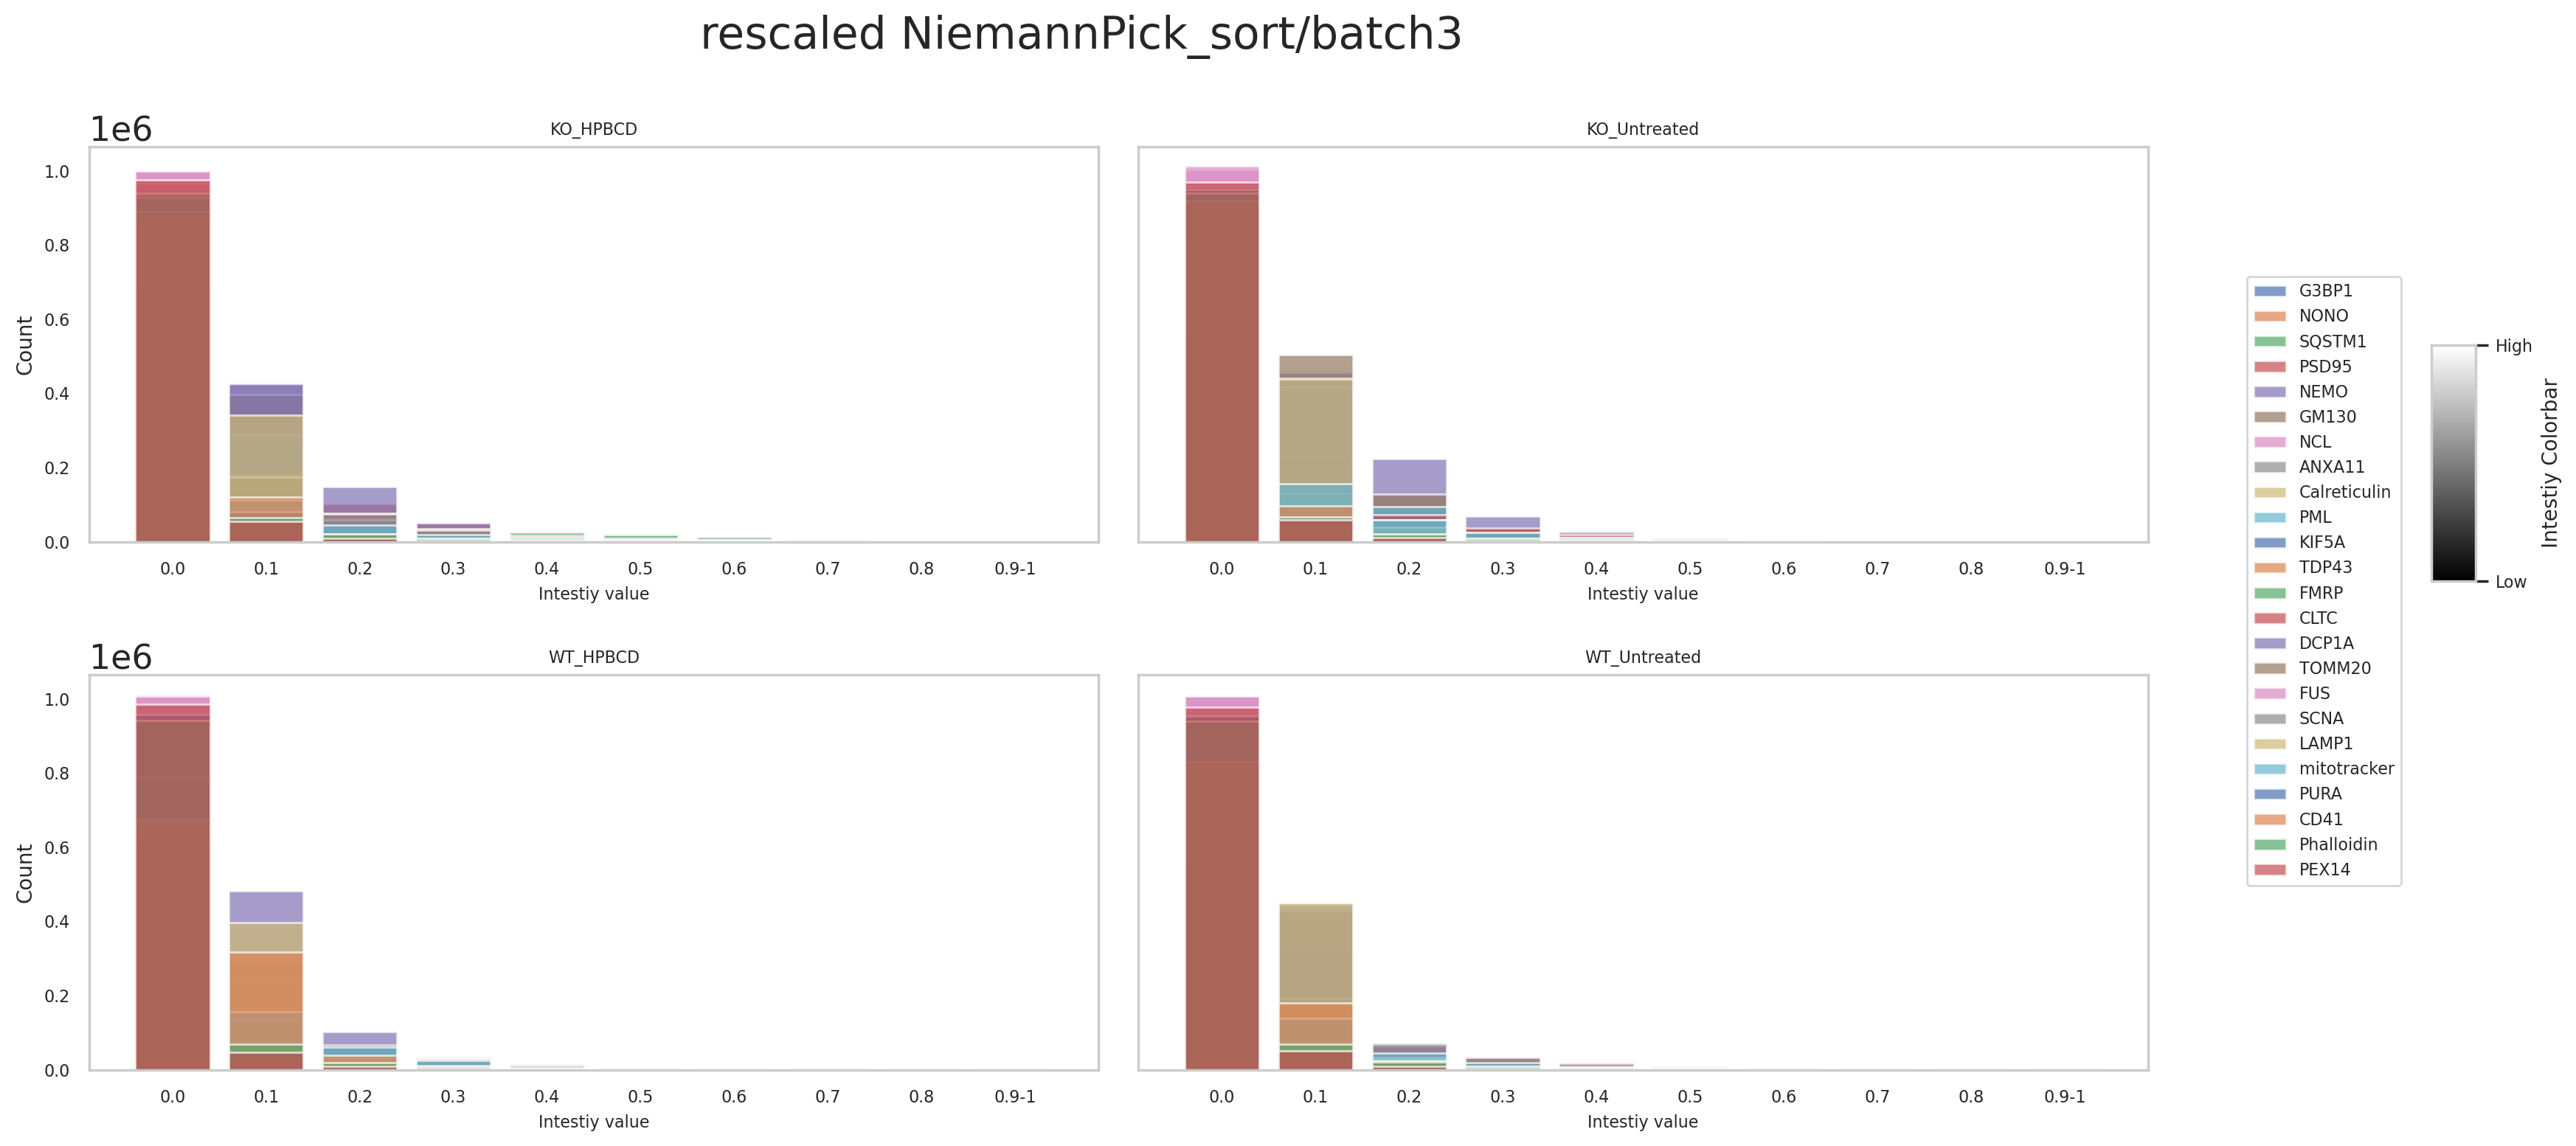

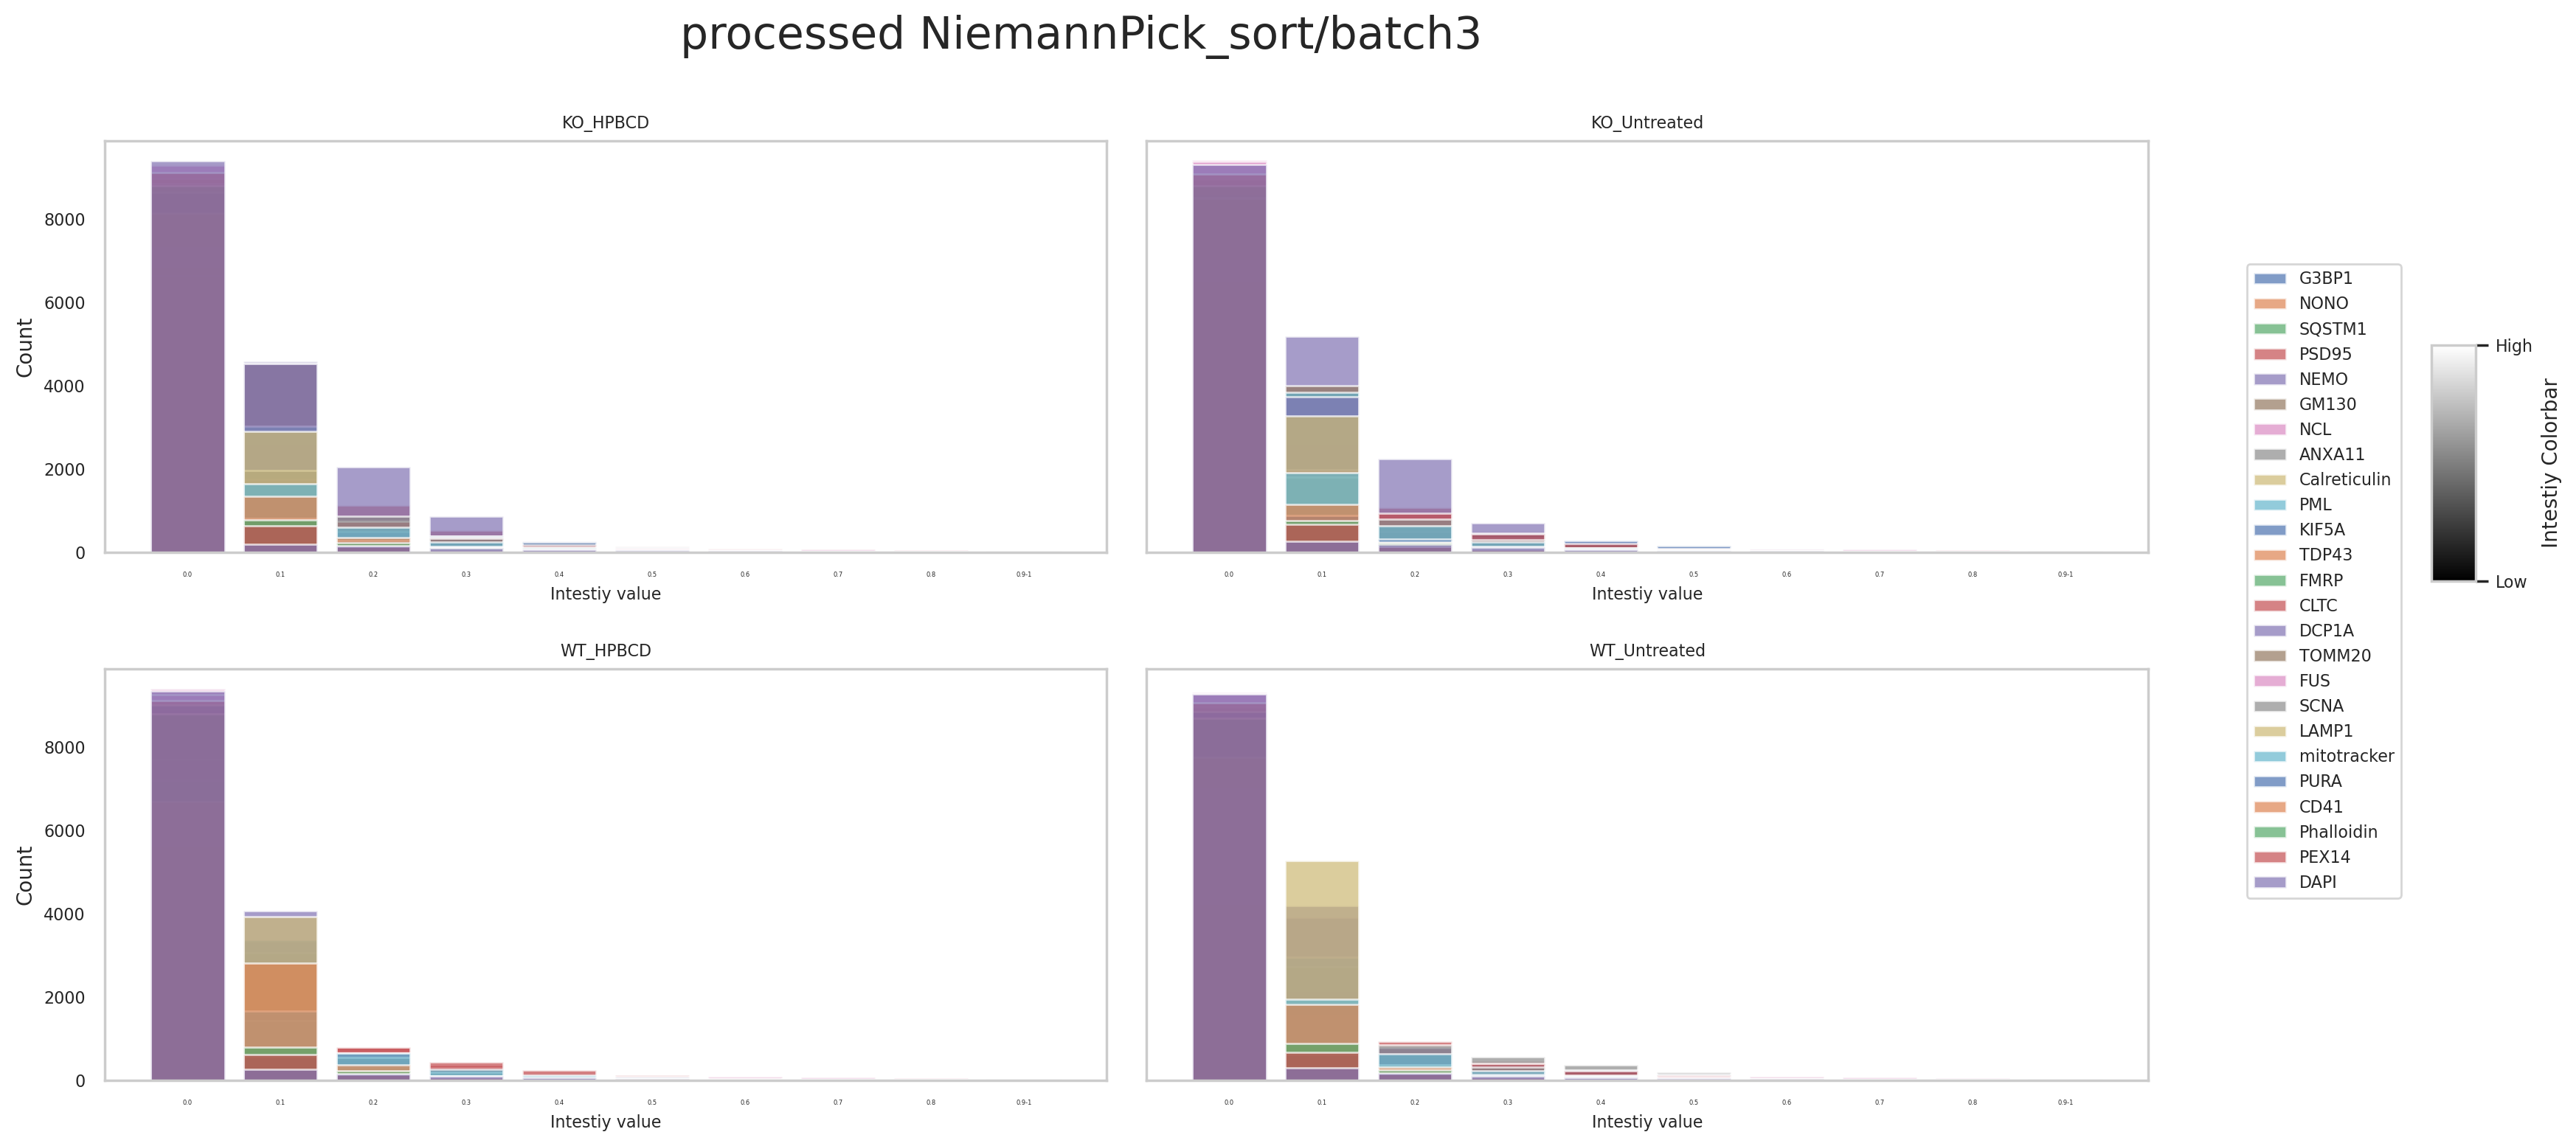

batch4


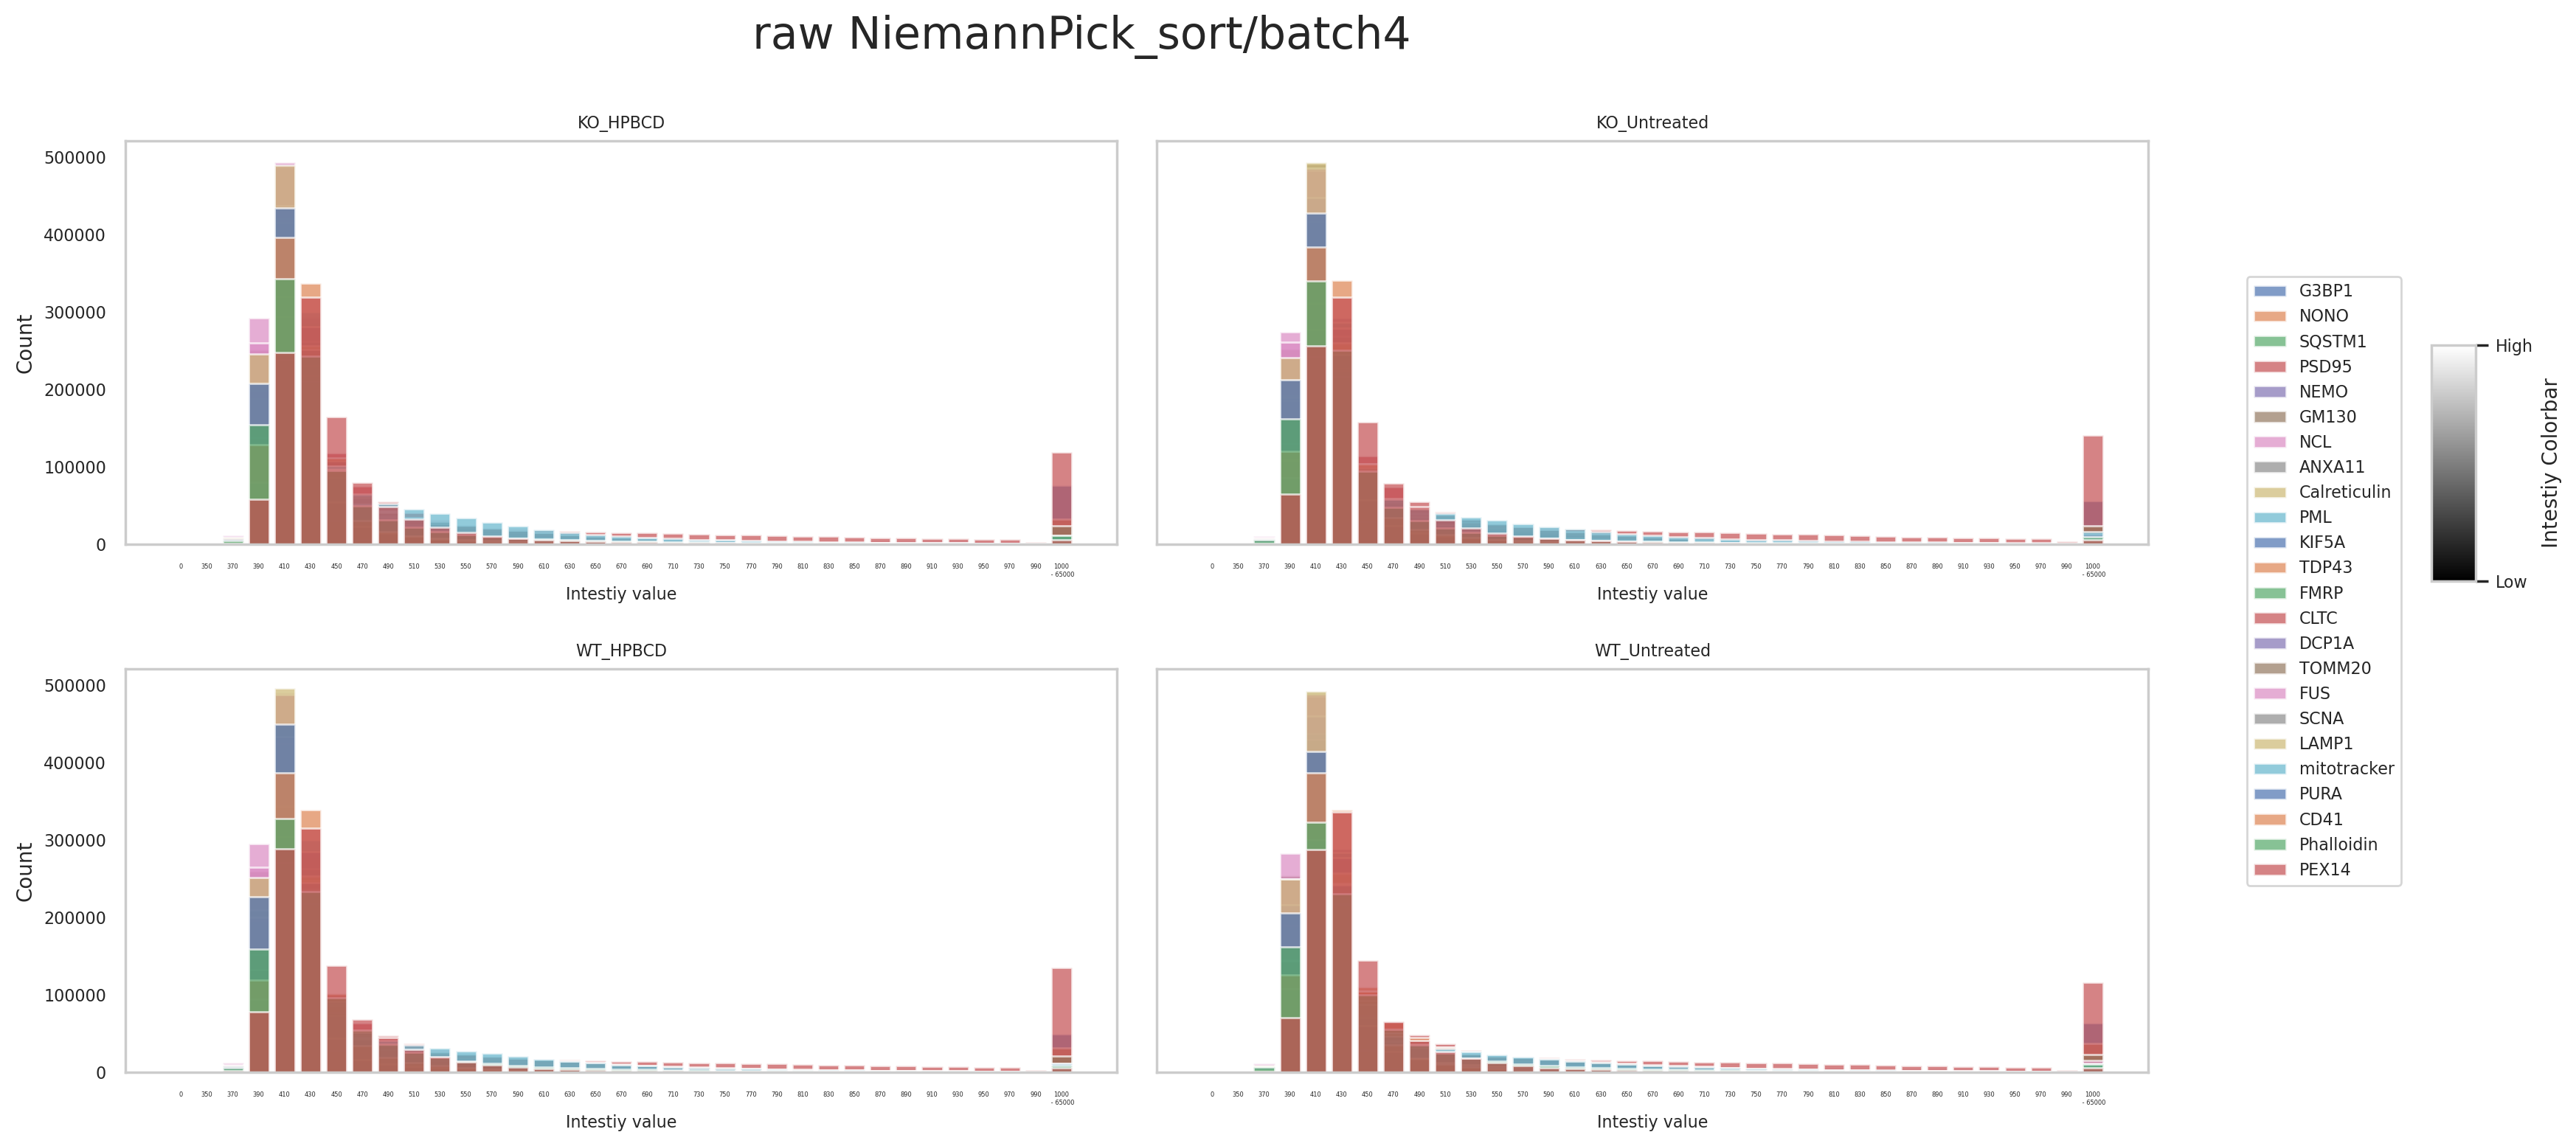

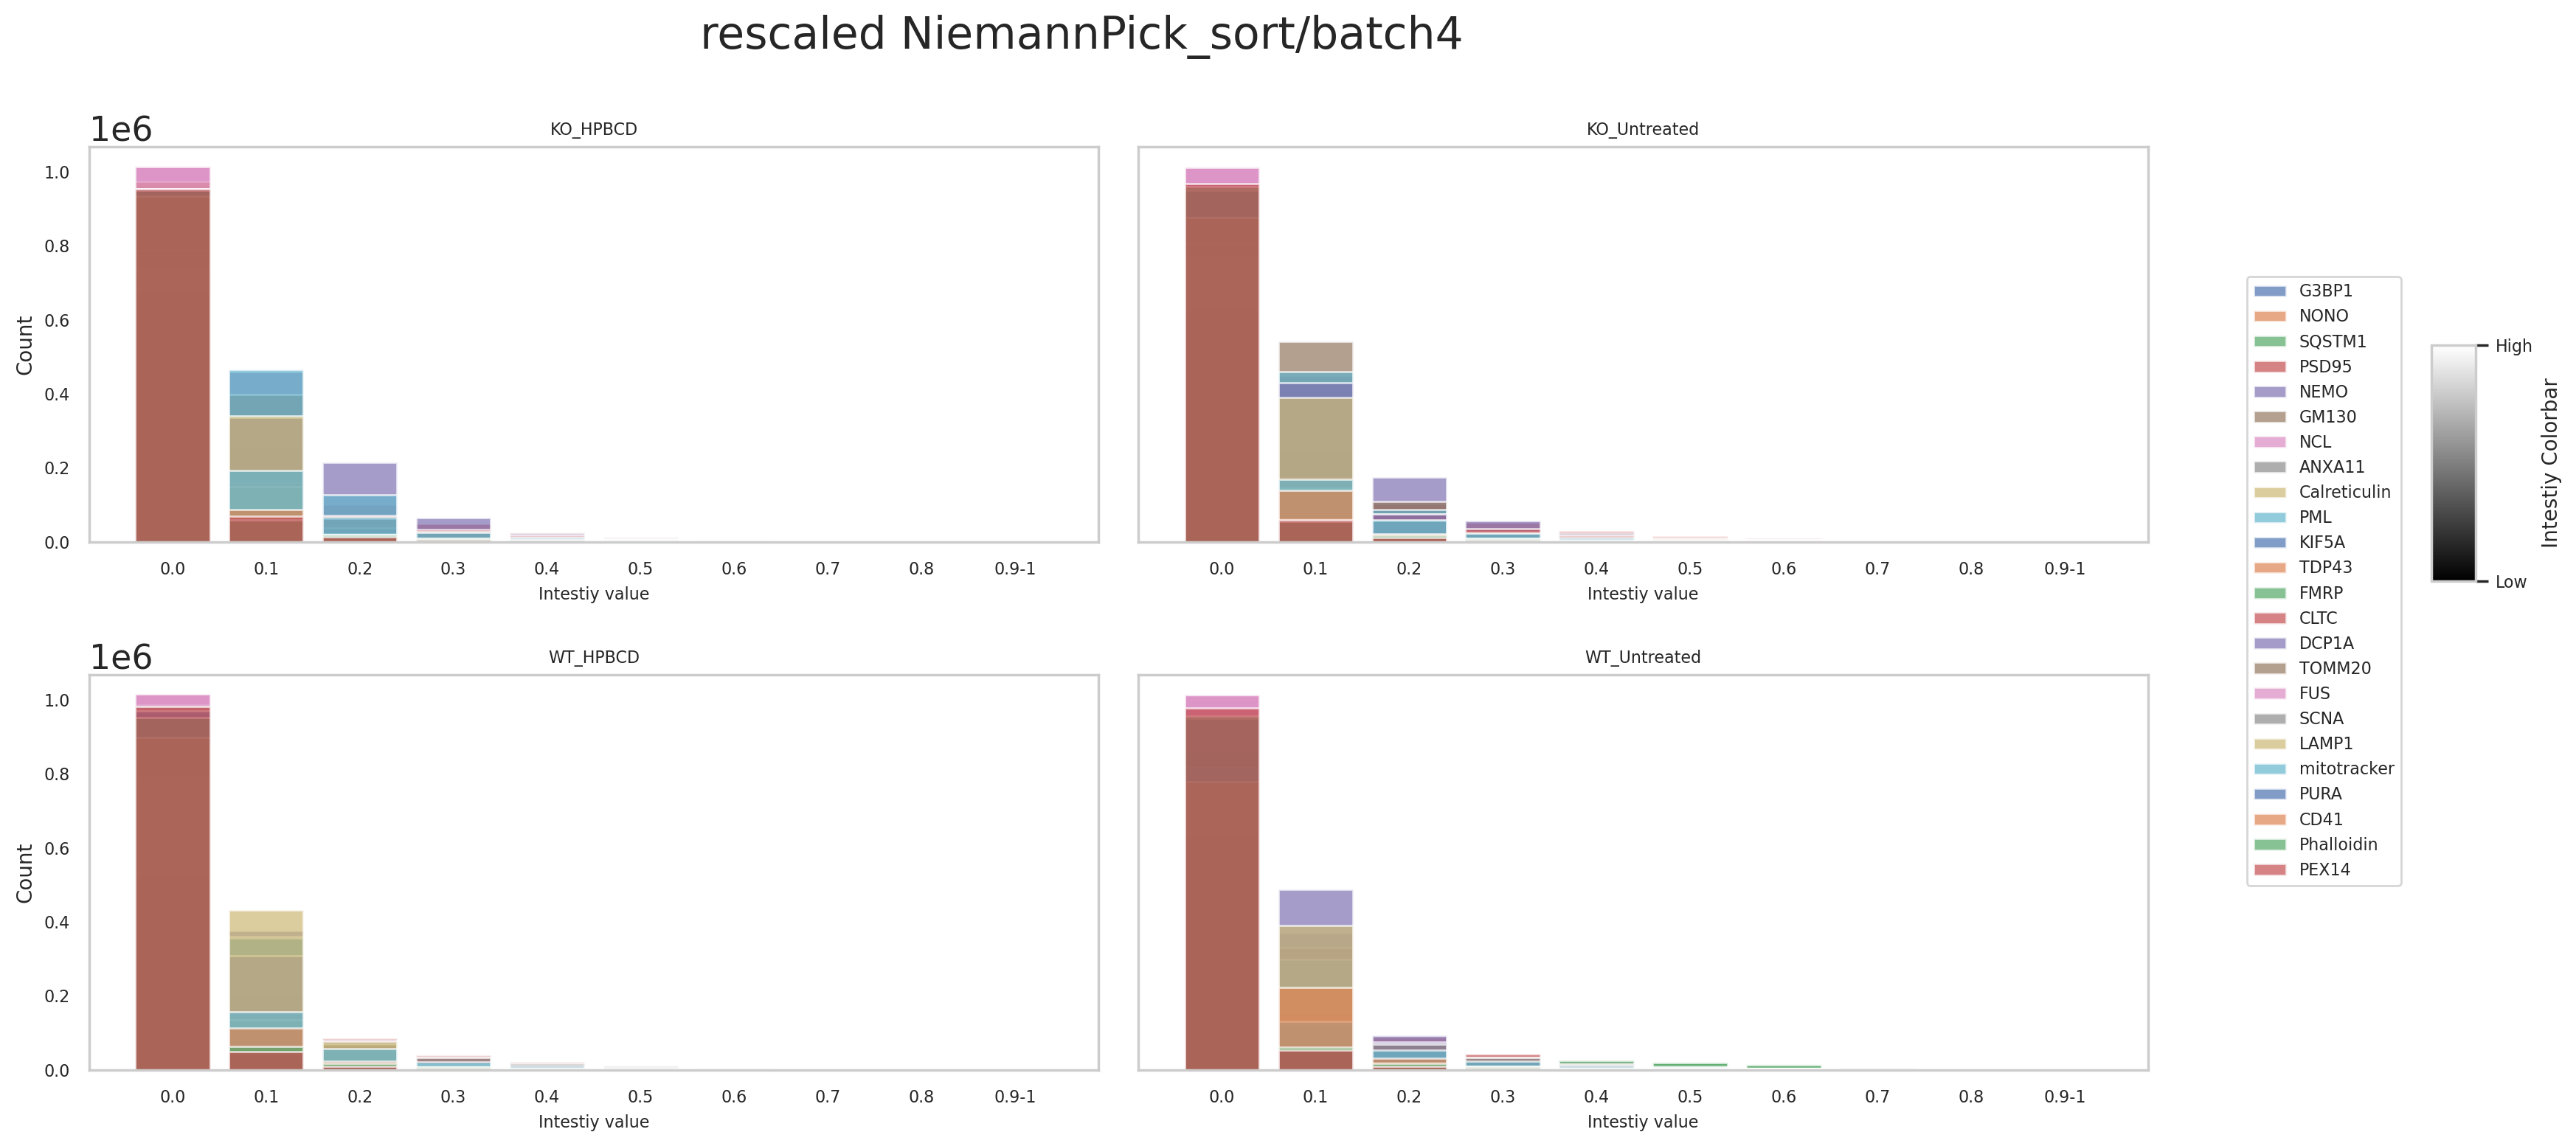

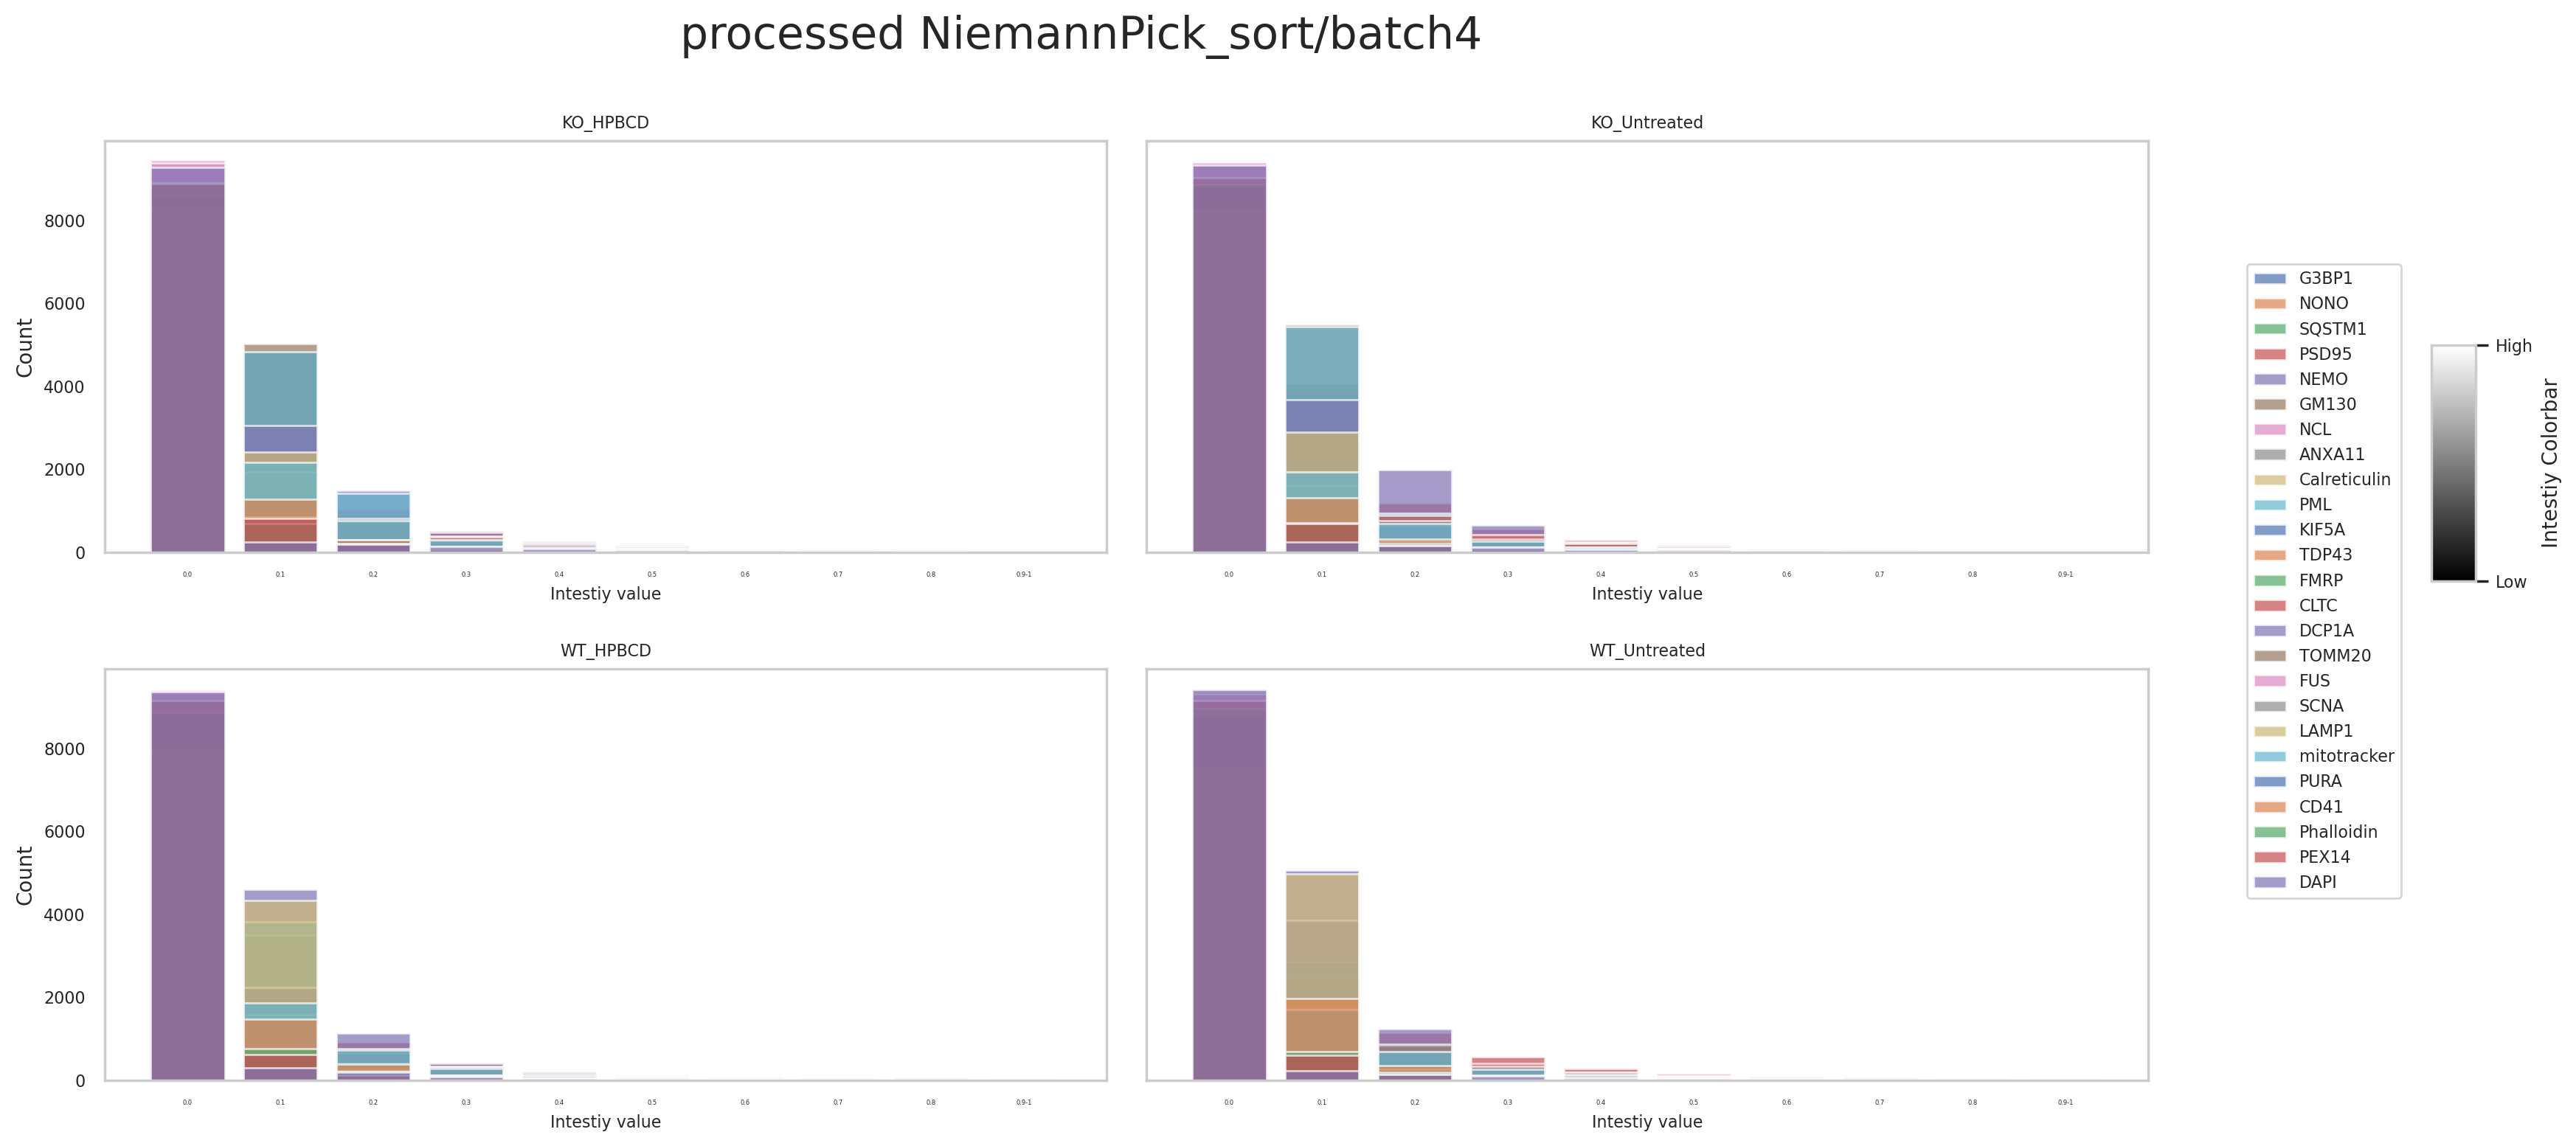

In [4]:
for batch in batches:
    print(batch)
    run_calc_hist_new(f'NiemannPick_sort/{batch}',np_cell_lines_for_disp,
                      np_markers,hist_sample=10,ncols=2, nrows=2,
                               cond_count=2, rep_count=len(reps),
                             sample_size_per_markers=200)
    print("="*30)

In [5]:
# save notebook as HTML ( the HTML will be saved in the same folder the original script is)
from IPython.display import display, Javascript
display(Javascript('IPython.notebook.save_checkpoint();'))
os.system('jupyter nbconvert --to html src/preprocessing/notebooks/cell_count_stats_analysis_NP.ipynb')

<IPython.core.display.Javascript object>

[NbConvertApp] Converting notebook src/preprocessing/notebooks/cell_count_stats_analysis_NP.ipynb to html
[NbConvertApp] Writing 5165449 bytes to src/preprocessing/notebooks/cell_count_stats_analysis_NP.html


0